<div style="text-align: center; font-family: 'Times New Roman', Times, serif;">
    <!-- Logo de la Universidad de Antioquia -->
    <div style="text-align: center;">
        <img alt="udeA logo" height="30px" src="https://d17nlwiklbtu7t.cloudfront.net/01738/image/square_1604527640-4-0002-6350-1595973252-4-0013-5466-universidad-de-antioquia-logo-E8A7DA6CA1-seeklogo.com.png">
    </div>
    
<!-- Título principal -->
<h1 style="color: #0B5345;">Sistema predictor de Grupos Relacionados por el Diagnóstico - Modelo Baseline</h1>
<h2 style="color: #0B5345;">Tercera práctica de Informática Médica</h2>

<!-- Docentes -->
<h3 style="color: #0B5345;">Docente</h3>
<ul style="list-style-type: none; padding: 0;">
    <li style="color: #0B5345;">Angelower Santana Velasquez</li>
</ul>

<!-- Participantes -->
<h3 style="color: #0B5345;">Participantes</h3>
<ul style="list-style-type: none; padding: 0;">
    <li style="color: #0B5345;">Dairon Alberto Montes Barrada, Yuliana Selena Alzate Palacio</li>
</ul>

<h3 style="color: #0B5345;">Bioingeniería, Facultad de ingeniería, Universidad de Antioquia - Sede Medellín</h3>
<h4 style="color: #0B5345;">dairon.montes@udea.edu.co – yuliana.alzate1@udea.edu.co</h4>
<h4 style="color: #0B5345;">Julio 20, 2025</h4>

</div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 14pt;">Objetivo del análisis:</p>
    <p style="font-size: 12pt;">Realizar un análisis exploratorio de los datos disponibles del paciente en la base de datos, para comprender su distribución, calidad y valor predictivo en la clasificación del Grupo Relacionado por el Diagnóstico (GRD).</p>
</div>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


# Opcion para ver todas las columnas
pd.set_option('display.max_columns', None)

# Carga del archivo Excel
df = pd.read_excel("dataBase.xlsx")

# Mostrar las primeras filas
df.head()

Num caso  Aseguradora -Código- Aseguradora -Descripción-  Edad Grupo Edad  \
0  412275.0                   122            Aseguradora_53    97       > 90   
1  412948.0                   313            Aseguradora_56    91       > 90   
2  413931.0                   313            Aseguradora_56    76      75-79   
3  413252.0                   111            Aseguradora_37    61      60-64   
4  414213.0                   227            Aseguradora_46    98       > 90   

  Sexo  Codigo de ciudad  Fecha de ingreso Tipo de ingreso  Fecha de egreso  \
0    F              5308           7032005        URGENCIA          7032005   
1    F              5001          14042005        URGENCIA         14042005   
2    M              5001           8062005        URGENCIA          8062005   
3    M              5001          29042005        URGENCIA         29042005   
4    F              5001          25062005        URGENCIA         25062005   

   Días estancia  ServicioAlta Cuidados intensivos  \
0              0            20                  NO   
1              0           162                  NO   
2              0           162                  NO   
3              0            59                  NO   
4              0           156                  NO   

   Días de Unidad Cuidado Intensivo  Dx de ingreso Dx principal de egreso  \
0                                 0              2                   A099   
1                                 0              2                   J984   
2                                 0              2                   J440   
3                                 0              2                   J188   
4                                 0              2                   I269   

  Dx principal de egreso .1  \
0                       A09   
1                       J98   
2                       J44   
3                       J18   
4                       I26   

                                Dx Ppal 3 Caracteres Dxr 1 Dxr 2 Dxr 3 Dxr 4  \
0  DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...  I120   E86  E038   F03   
1                     OTROS TRASTORNOS RESPIRATORIOS  J961  J440   I10  E872   
2  OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...   J81  J960   J80  D728   
3                 NEUMONIA ORGANISMO NO ESPECIFICADO  C349  J440   E46  Z720   
4                                   EMBOLIA PULMONAR   I10  G308  I678   R32   

  Dxr 5 Dxr 6 Dxr 7 Dxr 8 Dxr 9 Dxr 10 Código causa externa Causa externa  \
0  I442  R571  Z950   NaN   NaN    NaN                  NaN           NaN   
1   F03  Z720   NaN   NaN   NaN    NaN                  NaN           NaN   
2  R060  Z720   NaN   NaN   NaN    NaN                  NaN           NaN   
3   NaN   NaN   NaN   NaN   NaN    NaN                  NaN           NaN   
4   NaN   NaN   NaN   NaN   NaN    NaN                  NaN           NaN   

  Situacion al alta  Proc1  Proc2  Proc3  Proc4  Proc5  Proc6  Proc7  Proc8  \
0         FALLECIDO  38.93  88.01    NaN    NaN    NaN    NaN    NaN    NaN   
1         FALLECIDO  87.44  89.51    NaN    NaN    NaN    NaN    NaN    NaN   
2         FALLECIDO  87.44  89.51    NaN    NaN    NaN    NaN    NaN    NaN   
3         FALLECIDO  87.44    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4         FALLECIDO  89.51    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   Proc9  Proc10  Proc11  Proc12  Proc13  Proc14  Proc15  Proc16  Proc17  \
0    NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2    NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3    NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4    NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   Proc18  Proc19  Proc20  Proc21  Proc22  Proc23  Proc24  Proc25  Proc26  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN     NaN     NaN     NaN     NaN 

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <h4 style="font-size: 12pt;"><strong>Variable Num caso: </strong></h4>
    <p style="font-size: 12pt;">La variable 'Num caso' corresponde a un número único asignado al paciente al momento de ingreso y actúa como un identificador. Aunque se observan 7900 casos únicos en un total de 27869 filas, esto indica una alta tasa de duplicación, con 19968 registros repetidos. Además, se encuentra un valor nulo, lo que señala una leve inconsistencia. Dado que su naturaleza es meramente identificadora y no está relacionada con ninguna característica clínica o administrativa relevante para el diagnóstico, esta variable no aporta valor predictivo al modelo. Se excluirá del análisis posterior y no será considerada como parte del conjunto de variables para entrenamiento.</p>
    </div>

In [3]:
# Ver cuántos casos únicos hay vs. cuántas filas
print(f"Total de filas: {len(df)}")
print(f"Casos únicos: {df['Num caso'].nunique()}")

# Verificar si hay duplicados
print(f"Duplicados: {df['Num caso'].duplicated().sum()}")

# Verificar casos nulos
print(f"Valores nulos: {df['Num caso'].isnull().sum()}")

Total de filas: 27869
Casos únicos: 7900
Duplicados: 19968
Valores nulos: 1


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <h4 style="font-size: 12pt;"><strong>Variable Aseguradora - Código y descripción: </strong></h4>
    <p style="font-size: 12pt;">La variable "Aseguradora -Código-" representa una codificación numérica de la entidad aseguradora y "Aseguradora -Descripción-" su nombre correspondiente. Ambas variables no presentan valores nulos, pero se observa una discrepancia en la cardinalidad: hay más descripciones únicas que códigos, lo cual indica una posible inconsistencia en la forma de registrar los nombres de aseguradoras, como variaciones ortográficas o duplicaciones semánticas. Aunque hay una diversidad moderada de códigos (62 únicos) y un número mayor de descripciones (71), el análisis gráfico entre GRD y aseguradora muestra una relación muy débil. Incluso para las aseguradoras más frecuentes, no se observa un patrón claro que indique una asociación útil para la predicción. Además, cualquier correlación observada puede estar más relacionada con la población atendida por la aseguradora que con causas clínicas subyacentes. Por estos motivos, y considerando además el riesgo de introducir ruido debido a inconsistencias en los nombres, esta variable se descartará del modelo predictivo.</p>
    </div>

Códigos únicos: 62
Descripciones únicas: 71
Nulos en código: 0
Nulos en descripción: 0


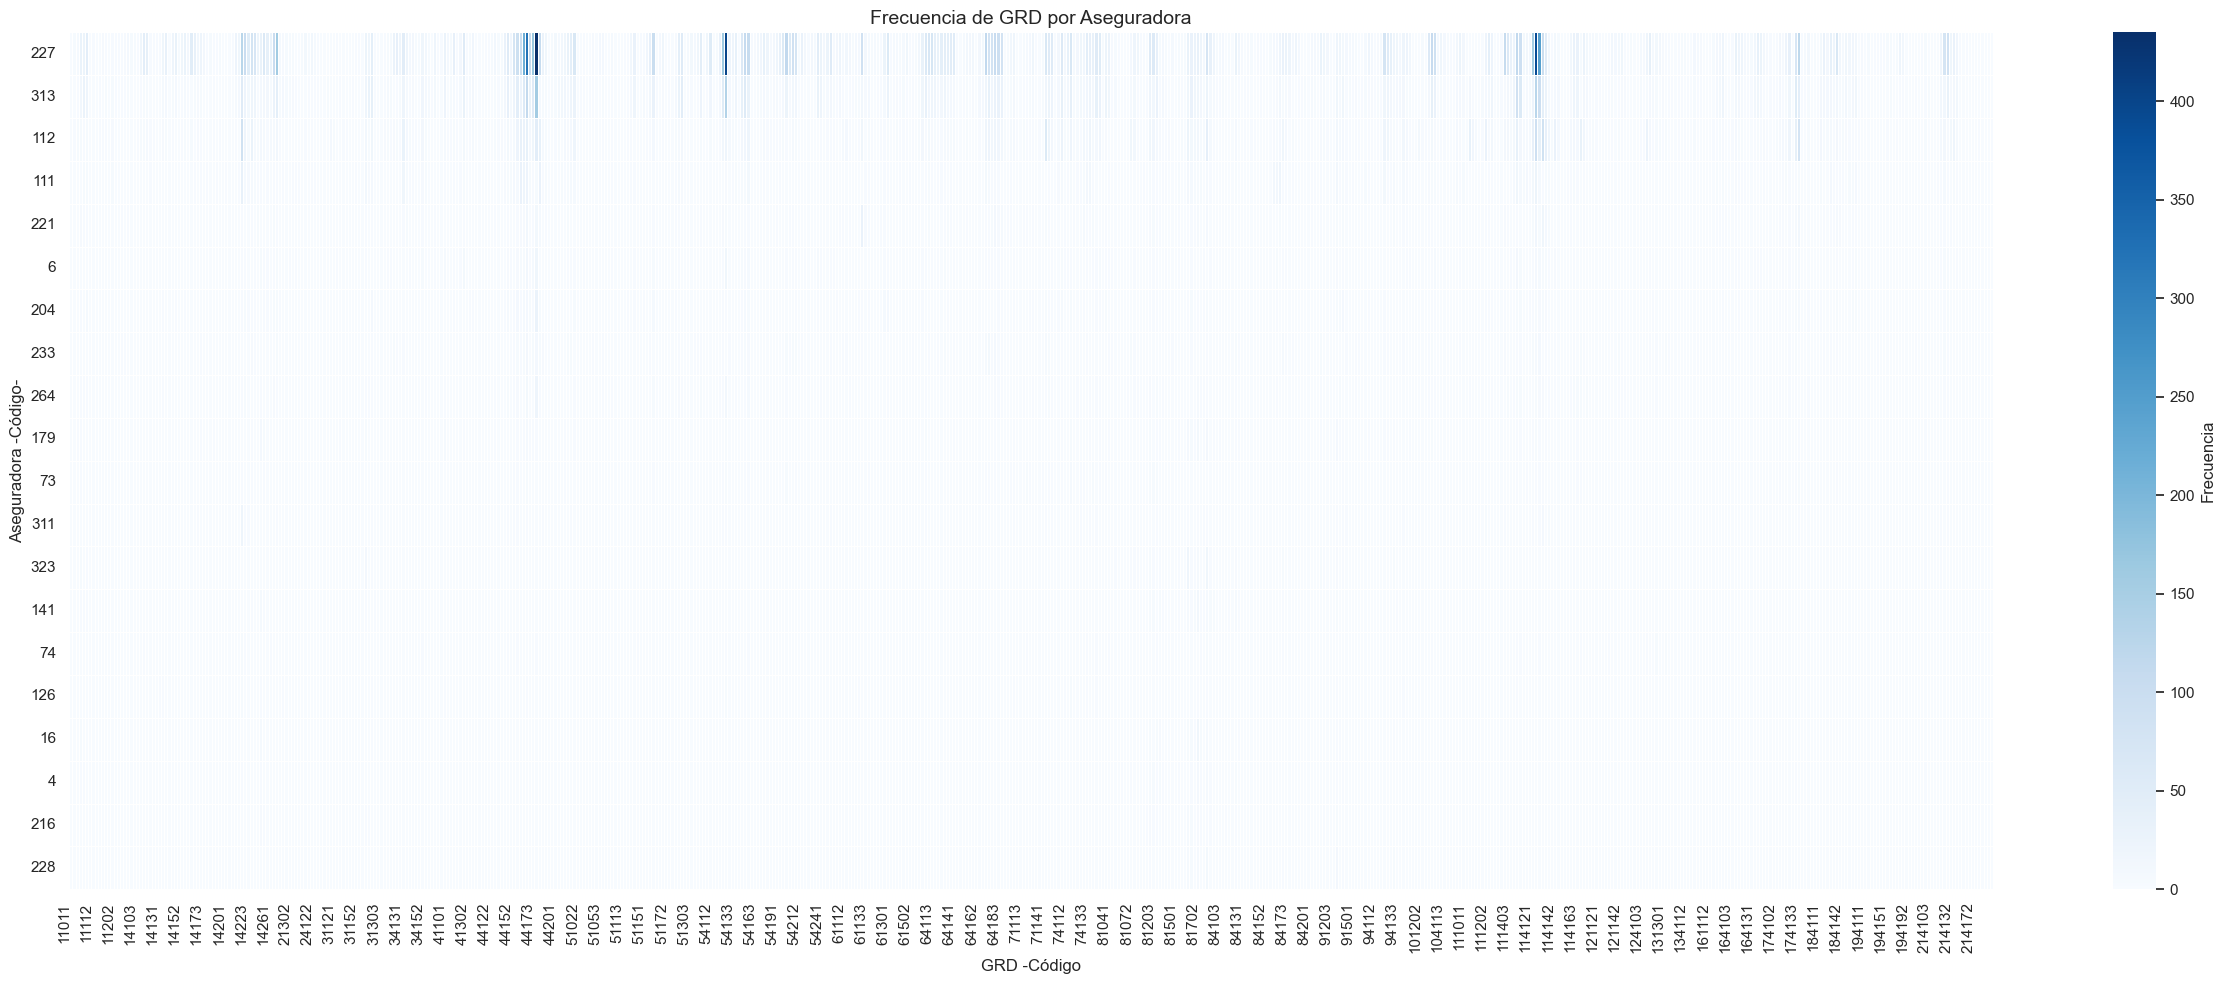

In [4]:
# Ver cuántos códigos y descripciones únicos hay
print(f"Códigos únicos: {df['Aseguradora -Código-'].nunique()}")
print(f"Descripciones únicas: {df['Aseguradora -Descripción-'].nunique()}")

# Verificar si hay valores nulos
print(f"Nulos en código: {df['Aseguradora -Código-'].isnull().sum()}")
print(f"Nulos en descripción: {df['Aseguradora -Descripción-'].isnull().sum()}")

# Crear tabla cruzada para explorar relación entre aseguradora y GRD
ase_gddr = pd.crosstab(df['Aseguradora -Código-'], df['GRD -Código'])

# Filtrar solo las 20 aseguradoras con más registros
top_aseguradoras = df['Aseguradora -Código-'].value_counts().head(20).index
ase_gddr = ase_gddr.loc[top_aseguradoras]

# Graficar heatmap para ver distribución
plt.figure(figsize=(25, 10))
sns.heatmap(ase_gddr, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Frecuencia de GRD por Aseguradora", fontsize=14)
plt.xlabel("GRD -Código")
plt.ylabel("Aseguradora -Código-")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <h4 style="font-size: 12pt;"><strong>Variable Edad y Grupo de Edad: </strong></h4>
    <p style="font-size: 12pt;">La variable "Edad" es continua y numérica, sin valores nulos, con 108 valores distintos que abarcan todo el espectro etario. Su versión categorizada, "Grupo Edad", cuenta con 20 grupos definidos (quinquenales), también sin valores faltantes. Ambas variables muestran una distribución esperada, con una mayor concentración en adultos y adultos mayores. Al relacionarlas con el GRD, se observan asociaciones claras: algunos grupos de edad se vinculan con diagnósticos específicos, lo cual es coherente desde el punto de vista clínico. Los gráficos de calor y los promedios de edad por GRD refuerzan esta relación. "Grupo Edad", al ser categórica, puede facilitar la interpretación y ser más estable frente a pequeñas fluctuaciones, mientras que "Edad" permite una resolución más fina. Se considera que la variable "Grupo Edad" es más relevante para el módelo predictivo.</p>
    </div>

Valores únicos de Edad: 108
Valores únicos de Grupo Edad: 20
Valores nulos en Edad: 0
Valores nulos en Grupo Edad: 0


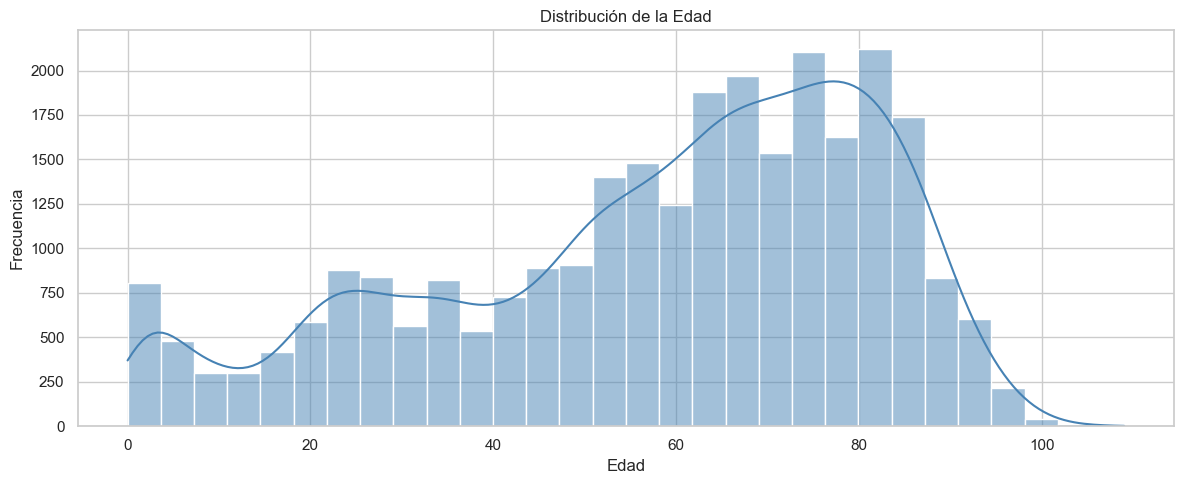


Promedio de edad por GRD:
GRD -Código
194192     4.000000
14201      8.000000
44181      8.802956
184141    11.636364
224121    12.500000
            ...    
54102     81.272727
224122    82.000000
54103     82.142857
44111     85.000000
121153    91.000000
Name: Edad, Length: 608, dtype: float64


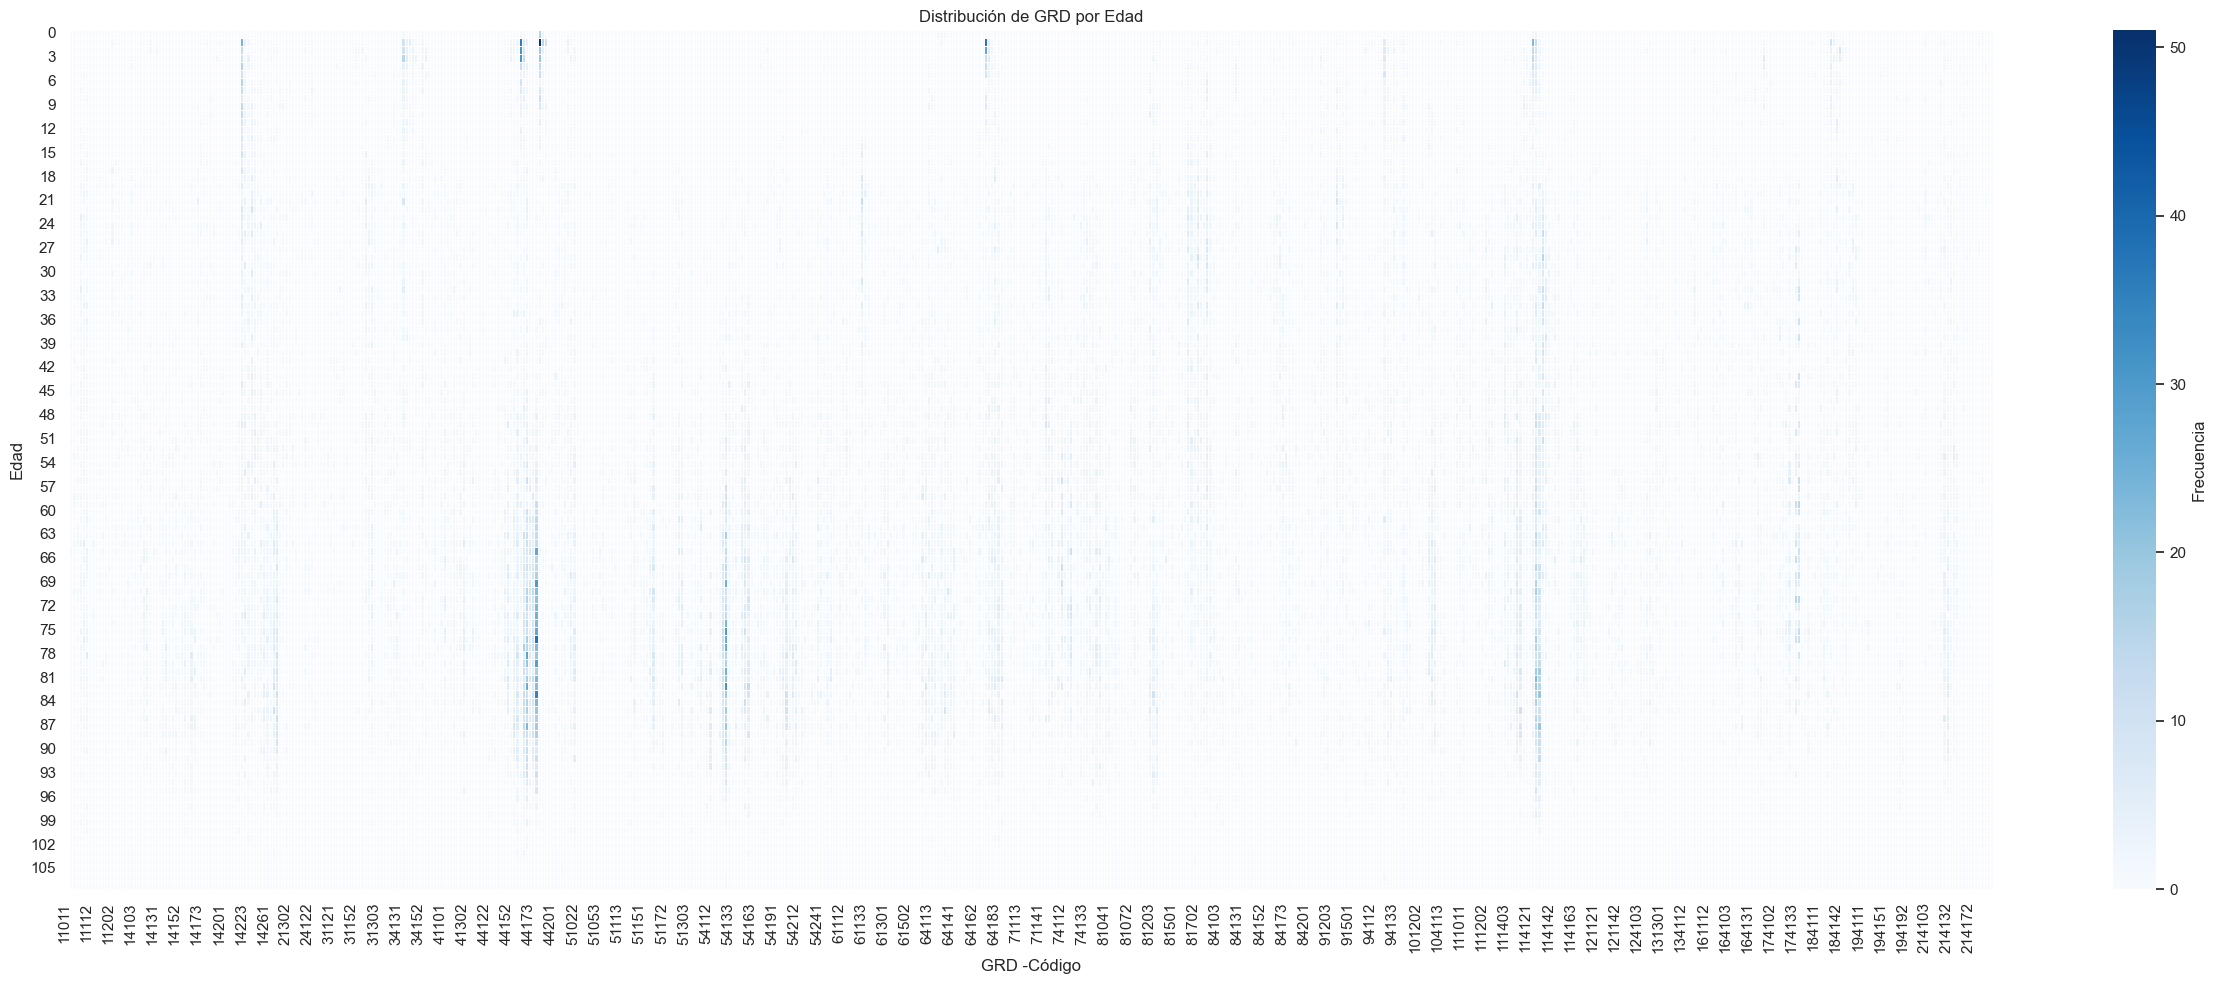

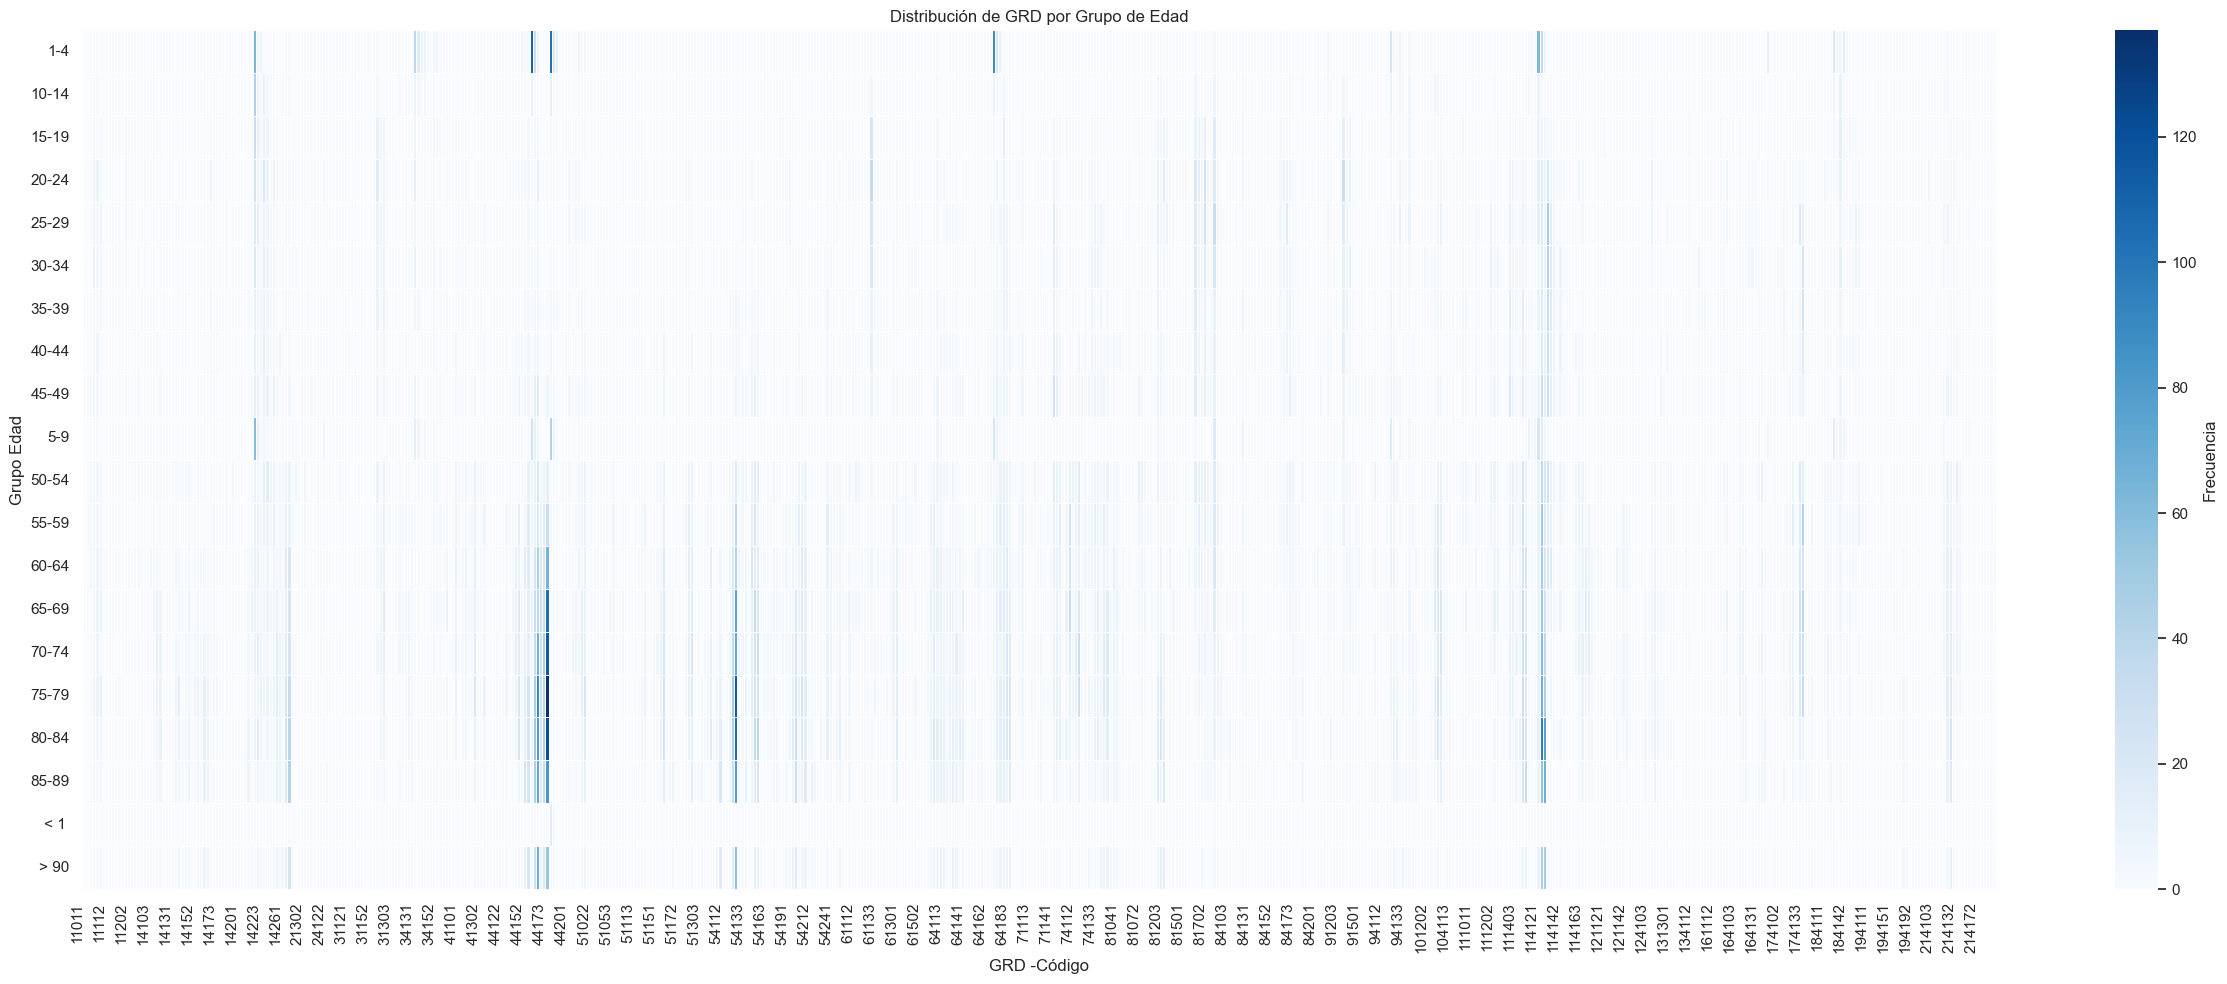


Chi² = 85402.74, p-value = 0.0000
→ Hay una asociación estadísticamente significativa entre Edad y GRD.

Chi² = 32068.19, p-value = 0.0000
→ Hay una asociación estadísticamente significativa entre Grupo Edad y GRD.


In [5]:
# Ver cuántos valores únicos hay en Edad y en Grupo Edad
print(f"Valores únicos de Edad: {df['Edad'].nunique()}")
print(f"Valores únicos de Grupo Edad: {df['Grupo Edad'].nunique()}")

# Verificar si hay valores nulos
print(f"Valores nulos en Edad: {df['Edad'].isnull().sum()}")
print(f"Valores nulos en Grupo Edad: {df['Grupo Edad'].isnull().sum()}")

# Histograma de distribución de edades
plt.figure(figsize=(12, 5))
sns.histplot(df['Edad'], bins=30, kde=True, color='steelblue')
plt.title("Distribución de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Agrupar por GRD y calcular la edad promedio
edad_promedio_grd = df.groupby('GRD -Código')['Edad'].mean().sort_values()
print(f"\nPromedio de edad por GRD:\n{edad_promedio_grd}")

# Crear tablas cruzadas para Edad y Grupo Edad vs GRD
edad_grd = pd.crosstab(df['Edad'], df['GRD -Código'])
grupo_grd = pd.crosstab(df['Grupo Edad'], df['GRD -Código'])

# Heatmap Edad vs GRD
plt.figure(figsize=(25, 10))
sns.heatmap(edad_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Edad")
plt.xlabel("GRD -Código")
plt.ylabel("Edad")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Heatmap Grupo Edad vs GRD
plt.figure(figsize=(25, 10))
sns.heatmap(grupo_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Grupo de Edad")
plt.xlabel("GRD -Código")
plt.ylabel("Grupo Edad")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Prueba de contingencia para Edad
chi2, p, dof, expected = chi2_contingency(edad_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación estadísticamente significativa entre Edad y GRD.")
else:
    print("→ No se encontró una asociación significativa.")

# Prueba de contingencia para Grupo Edad
chi2, p, dof, expected = chi2_contingency(grupo_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación estadísticamente significativa entre Grupo Edad y GRD.")
else:
    print("→ No se encontró una asociación significativa.")

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <h4 style="font-size: 12pt;"><strong>Variable Sexo: </strong></h4>
    <p style="font-size: 12pt;">La variable "Sexo" está codificada con solo dos categorías ('M' y 'F') y no presenta valores nulos. Tras estandarizar el texto, se confirma su integridad. El análisis de frecuencias muestra una distribución relativamente balanceada entre hombres y mujeres, lo cual es positivo para el modelo. La tabla cruzada y el mapa de calor evidencian diferencias sutiles en la frecuencia de ciertos GRD según el sexo. La prueba de chi-cuadrado arroja un p-value < 0.05, lo que indica una asociación estadísticamente significativa entre el sexo del paciente y el grupo relacionado por diagnóstico. Esta variable es categórica binaria, simple de codificar y relevante, por lo que se mantendrá en el modelo.</p>
    </div>

Valores únicos de Sexo: ['F' 'M']
Valores nulos de Sexo: 0

Frecuencia por categoría:
Sexo
M    14355
F    13514
Name: count, dtype: int64


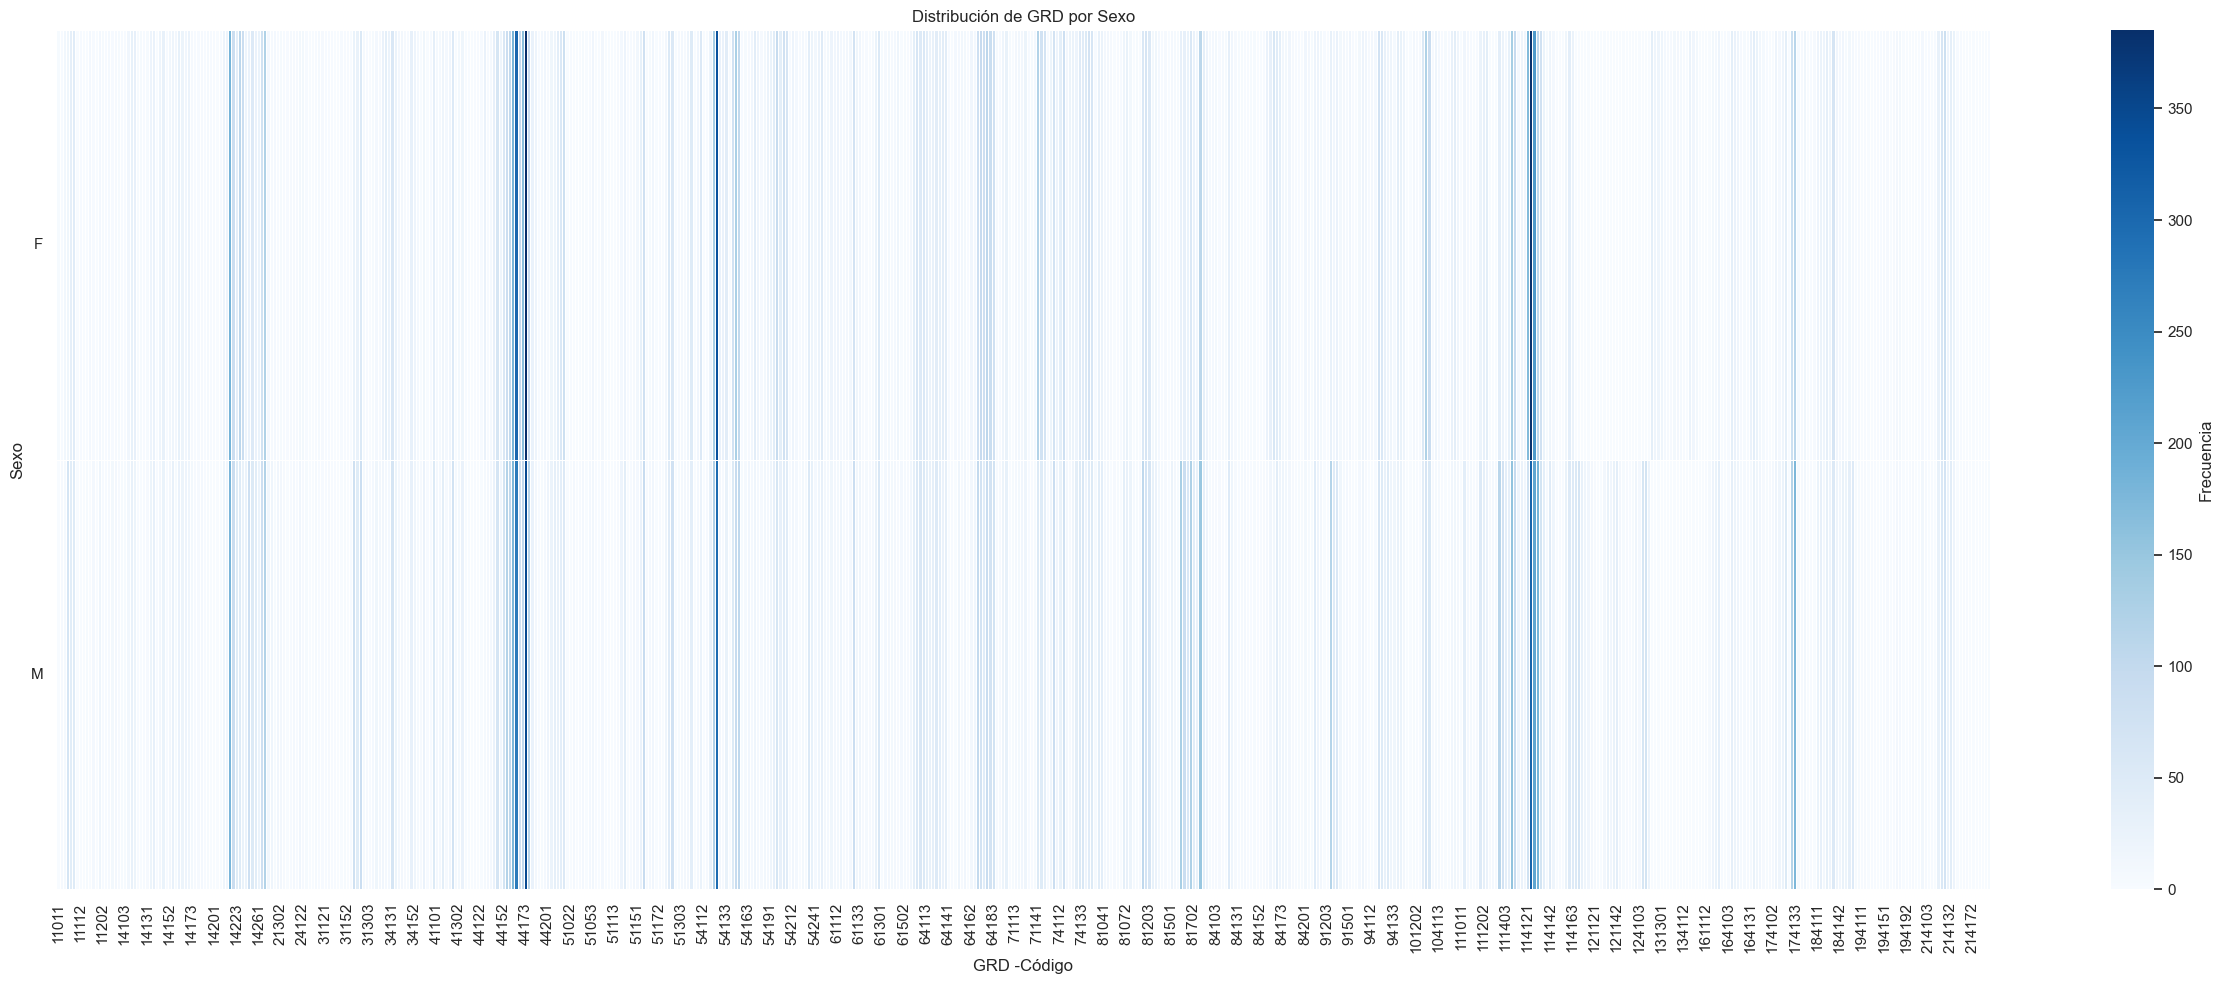


Chi² = 2417.19, p-value = 0.0000
→ Hay una asociación estadísticamente significativa entre Sexo y GRD.


In [6]:
# Normalizar texto: convertir todo a mayúsculas para evitar inconsistencias
df['Sexo'] = df['Sexo'].str.upper()

# Ver valores únicos y nulos
print(f"Valores únicos de Sexo: {df['Sexo'].unique()}")
print(f"Valores nulos de Sexo: {df['Sexo'].isnull().sum()}")

# Frecuencia por categoría
print("\nFrecuencia por categoría:")
print(df['Sexo'].value_counts())

# Crear tabla cruzada Sexo vs GRD
sexo_grd = pd.crosstab(df['Sexo'], df['GRD -Código'])

# Heatmap de la relación
plt.figure(figsize=(25, 10))
sns.heatmap(sexo_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Sexo")
plt.xlabel("GRD -Código")
plt.ylabel("Sexo")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

chi2, p, dof, expected = chi2_contingency(sexo_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación estadísticamente significativa entre Sexo y GRD.")
else:
    print("→ No se encontró una asociación significativa.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <h4 style="font-size: 12pt;"><strong>Variable Código de ciudad: </strong></h4>
    <p style="font-size: 12pt;">La variable "Código de ciudad" no presenta valores nulos y contiene 208 valores únicos, lo cual implica una alta cardinalidad. Aunque se pueden identificar algunas ciudades con alta frecuencia como Medellín (código 5001), muchas otras tienen pocos registros, lo que introduce una gran cantidad de categorías poco representativas. El análisis visual mediante heatmap centrado en las 20 ciudades más frecuentes muestra diferencias leves entre ciudades otras ciudades a parte de Medellín, por lo que el comportamiento general es difuso. A pesar de que la prueba de chi-cuadrado muestra una relación estadísticamente significativa entre el código de ciudad y el GRD, la utilidad práctica de esta variable está desbalanceada: su significado es más geográfico-administrativo que clínico, y su alta dimensionalidad introduce complejidad sin aportar una interpretación clara. Por estos motivos, y considerando además el riesgo de introducir ruido esta variable se descartará del modelo predictivo.</p>
    </div>

Valores únicos en 'Código de ciudad': 208
Valores nulos en 'Código de ciudad': 0

Top 5 ciudades más frecuentes:
Codigo de ciudad
5001    18236
5088     1424
5360      687
5266      614
5212      454
Name: count, dtype: int64


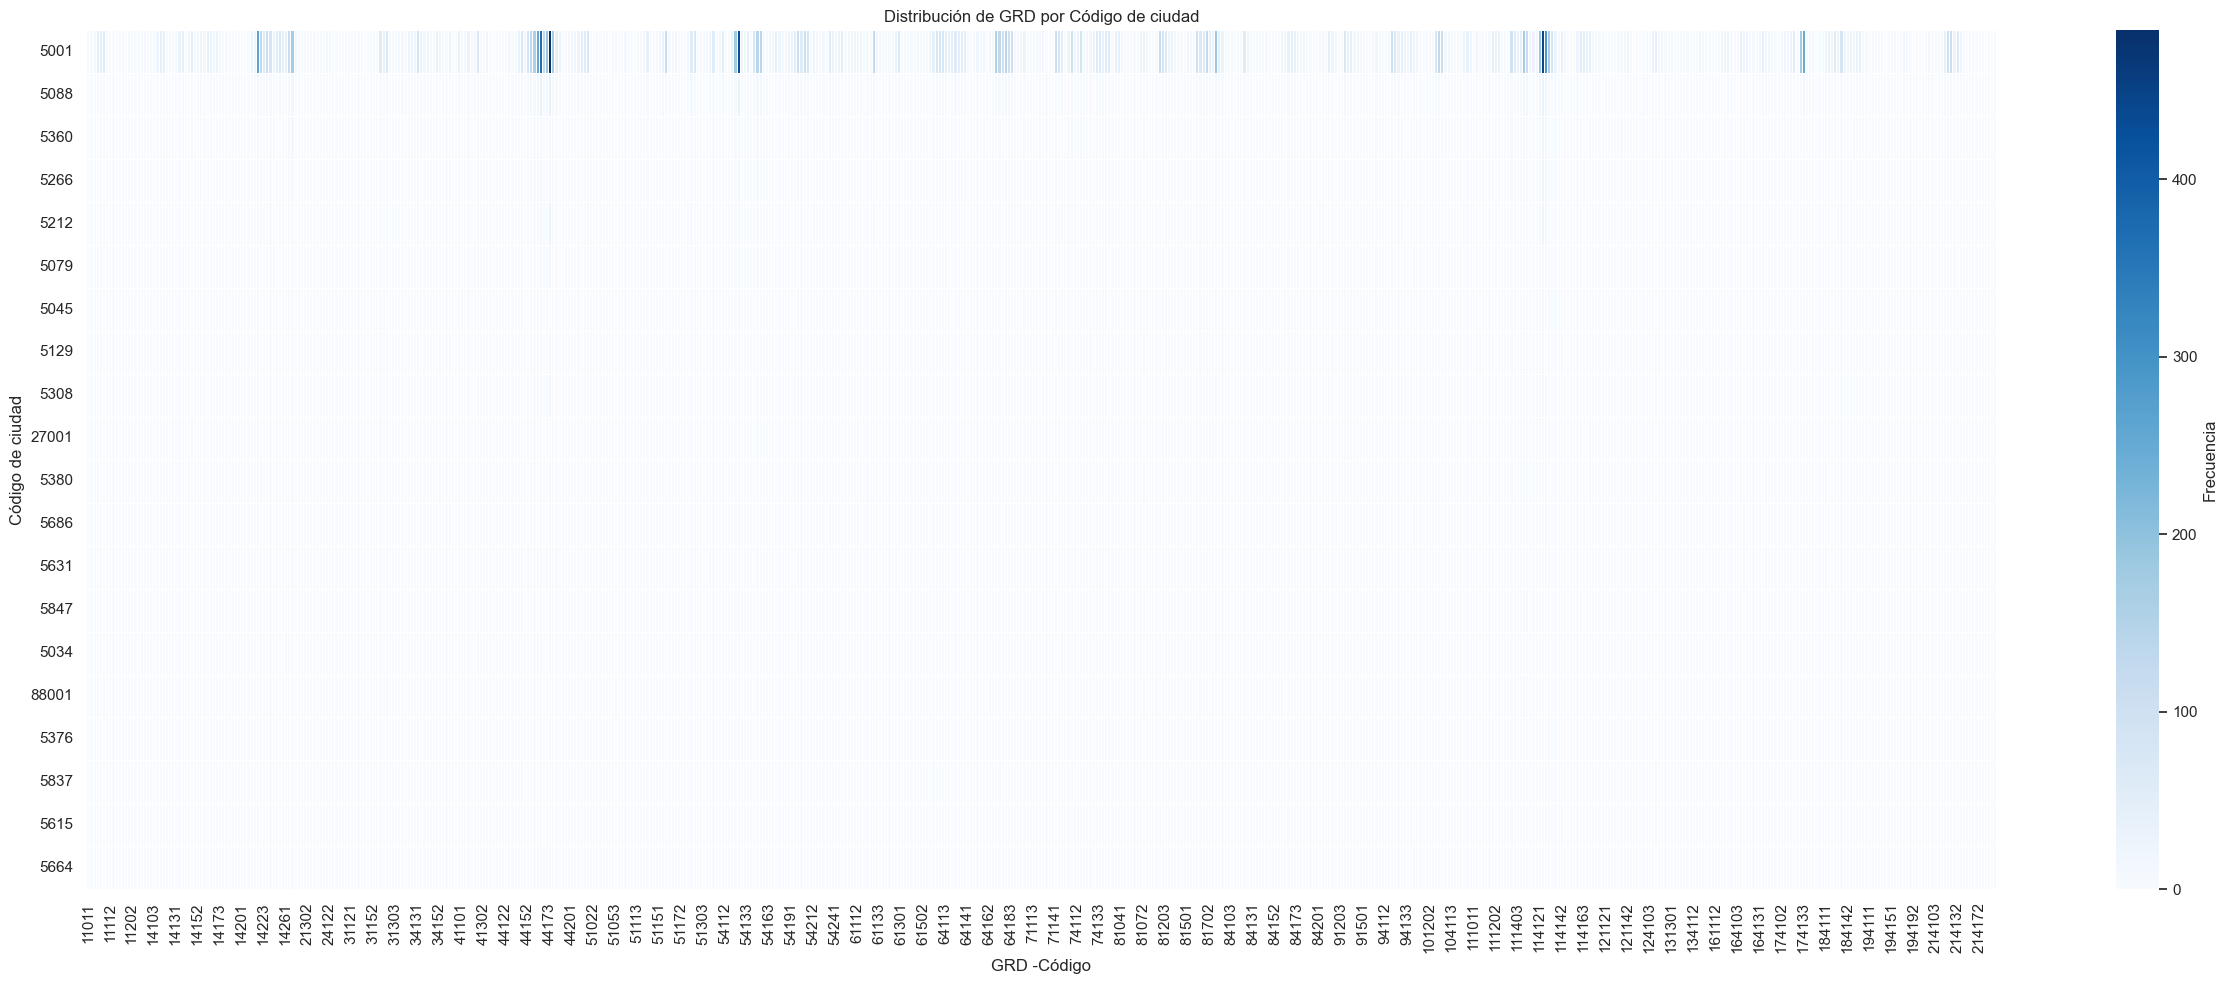


Chi² = 154240.11, p-value = 0.0000
→ Hay una asociación estadísticamente significativa entre ciudad y GRD.


In [7]:
# Ver cuántos valores únicos hay en 'Código de ciudad'
print(f"Valores únicos en 'Código de ciudad': {df['Codigo de ciudad'].nunique()}")

# Verificar si hay valores nulos
print(f"Valores nulos en 'Código de ciudad': {df['Codigo de ciudad'].isnull().sum()}")

# Ver top 5 ciudades más frecuentes
print("\nTop 5 ciudades más frecuentes:")
print(df['Codigo de ciudad'].value_counts().head())

# Tabla cruzada Código ciudad vs GRD
ciudad_grd = pd.crosstab(df['Codigo de ciudad'], df['GRD -Código'])

# Reducir a las 20 ciudades más frecuentes para visualización
top_ciudades = df['Codigo de ciudad'].value_counts().head(20).index
ciudad_grd_top = ciudad_grd.loc[top_ciudades]

# Heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(ciudad_grd_top, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Código de ciudad")
plt.xlabel("GRD -Código")
plt.ylabel("Código de ciudad")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

chi2, p, dof, _ = chi2_contingency(ciudad_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación estadísticamente significativa entre ciudad y GRD.")
else:
    print("→ No se encontró una asociación significativa.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <h4 style="font-size: 12pt;"><strong>Variable Fecha de ingreso: </strong></h4>
    <p style="font-size: 12pt;">La variable "Fecha de ingreso" fue convertida exitosamente al formato datetime, permitiendo extraer componentes temporales como el mes del año y el día de la semana. Aunque no hay valores nulos explícitos, la utilidad clínica de esta variable es cuestionable: la distribución de ingresos por mes y por día de la semana es bastante homogénea, sin picos evidentes que indiquen estacionalidad médica clara. El análisis cruzado con GRD muestra diferencias mínimas. En términos prácticos, la variable introduce más ruido que señal y no aporta una base fisiopatológica para mejorar la predicción. Por tanto, se excluirá del modelo.</p>
    </div>


Distribución de ingresos por mes:
Enero         2600
Febrero       2245
Marzo         2373
Abril         2294
Mayo          2339
Junio         2341
Julio         2389
Agosto        2299
Septiembre    2458
Octubre       2326
Noviembre     1981
Diciembre     2063
Name: count, dtype: int64


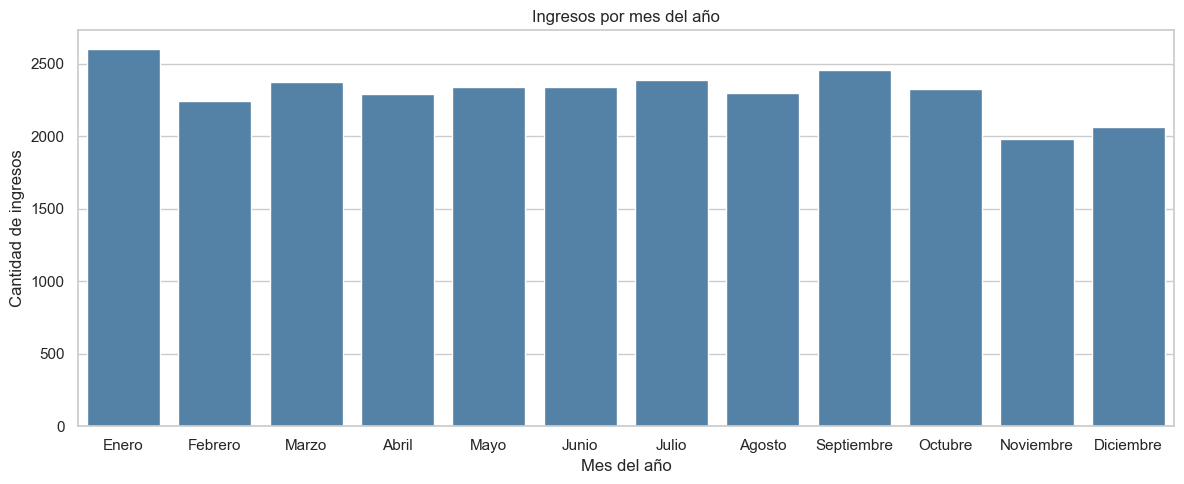


Distribución de ingresos por día de la semana:
Lunes        3487
Martes       3102
Miércoles    4239
Jueves       4184
Viernes      4206
Sábado       4354
Domingo      4136
Name: count, dtype: int64


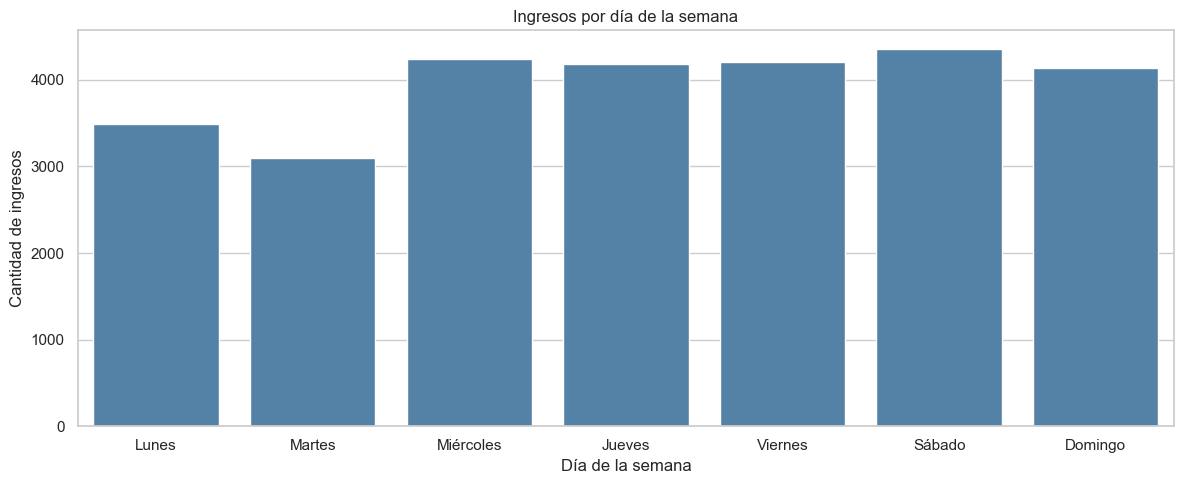

In [8]:
# Convertir la columna a datetime con formato específico
fecha_temp = pd.to_datetime(df['Fecha de ingreso'], format='%d%m%Y', errors='coerce')

# Extraer mes y día de la semana
df['Mes ingreso'] = fecha_temp.dt.month
df['Día semana ingreso'] = fecha_temp.dt.dayofweek

# Distribución por mes
meses = df['Mes ingreso'].value_counts().sort_index()
# Nombres de los meses
nombre_mes = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
              "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
# Asegurar indices enteros
meses.index = meses.index.astype(int)
meses.index = [nombre_mes[i - 1] for i in meses.index]

print("\nDistribución de ingresos por mes:")
print(meses)

plt.figure(figsize=(12,5))
sns.barplot(x=meses.index, y=meses.values, color='steelblue')
plt.title("Ingresos por mes del año")
plt.xlabel("Mes del año")
plt.ylabel("Cantidad de ingresos")
plt.tight_layout()
plt.show()

# Distribución por día de la semana
dias = df['Día semana ingreso'].value_counts().sort_index()
nombre_dia = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
# Asegurar indices enteros
dias.index = dias.index.astype(int)
dias.index = [nombre_dia[i] for i in dias.index]

print("\nDistribución de ingresos por día de la semana:")
print(dias)

plt.figure(figsize=(12,5))
sns.barplot(x=dias.index, y=dias.values, color='steelblue')
plt.title("Ingresos por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de ingresos")
plt.tight_layout()
plt.show()

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <h4 style="font-size: 12pt;"><strong>Variable Tipo de ingreso: </strong></h4>
    <p style="font-size: 12pt;">La variable "Tipo de ingreso" presenta dos categorías claramente diferenciadas: "URGENCIA" y "PROGRAMADO", sin valores nulos y con formato homogéneo tras la normalización. Aunque hay un fuerte desbalance (más del 90% de los ingresos son por urgencia), los resultados del análisis gráfico y la prueba estadística muestran que el tipo de ingreso sí tiene una asociación significativa con el GRD. En particular, ciertos diagnósticos se concentran más en ingresos de urgencia, lo cual tiene sentido clínico (por ejemplo, traumas, eventos cardiovasculares agudos o infecciones graves). A pesar del desbalance, esta variable es informativa y relevante. Se conservará como categórica binaria en el modelo, ya que su aporte es claro tanto estadística como clínicamente.</p>
    </div>

Valores únicos de Tipo de ingreso: ['URGENCIA' 'PROGRAMADO']
Valores nulos de Tipo de ingreso: 0

Frecuencia por categoría: Tipo de ingreso
URGENCIA      25574
PROGRAMADO     2295
Name: count, dtype: int64


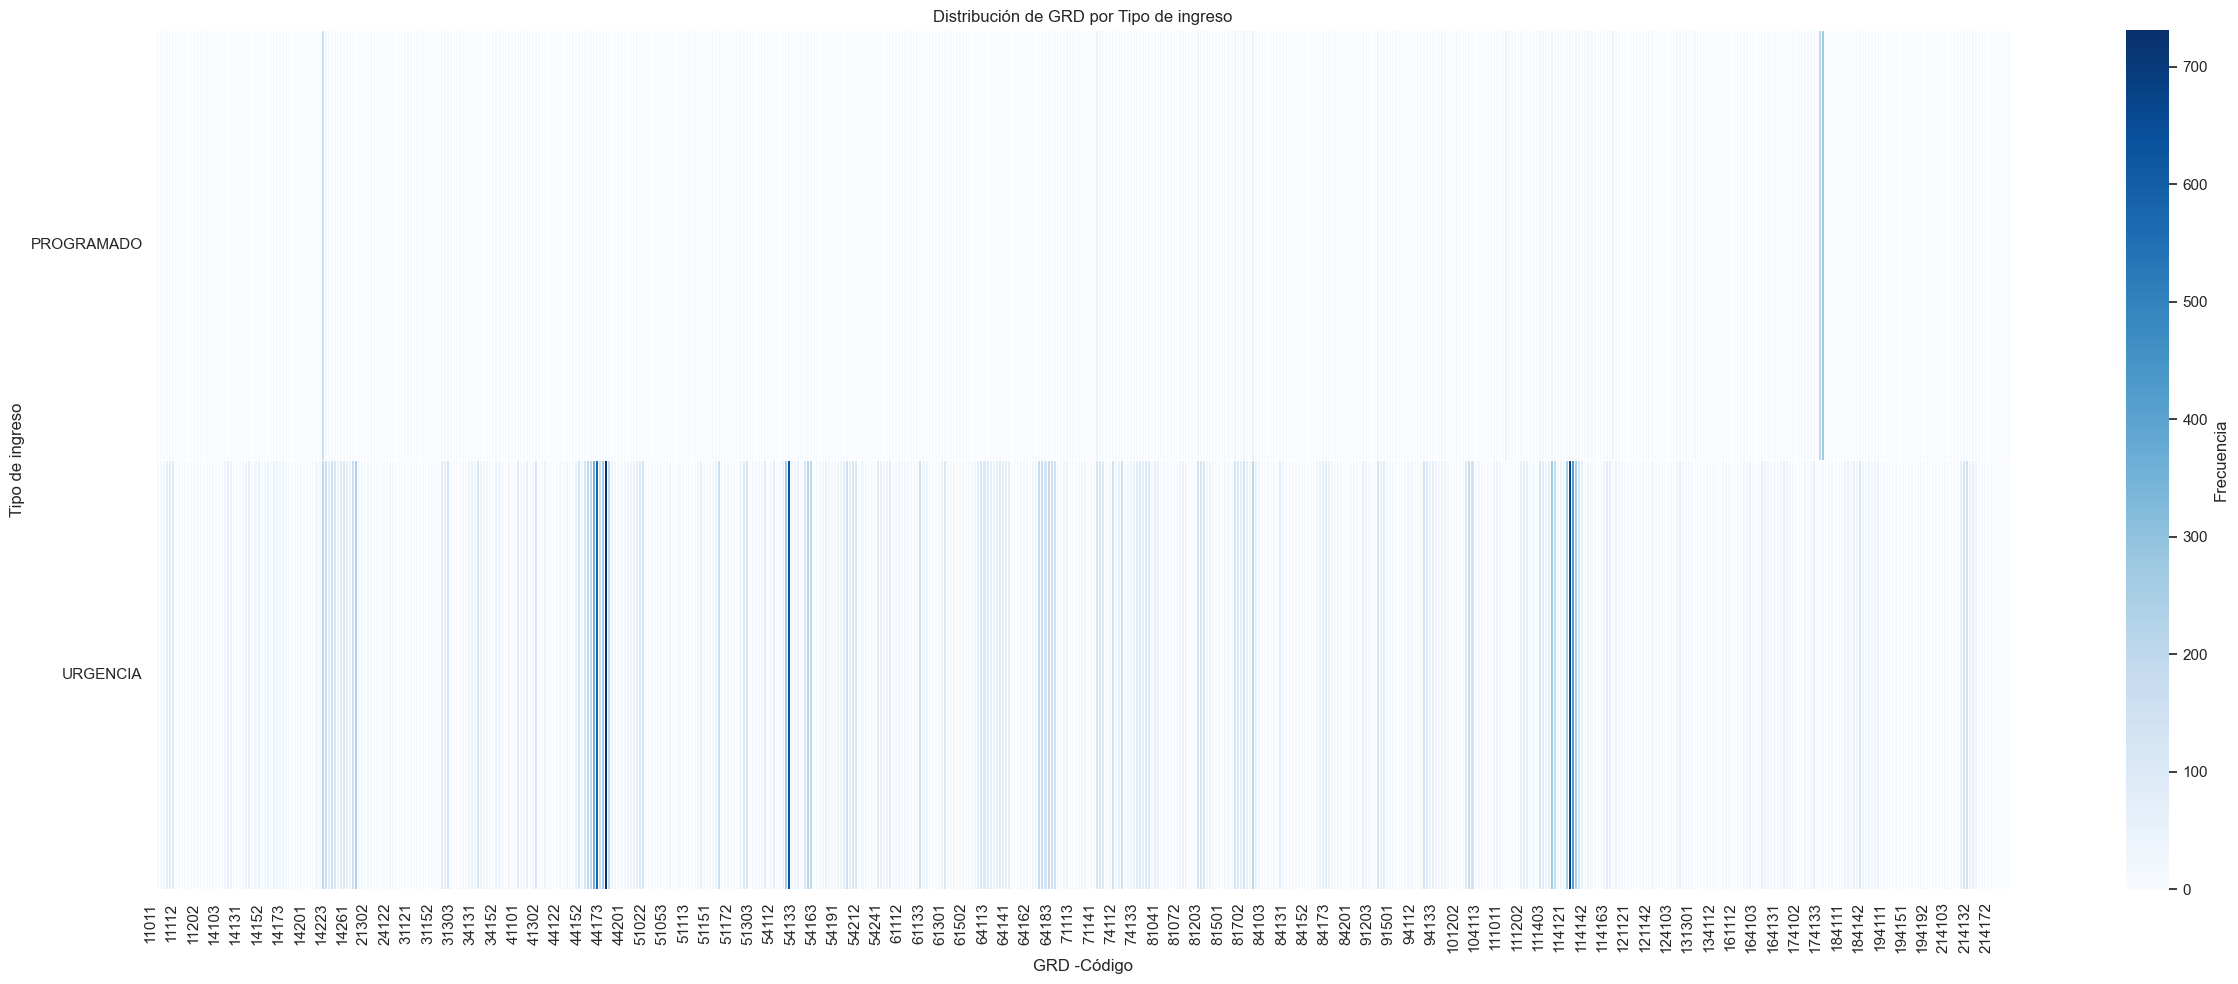


Chi² = 10381.03, p-value = 0.0000
→ Hay una asociación estadísticamente significativa entre Tipo de ingreso y GRD.


In [9]:
# Normalizar texto: quitar espacios, convertir a mayúsculas
df['Tipo de ingreso'] = df['Tipo de ingreso'].str.strip().str.upper()

# Unificar variantes comunes (por si acaso)
df['Tipo de ingreso'] = df['Tipo de ingreso'].replace({
    'URGENCIAS': 'URGENCIA'
})

# Verificar valores únicos y nulos
print(f"Valores únicos de Tipo de ingreso: {df['Tipo de ingreso'].unique()}")
print(f"Valores nulos de Tipo de ingreso: {df['Tipo de ingreso'].isnull().sum()}")

# Frecuencia por categoría
print(f"\nFrecuencia por categoría: {df['Tipo de ingreso'].value_counts()}")

# Tabla cruzada Tipo de ingreso vs GRD
ingreso_grd = pd.crosstab(df['Tipo de ingreso'], df['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(ingreso_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Tipo de ingreso")
plt.xlabel("GRD -Código")
plt.ylabel("Tipo de ingreso")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Prueba de Chi-cuadrado
chi2, p, dof, _ = chi2_contingency(ingreso_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación estadísticamente significativa entre Tipo de ingreso y GRD.")
else:
    print("→ No se encontró asociación significativa.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;"> 
    <h4 style="font-size: 12pt;"><strong>Variable Fecha de egreso y Días de estancia: </strong></h4> 
    <p style="font-size: 12pt;">La variable "Fecha de egreso", derivada del campo original en formato fecha, fue utilizada para calcular la variable numérica "Días de estancia", que representa la duración total de la hospitalización de cada paciente. Esta última no presenta valores nulos y cuenta con 107 valores distintos, con una media de 8.45 días y una mediana de 6 días, lo cual indica una distribución sesgada a la derecha, debido a la presencia de estancias muy prolongadas (hasta 174 días). La mayor parte de los pacientes estuvo hospitalizada entre 3 y 10 días, agrupados en los rangos más frecuentes: 3–5 días (n=8717) y 6–10 días (n=7817).</p> 
    <p style="font-size: 12pt;">La categorización de esta variable en grupos ordinales permitió evidenciar una relación estadísticamente significativa con el GRD (Chi² = 16622.02, p &lt; 0.0001), lo cual es coherente clínicamente, ya que ciertas condiciones diagnósticas requieren tiempos de estancia más prolongados que otras. Esta variable aporta valor informativo tanto desde una perspectiva estadística como fisiopatológica, reflejando la complejidad y severidad de algunos cuadros clínicos.</p> 
    <p style="font-size: 12pt;">Por su carácter continuo y clínicamente interpretable, "Días de estancia" será conservada como variable relevante en el modelo predictivo. Además, su versión categorizada puede emplearse como variable complementaria en análisis interpretativos o modelos alternativos que se beneficien de categorías discretas.</p> 
</div>

Valores únicos de Días estancia: 107
Valores nulos de Días estancia: 0
count    27869.000000
mean         8.452295
std          9.219085
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max        174.000000
Name: Días estancia, dtype: float64


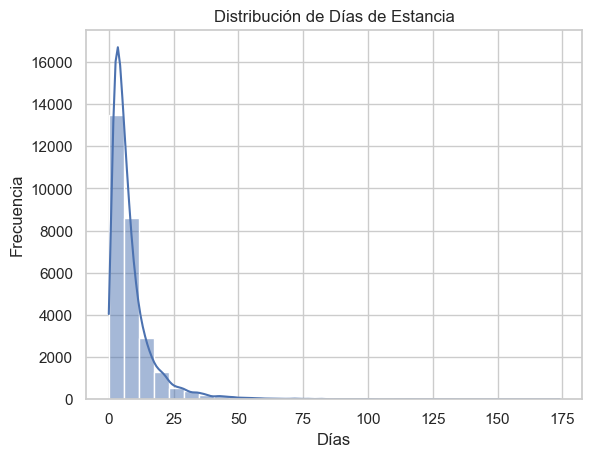


Distribución por grupos:
Estancia Grupo
3-5      8717
6-10     7817
0-2      4761
11-20    4467
21-40    1694
40+       413
Name: count, dtype: int64


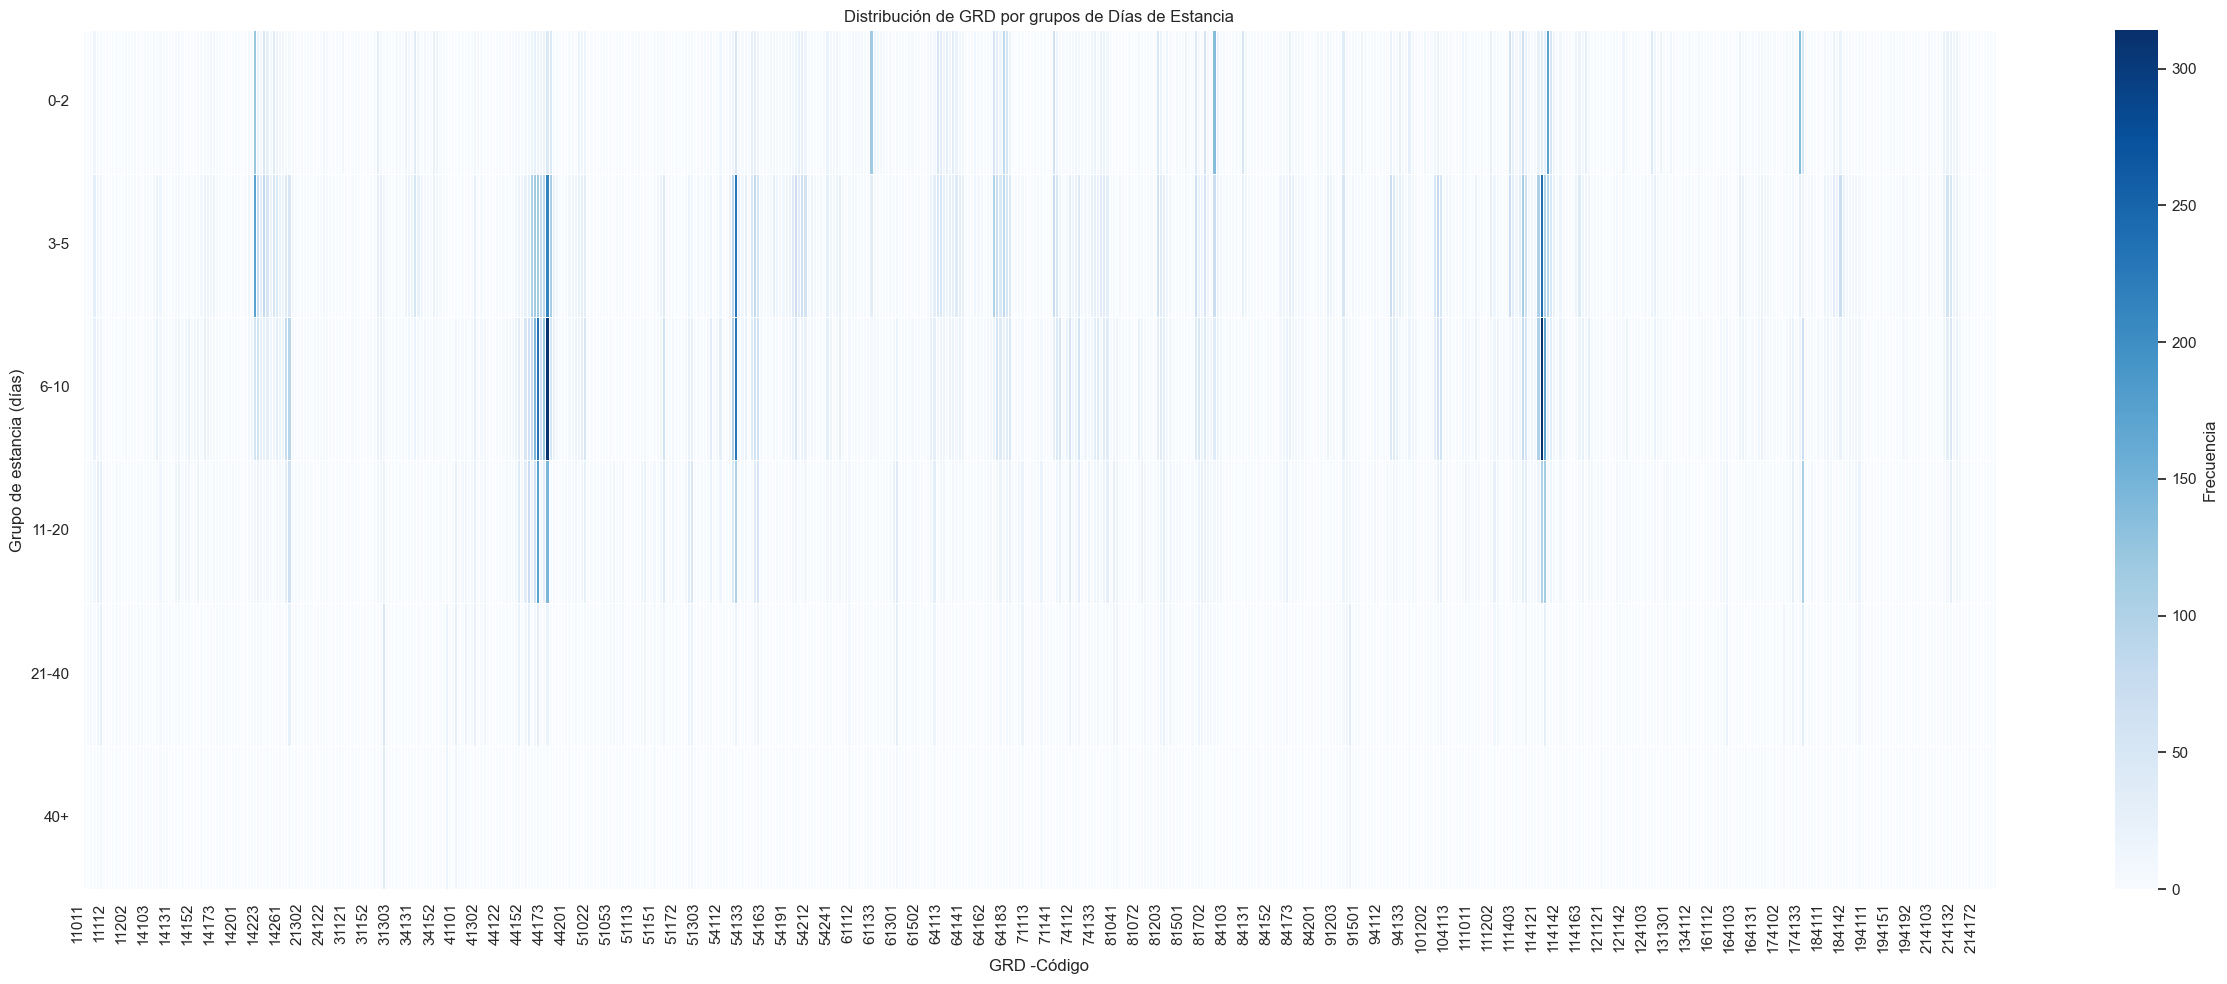


Chi² = 16622.02, p-value = 0.0000
→ Hay una asociación estadísticamente significativa entre los grupos de Días de Estancia y el GRD.


In [10]:
# Revisar nulos y valores únicos
print(f"Valores únicos de Días estancia: {df['Días estancia'].nunique()}")
print(f"Valores nulos de Días estancia: {df['Días estancia'].isnull().sum()}")

# Estadísticas básicas
print(df['Días estancia'].describe())

# Histograma
sns.histplot(df['Días estancia'], bins=30, kde=True)
plt.title("Distribución de Días de Estancia")
plt.xlabel("Días")
plt.ylabel("Frecuencia")
plt.show()

# Crear categoría agrupada de estancia (para mayor estabilidad en análisis cruzado)
df['Estancia Grupo'] = pd.cut(df['Días estancia'], bins=[0, 2, 5, 10, 20, 40, np.inf],
                               labels=["0-2", "3-5", "6-10", "11-20", "21-40", "40+"], include_lowest=True)

# Verificar distribución por grupo
print(f"\nDistribución por grupos:\n{df['Estancia Grupo'].value_counts()}")

# Tabla cruzada entre estancia binned y GRD
estancia_grd = pd.crosstab(df['Estancia Grupo'], df['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(estancia_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por grupos de Días de Estancia")
plt.xlabel("GRD -Código")
plt.ylabel("Grupo de estancia (días)")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Prueba de Chi-cuadrado
from scipy.stats import chi2_contingency
chi2, p, dof, _ = chi2_contingency(estancia_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación estadísticamente significativa entre los grupos de Días de Estancia y el GRD.")
else:
    print("→ No se encontró asociación significativa.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
  <h4 style="font-size: 12pt;"><strong>Variable Servicio de alta: </strong></h4>
  <p style="font-size: 12pt;">
    La variable "Servicio de alta" representa el servicio hospitalario donde finaliza la atención del paciente. No tiene valores nulos y presenta 26 categorías con alta disparidad en frecuencias: algunos servicios como 156, 24 y 162 concentran gran parte de los casos, mientras otros como 230 son anecdóticos (n=1). El mapa de calor revela asociaciones claras con ciertos GRD, especialmente en servicios especializados. Aunque categórica con cardinalidad moderada, su relación clínicamente coherente con el diagnóstico final justifica su inclusión en el modelo, previa codificación adecuada para evitar el ruido de clases infrecuentes.
  </p>
</div>


Valores únicos de ServicioAlta: [ 20 162  59 156  29  25  42  38  40  23  55  28  44  58 158 126 297  30
  24  22  21  54  39  31  45 230]
Valores nulos de ServicioAlta: 0

Frecuencia por categoría: 
ServicioAlta
156    2031
24     1856
162    1699
20     1685
23     1617
126    1571
55     1569
59     1521
28     1504
44     1492
22     1372
297    1351
54     1233
38     1226
39     1194
29     1134
40      970
21      899
31      758
30      509
158     326
25      123
42       98
58       88
45       42
230       1
Name: count, dtype: int64


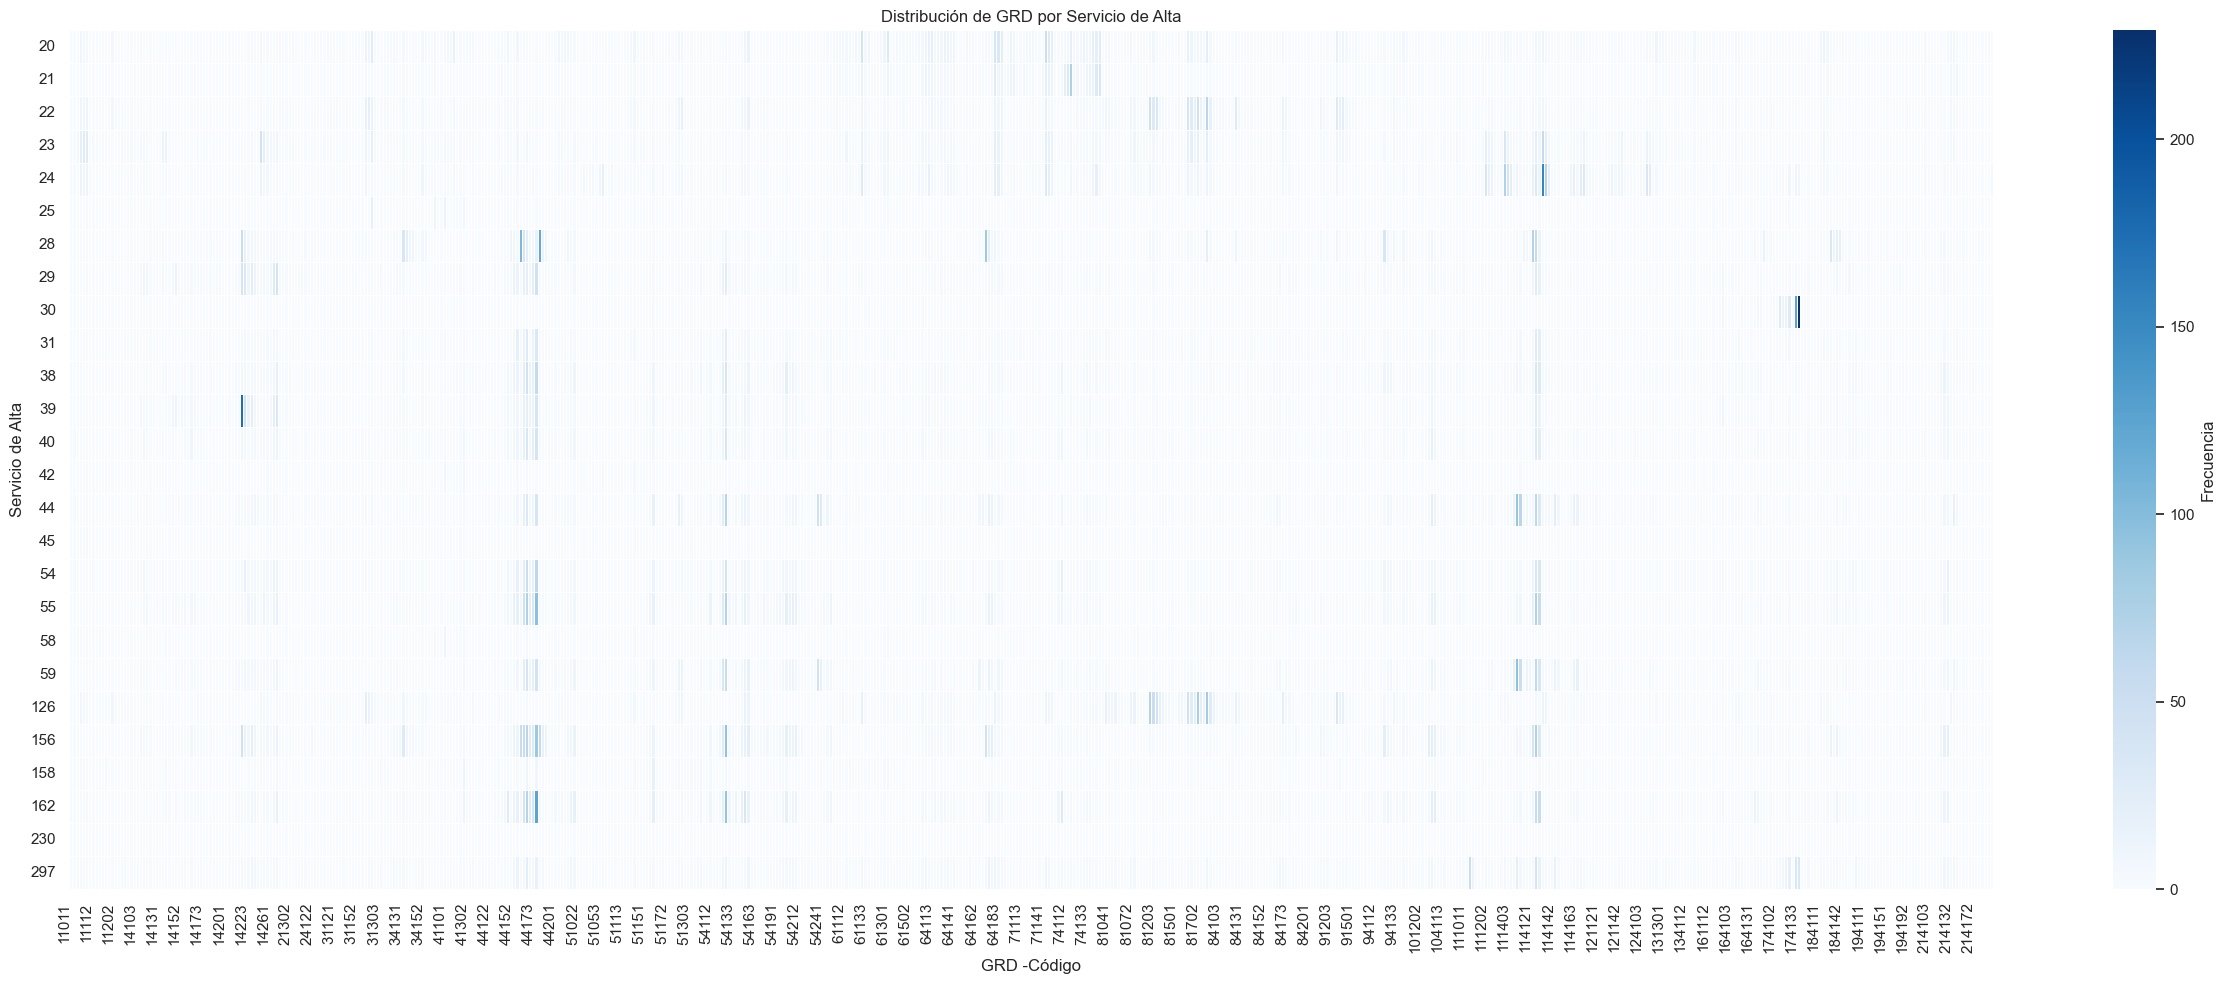


Chi² = 75460.72, p-value = 0.0000
→ Hay una asociación estadísticamente significativa entre ServicioAlta y GRD.


In [11]:
# Verificar valores únicos y nulos
print(f"Valores únicos de ServicioAlta: {df['ServicioAlta'].unique()}")
print(f"Valores nulos de ServicioAlta: {df['ServicioAlta'].isnull().sum()}")

# Frecuencia por categoría
print(f"\nFrecuencia por categoría: \n{df['ServicioAlta'].value_counts()}")

# Tabla cruzada ServicioAlta vs GRD
servicio_grd = pd.crosstab(df['ServicioAlta'], df['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(servicio_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Servicio de Alta")
plt.xlabel("GRD -Código")
plt.ylabel("Servicio de Alta")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Prueba de Chi-cuadrado
from scipy.stats import chi2_contingency
chi2, p, dof, _ = chi2_contingency(servicio_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación estadísticamente significativa entre ServicioAlta y GRD.")
else:
    print("→ No se encontró asociación significativa.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
  <h4 style="font-size: 12pt;"><strong>Variable Cuidados intensivos: </strong></h4>
  <p style="font-size: 12pt;">
    La variables "Cuidados intensivos" es una variable categórica binaria sin valores nulos, con categorías 'SI' y 'NO'. La mayoría de los pacientes no requirió cuidados intensivos (96%), pero los 1184 casos que sí lo hicieron muestran una distribución diferencial de GRD. El análisis chi-cuadrado confirma una asociación estadísticamente significativa (χ² = 9766.48, p &lt; 0.0001). Su relevancia clínica es evidente, al reflejar gravedad o complejidad del caso, por lo que se conservará como variable predictiva.
  </p>
</div>


Valores únicos de Cuidados intensivos: ['NO' 'SI']
Valores nulos de Cuidados intensivos: 0

Frecuencia por categoría: 
Cuidados intensivos
NO    26685
SI     1184
Name: count, dtype: int64


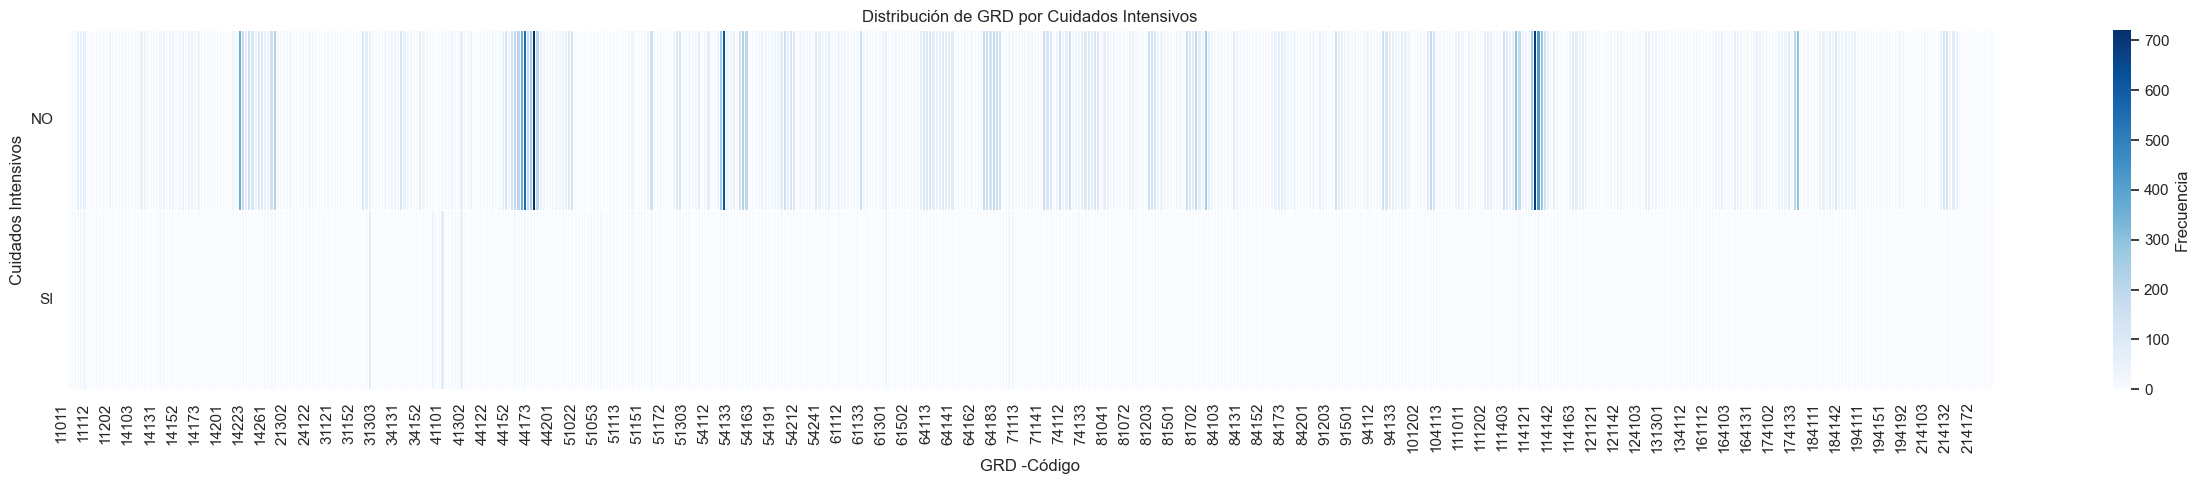


Chi² = 9766.48, p-value = 0.0000
→ Hay una asociación estadísticamente significativa entre Cuidados intensivos y GRD.


In [12]:
# Normalizar texto: quitar espacios, convertir a mayúsculas
df['Cuidados intensivos'] = df['Cuidados intensivos'].astype(str).str.strip().str.upper()

# Verificar valores únicos y nulos
print(f"Valores únicos de Cuidados intensivos: {df['Cuidados intensivos'].unique()}")
print(f"Valores nulos de Cuidados intensivos: {df['Cuidados intensivos'].isnull().sum()}")

# Frecuencia por categoría
print(f"\nFrecuencia por categoría: \n{df['Cuidados intensivos'].value_counts()}")

# Tabla cruzada Cuidados intensivos vs GRD
uci_grd = pd.crosstab(df['Cuidados intensivos'], df['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 5))
sns.heatmap(uci_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Cuidados Intensivos")
plt.xlabel("GRD -Código")
plt.ylabel("Cuidados Intensivos")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Prueba de Chi-cuadrado
from scipy.stats import chi2_contingency
chi2, p, dof, _ = chi2_contingency(uci_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación estadísticamente significativa entre Cuidados intensivos y GRD.")
else:
    print("→ No se encontró asociación significativa.")



<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
  <h4 style="font-size: 12pt;"><strong>Variable Días en unidad de cuidados intensivos: </strong></h4>
  <p style="font-size: 12pt;">
    La variable "Días en unidad de cuidados intensivos" es una variable numérica sin valores nulos, con 66 valores únicos y una distribución altamente asimétrica: el 96% de los pacientes no tuvo días en UCI. El valor máximo fue 92 días. La variable fue categorizada en grupos ordinales (0, 2–3, 4–7, 8–14, 15+) mostrando asociación significativa con GRD (χ² = 23417.05, p &lt; 0.0001). Su presencia y duración reflejan gravedad clínica y aportan valor predictivo, por lo que se mantendrá en el modelo tanto en forma continua como agrupada.
  </p>
</div>


Valores únicos: 66
Nulos: 0
count    27869.000000
mean         0.380782
std          2.990207
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         92.000000
Name: Días de Unidad Cuidado Intensivo, dtype: float64

Distribución por grupo:
UCI Grupo
0       26685
2-3       382
4-7       300
15+       208
8-14      196
1          98
Name: count, dtype: int64
count     27869
unique        6
top           0
freq      26685
Name: UCI Grupo, dtype: object


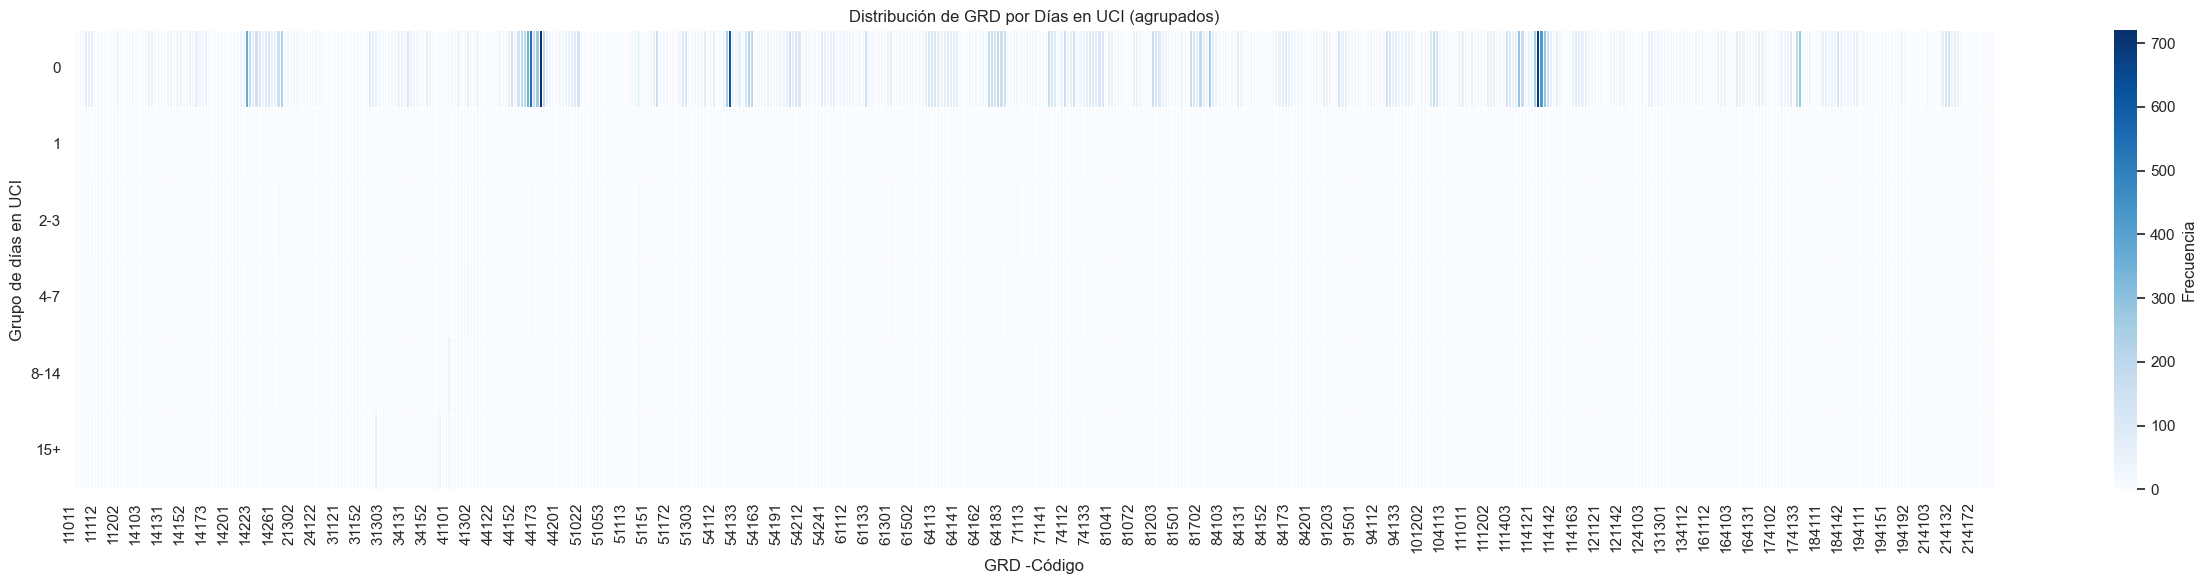


Chi² = 23417.05, p-value = 0.0000
→ Hay una asociación estadísticamente significativa entre Días en UCI y GRD.


In [13]:
# Verificar nulos y valores únicos
print(f"Valores únicos: {df['Días de Unidad Cuidado Intensivo'].nunique()}")
print(f"Nulos: {df['Días de Unidad Cuidado Intensivo'].isnull().sum()}")

# Reemplazar NaN por 0
df['Días de Unidad Cuidado Intensivo'] = df['Días de Unidad Cuidado Intensivo'].fillna(0)

# Estadísticas descriptivas
print(df['Días de Unidad Cuidado Intensivo'].describe())

# Crear rangos de UCI sin nulos
df['UCI Grupo'] = pd.cut(df['Días de Unidad Cuidado Intensivo'], bins=[-0.1, 0, 1, 3, 7, 14, np.inf],
                         labels=['0', '1', '2-3', '4-7', '8-14', '15+'])

# Frecuencia por grupo
print(f"\nDistribución por grupo:\n{df['UCI Grupo'].value_counts()}")
print(df['UCI Grupo'].describe())

# Crosstab UCI_GRUPO vs GRD
uci_dias_grd = pd.crosstab(df['UCI Grupo'], df['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 6))
sns.heatmap(uci_dias_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Días en UCI (agrupados)")
plt.xlabel("GRD -Código")
plt.ylabel("Grupo de días en UCI")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Prueba de Chi-cuadrado
from scipy.stats import chi2_contingency
chi2, p, dof, _ = chi2_contingency(uci_dias_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación estadísticamente significativa entre Días en UCI y GRD.")
else:
    print("→ No se encontró asociación significativa.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
  <h4 style="font-size: 12pt;"><strong>Variable Diagnóstico principal de egreso: </strong></h4>
  <p style="font-size: 12pt;">
    La variable "Diagnóstico principal de egreso" es una variable categórica con 2494 valores únicos y sin valores nulos. Aunque algunos códigos como N390, I449 y J189 concentran mayor frecuencia, la distribución es altamente dispersa. El mapa de calor revela agrupamientos específicos entre diagnósticos y ciertos GRD. La prueba chi-cuadrado muestra una asociación significativa (χ² = 76139.70, p &lt; 0.0001). Dado que esta variable representa la causa clínica principal del egreso, es altamente relevante para la predicción y se incluirá en el modelo, aplicando estrategias de codificación para manejar su alta cardinalidad.
  </p>
</div>


Valores únicos: 2494
Valores nulos: 0

Diagnósticos más frecuentes:
Dx principal de egreso
N390    1338
J441     757
J188     686
Z511     488
I110     471
A099     428
I120     420
J440     418
N201     397
I132     396
Name: count, dtype: int64


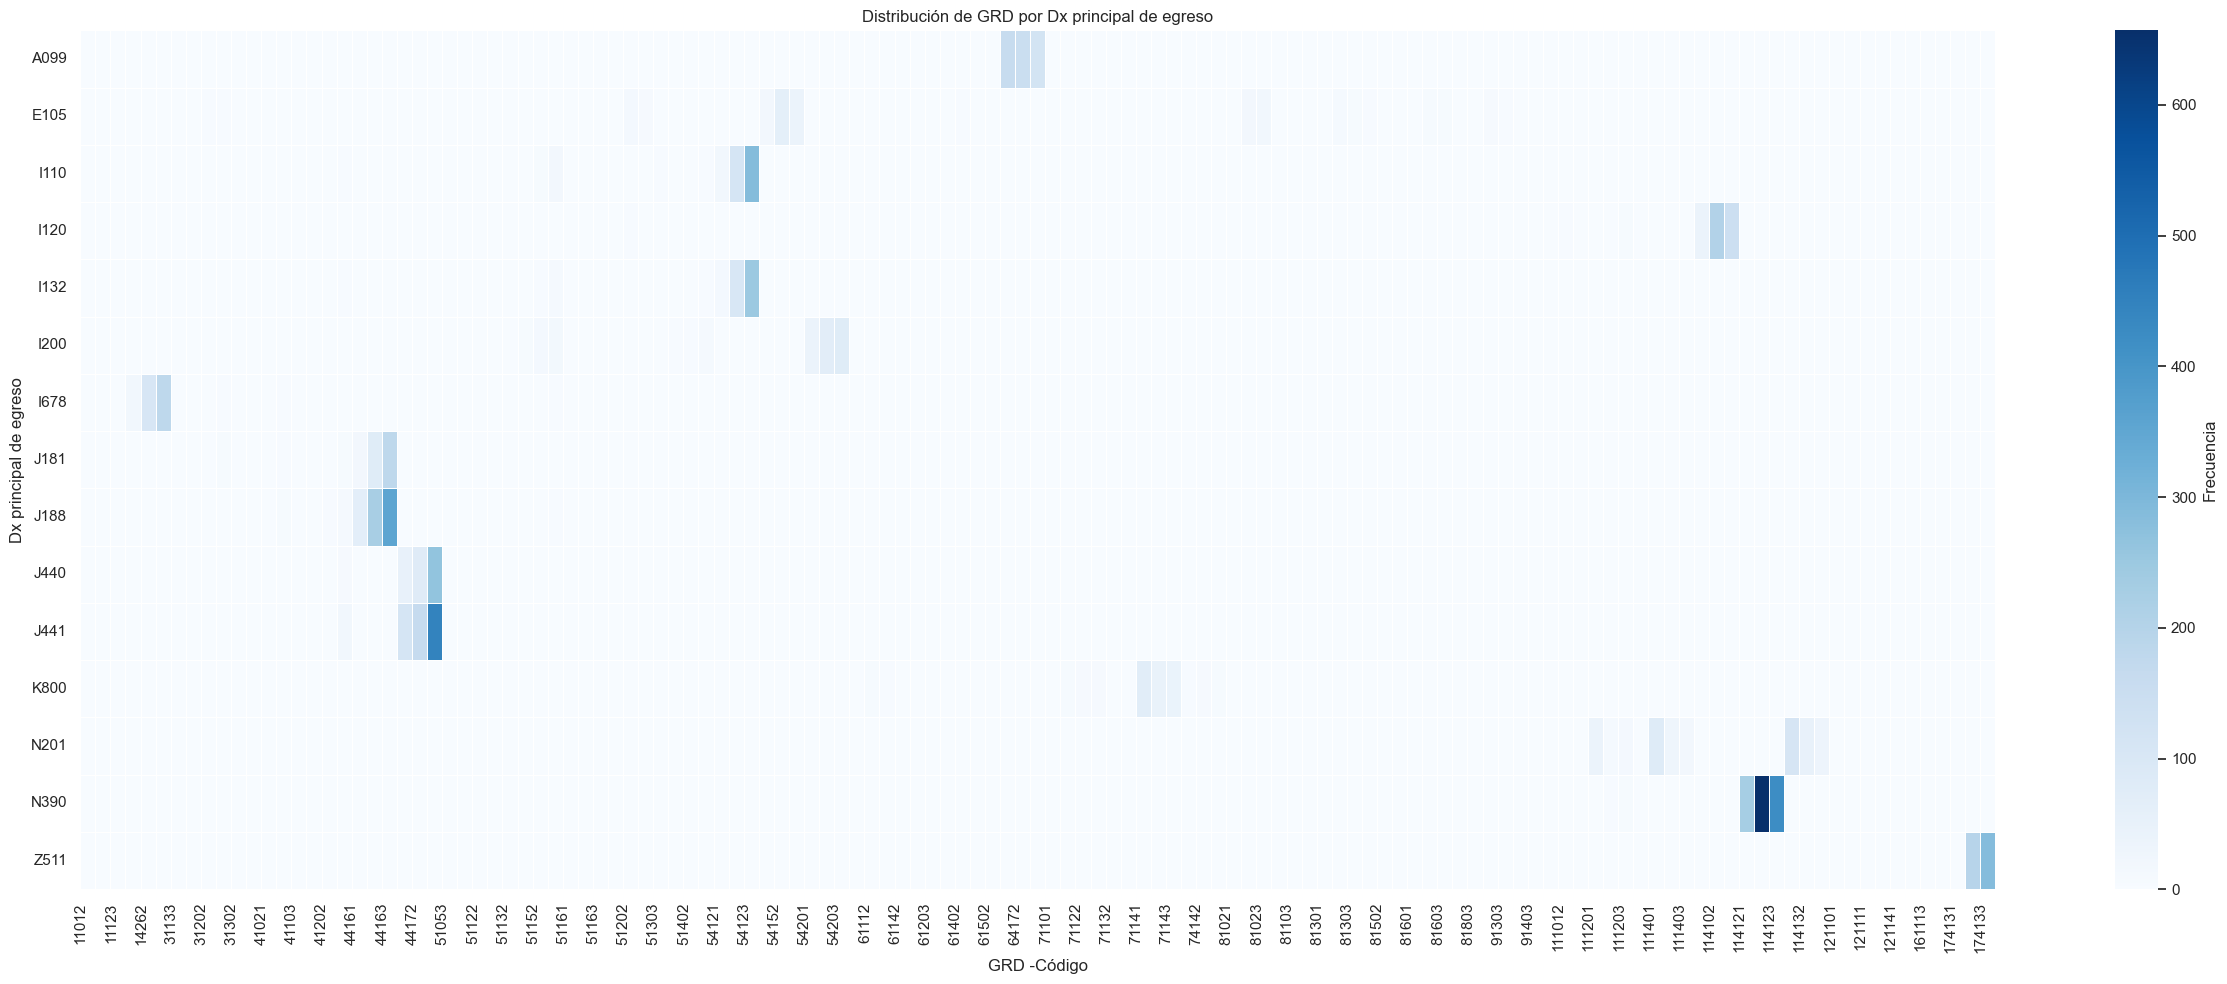


Chi² = 76139.70, p-value = 0.0000
→ Asociación significativa entre Dx principal de egreso y GRD.


In [14]:
# Normalizar texto
df['Dx principal de egreso'] = df['Dx principal de egreso'].astype(str).str.strip().str.upper()

# Valores únicos y nulos
print(f"Valores únicos: {df['Dx principal de egreso'].nunique()}")
print(f"Valores nulos: {df['Dx principal de egreso'].isnull().sum()}")

# Frecuencia
print("\nDiagnósticos más frecuentes:")
print(df['Dx principal de egreso'].value_counts().head(10))

# Crosstab con GRD (solo top 15 diagnósticos)
top_dxs = df['Dx principal de egreso'].value_counts().head(15).index
dx_grd = pd.crosstab(df[df['Dx principal de egreso'].isin(top_dxs)]['Dx principal de egreso'], df['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(dx_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Dx principal de egreso")
plt.xlabel("GRD -Código")
plt.ylabel("Dx principal de egreso")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Chi²
from scipy.stats import chi2_contingency
chi2, p, dof, _ = chi2_contingency(dx_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Asociación significativa entre Dx principal de egreso y GRD.")
else:
    print("→ No se encontró asociación significativa.")


Valores únicos: 893
Nulos: 0
Dx principal de egreso .1
N39    1371
J44    1189
J18    1094
E10     704
N20     668
K80     602
G40     507
Z51     489
I13     486
I11     471
Name: count, dtype: int64


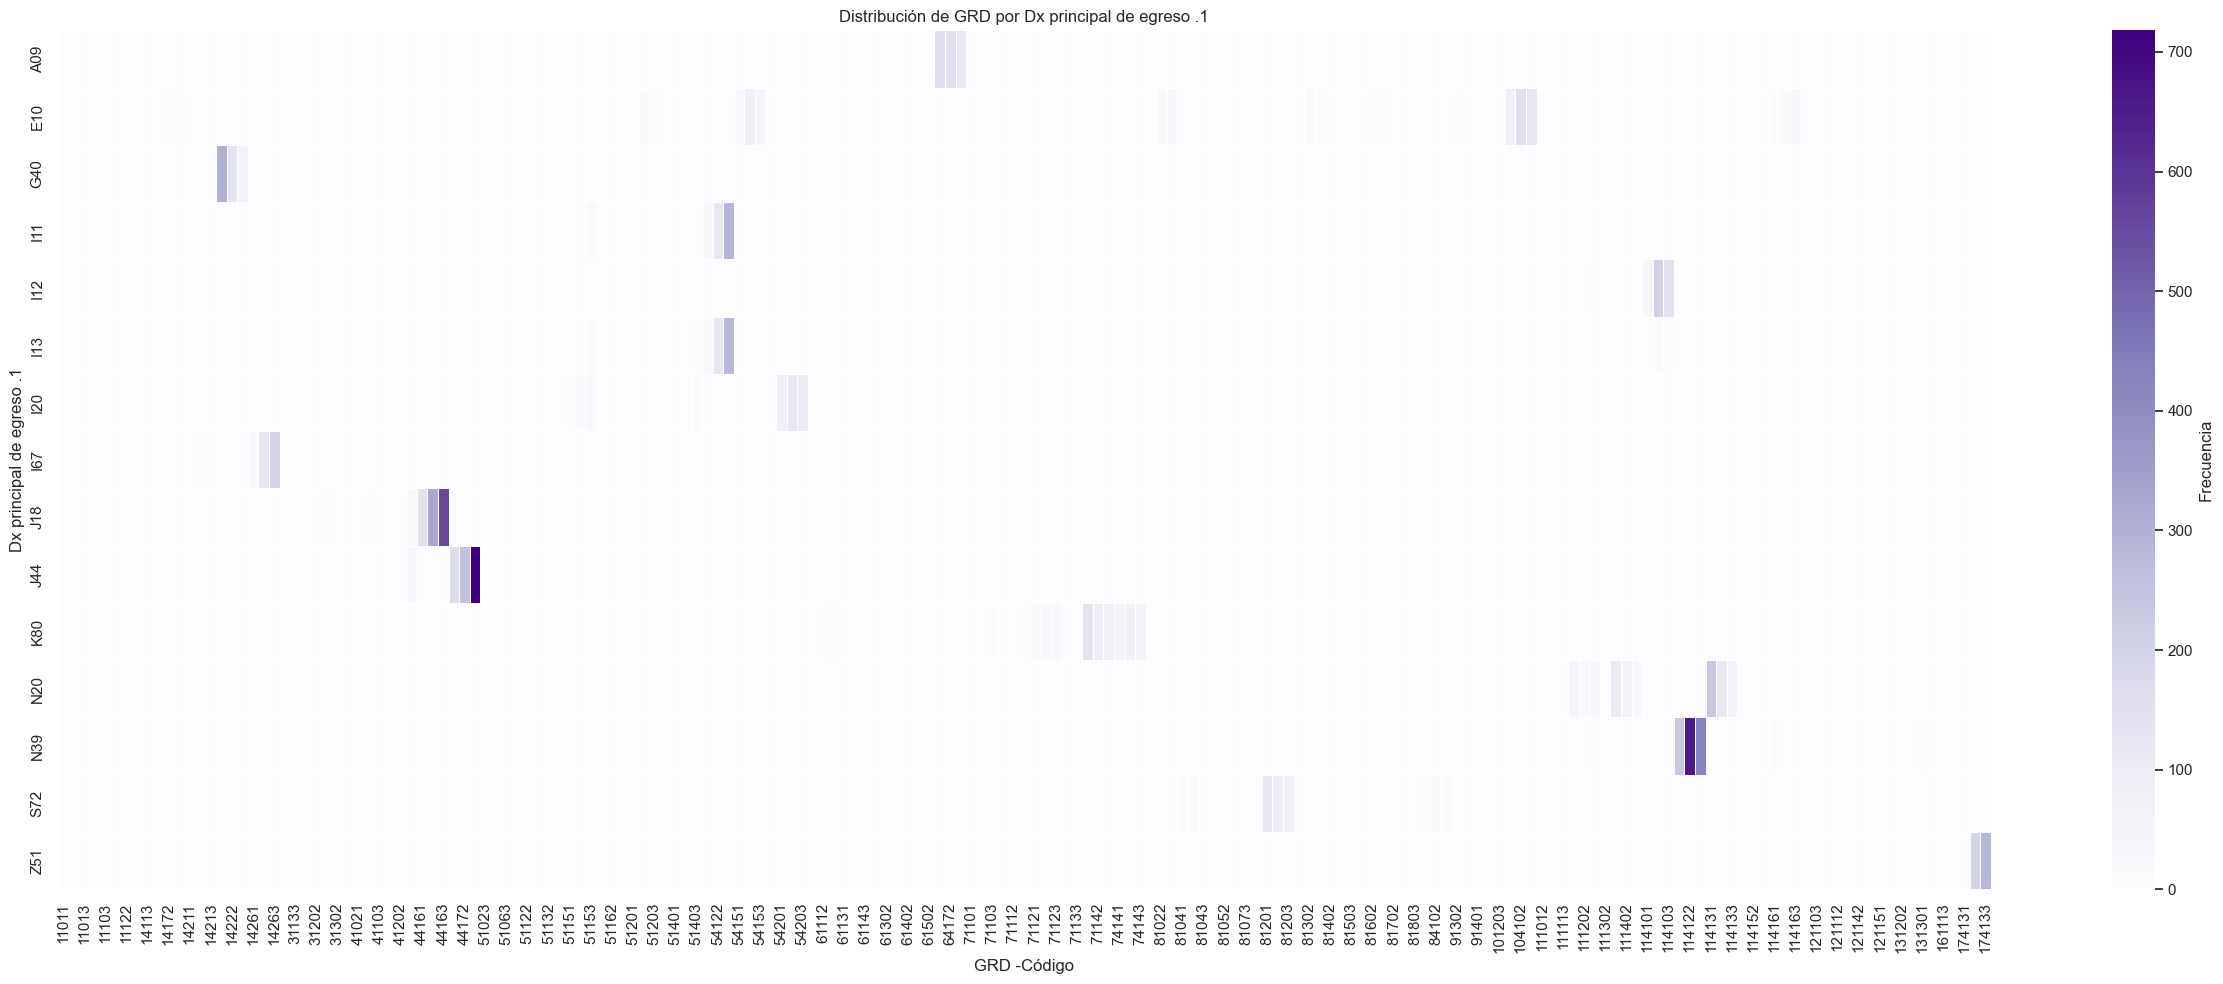


Chi² = 118851.77, p-value = 0.0000
→ Asociación significativa.


In [15]:
# Normalizar texto
df['Dx principal de egreso .1'] = df['Dx principal de egreso .1'].astype(str).str.strip().str.upper()

# Valores únicos y nulos
print(f"Valores únicos: {df['Dx principal de egreso .1'].nunique()}")
print(f"Nulos: {df['Dx principal de egreso .1'].isnull().sum()}")

# Frecuencia
print(df['Dx principal de egreso .1'].value_counts().head(10))

# Crosstab (top 15)
top_dxs = df['Dx principal de egreso .1'].value_counts().head(15).index
dx1_grd = pd.crosstab(df[df['Dx principal de egreso .1'].isin(top_dxs)]['Dx principal de egreso .1'], df['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(dx1_grd, cmap='Purples', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Dx principal de egreso .1")
plt.xlabel("GRD -Código")
plt.ylabel("Dx principal de egreso .1")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Chi²
chi2, p, dof, _ = chi2_contingency(dx1_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Asociación significativa.")
else:
    print("→ No hay asociación significativa.")


Únicos: 893
Nulos: 0
Dx Ppal 3 Caracteres
OTROS TRASTORNOS DEL SISTEMA URINARIO                  1371
OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRONICAS    1189
NEUMONIA ORGANISMO NO ESPECIFICADO                     1094
DIABETES MELLITUS INSULINODEPENDIENTE                   704
CALCULO DEL RINON Y DEL URETER                          668
COLELITIASIS                                            602
EPILEPSIA                                               507
OTRA ATENCION MEDICA                                    489
ENFERMEDAD CARDIORRENAL HIPERTENSIVA                    486
ENFERMEDAD CARDIACA HIPERTENSIVA                        471
Name: count, dtype: int64


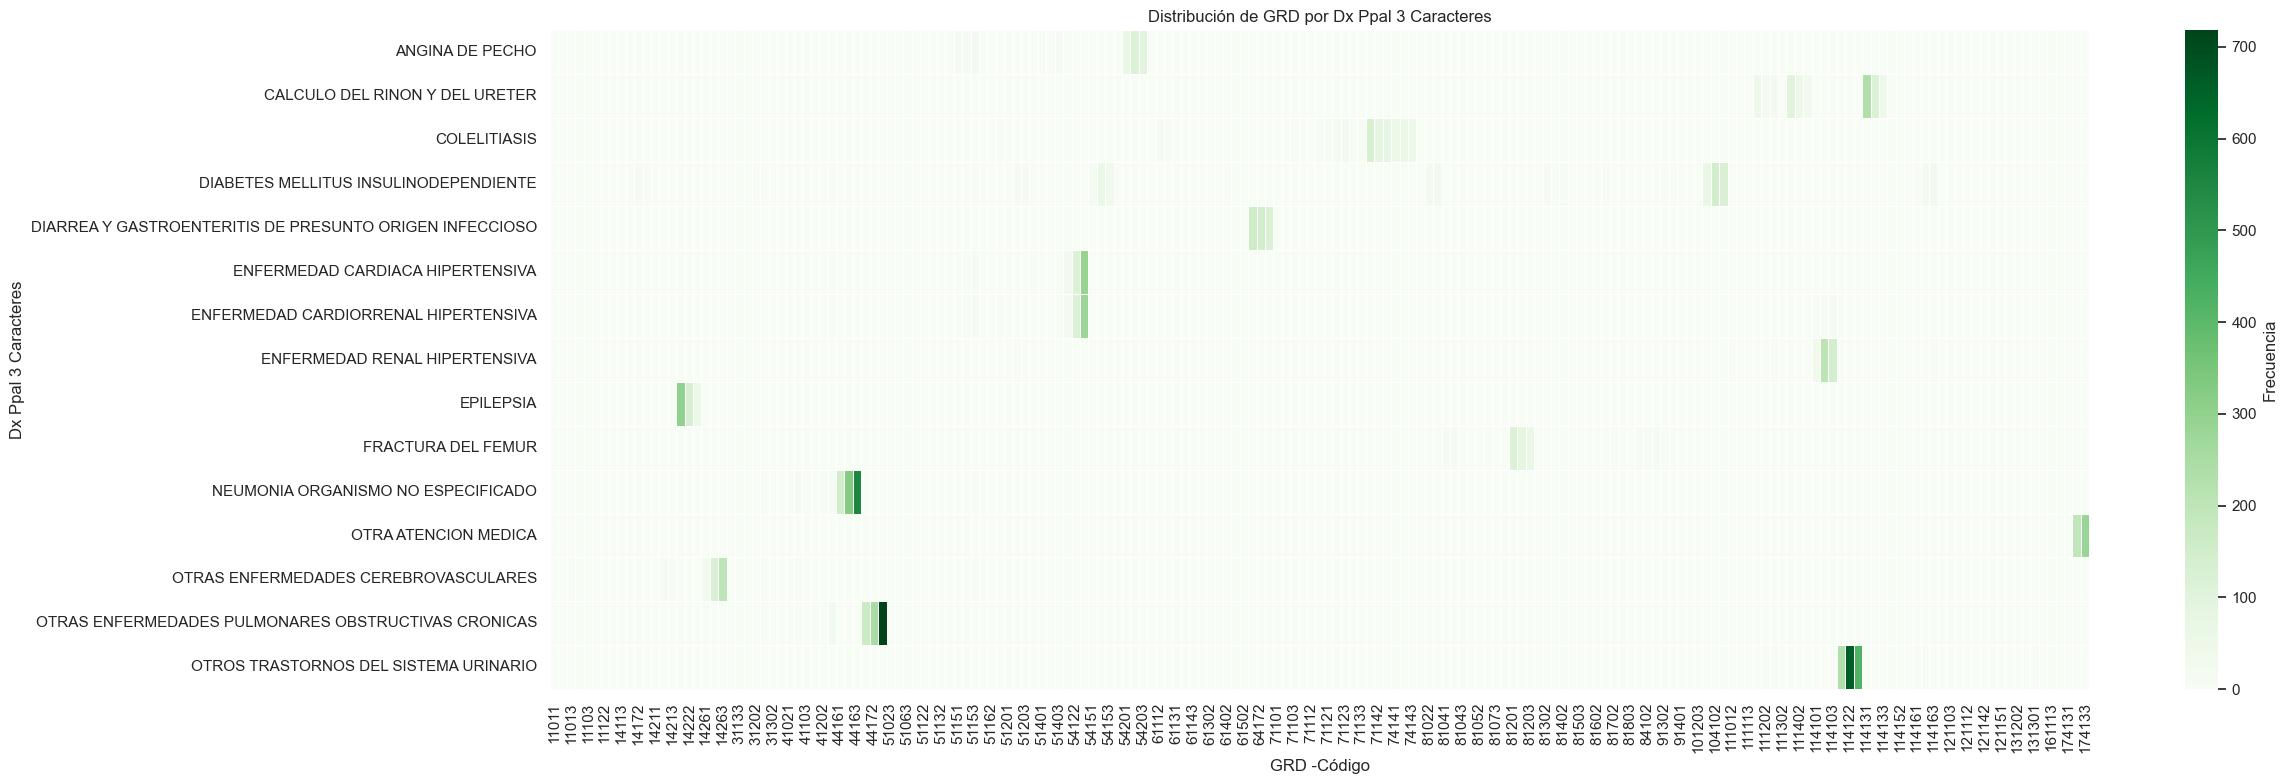


Chi² = 118851.77, p-value = 0.0000
→ Asociación significativa.


In [16]:
# Normalizar texto
df['Dx Ppal 3 Caracteres'] = df['Dx Ppal 3 Caracteres'].astype(str).str.strip().str.upper()

# Únicos y nulos
print(f"Únicos: {df['Dx Ppal 3 Caracteres'].nunique()}")
print(f"Nulos: {df['Dx Ppal 3 Caracteres'].isnull().sum()}")

# Frecuencias
print(df['Dx Ppal 3 Caracteres'].value_counts().head(10))

# Crosstab (top 15 códigos)
top_3char = df['Dx Ppal 3 Caracteres'].value_counts().head(15).index
dx3_grd = pd.crosstab(df[df['Dx Ppal 3 Caracteres'].isin(top_3char)]['Dx Ppal 3 Caracteres'], df['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 8))
sns.heatmap(dx3_grd, cmap='Greens', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Dx Ppal 3 Caracteres")
plt.xlabel("GRD -Código")
plt.ylabel("Dx Ppal 3 Caracteres")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Chi²
chi2, p, dof, _ = chi2_contingency(dx3_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Asociación significativa.")
else:
    print("→ No se encontró asociación.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <h4 style="font-size: 12pt;"><strong>Variable Diagnostico de ingreso: </strong></h4>
    <p style="font-size: 12pt;">La variable "Diagnostico de ingreso" es un etiquetado relacionado a la visita anterior del paciente, frente a la visita actual estudiada, por ello, se debe descartar del módelo al estar poco relacionada sin tener la información previa identificada.</p>
    </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <h4 style="font-size: 12pt;"><strong>Variables Diagnósticos relacionados y/o comorbilidades de ingreso: </strong></h4>
    <p style="font-size: 12pt;">Las variables Dxr 1 a Dxr 10 contienen los diagnósticos relacionados o comorbilidades del paciente al ingreso. Se observan más de 27 mil registros con al menos un diagnóstico secundario, y su frecuencia decrece a medida que se avanza de Dxr 1 a Dxr 10. Las comorbilidades más comunes son entidades clínicas esperadas como hipertensión (I10), tabaquismo (Z720) o diabetes (E116). Se construyó una variable binaria Tiene_comorbilidad que identifica si el paciente tiene al menos una comorbilidad, y esta mostró una asociación estadísticamente significativa con el GRD. Adicionalmente, se generaron variables binarias específicas para las 20 comorbilidades más frecuentes, que también muestran patrones distintos de distribución entre los GRD. Por su relevancia clínica y su fuerte asociación con el desenlace, estas variables deben ser conservadas en el modelo, ya sea como una sola variable indicadora general o como un conjunto de indicadores para comorbilidades específicas, idealmente aquellas más frecuentes y relevantes.</p>
    </div>

Columnas de comorbilidades (sin DXR)

Cantidad de diagnósticos registrados en cada columna:
Dxr 1    27172
Dxr 2    24714
Dxr 3    21529
Dxr 4    17983
Dxr 5    14451
Dxr 6    11163
Dxr 7     8161
Dxr 8     5610
Dxr 9     3435
dtype: int64

Top 35 comorbilidades más frecuentes (con al menos el 10% de la más frecuente):
I10     7463
Z720    3315
E038    2759
I270    2728
I120    2115
E106    2080
D648    2009
E116    1827
J448    1792
E876    1660
N390    1615
D728    1562
G448    1537
I48     1504
R104    1499
E755    1488
I110    1278
E788    1220
J441    1208
J90     1153
B962    1116
E668    1096
I251    1034
I081    1034
D508     936
J980     895
I083     838
K296     811
E871     809
E878     807
N40      792
I132     768
R509     753
F058     741
J960     727
Name: count, dtype: int64


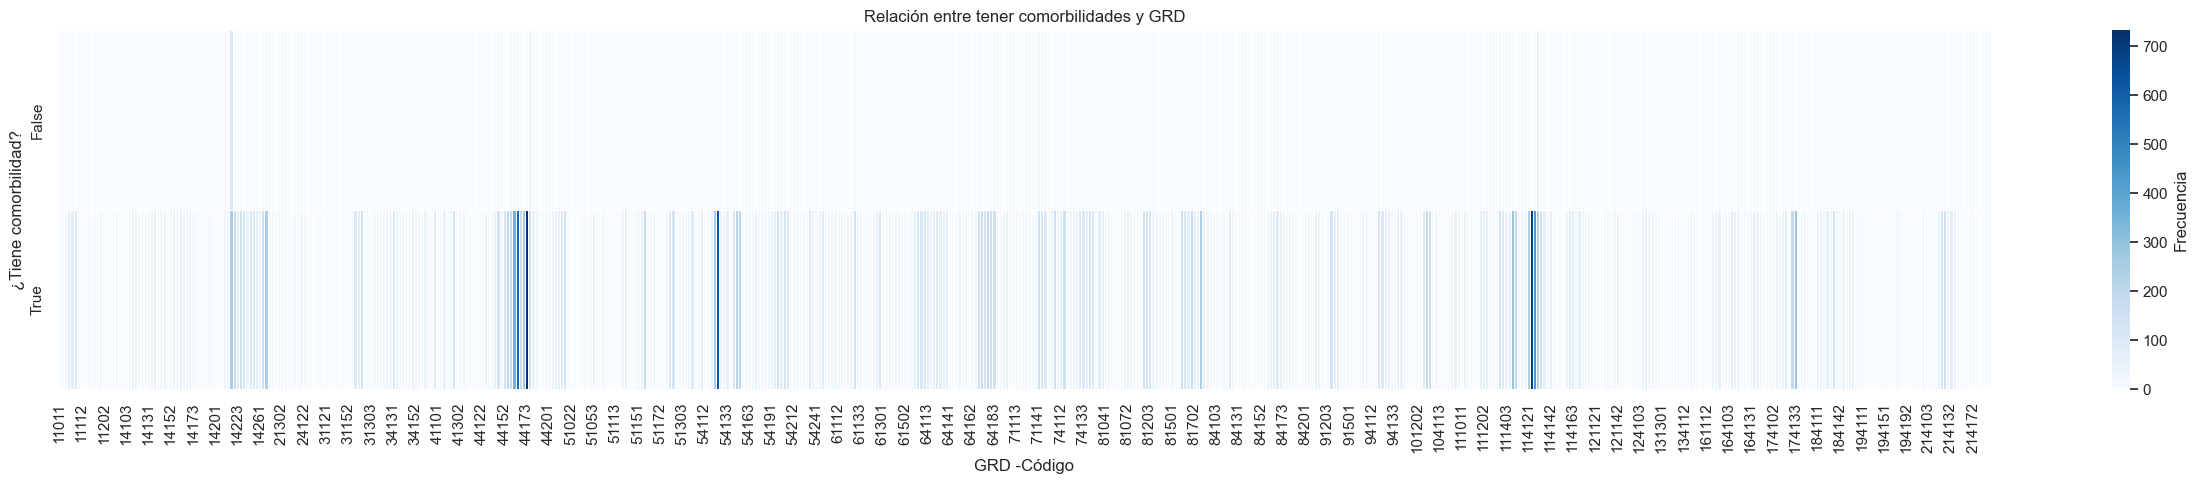


Chi² = 4269.45, p-value = 0.0000
→ Hay una asociación significativa entre tener comorbilidades y el GRD.


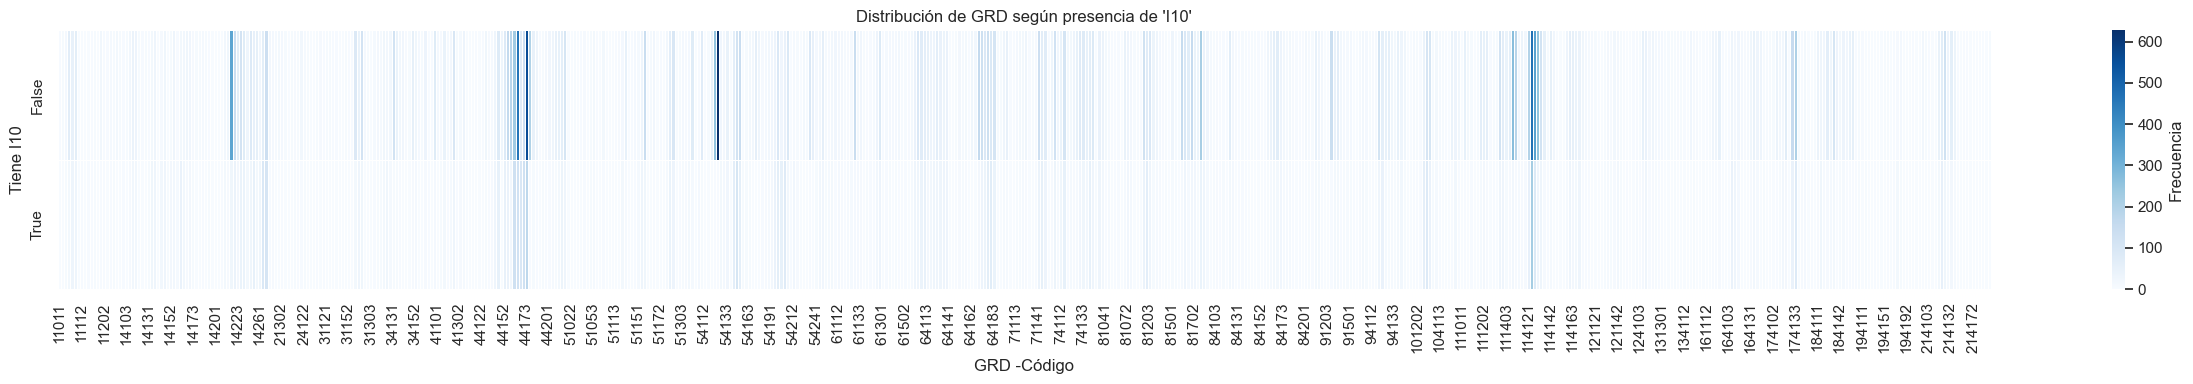

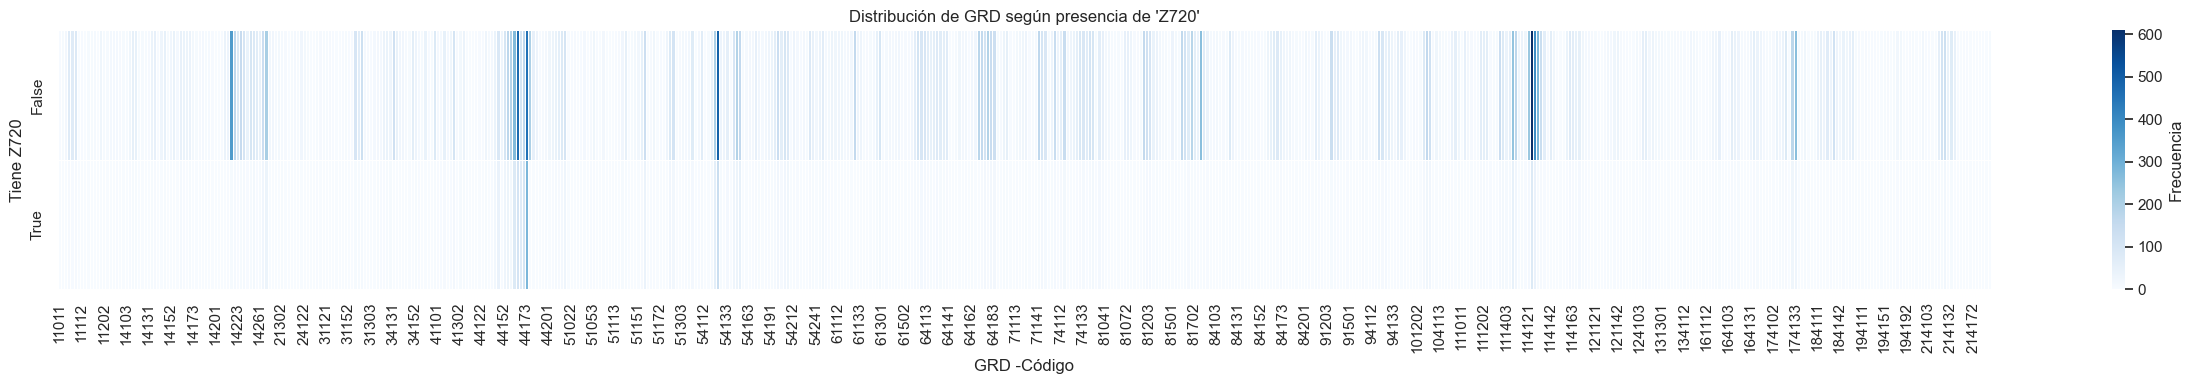

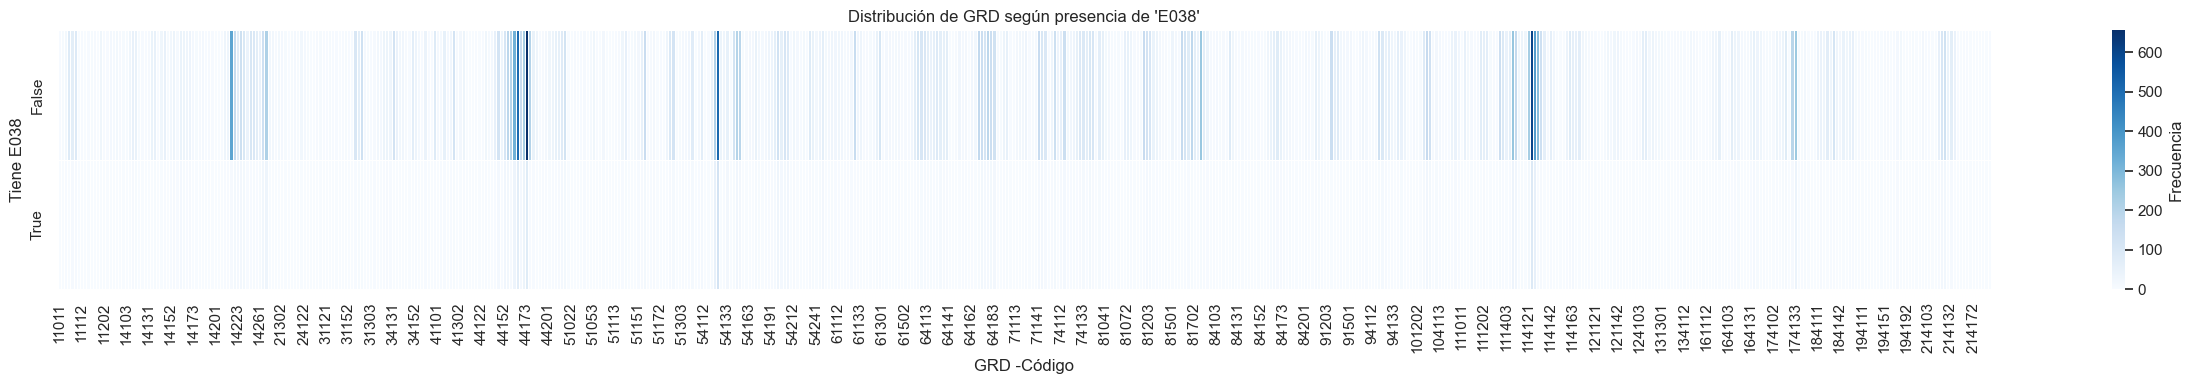

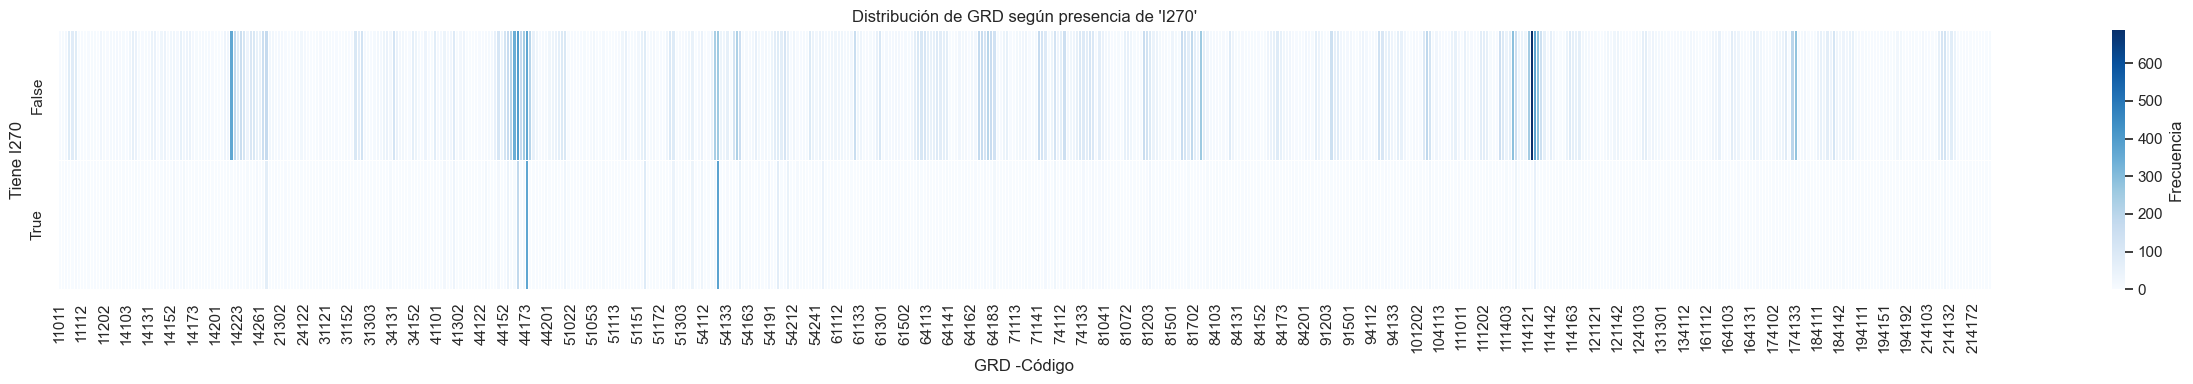

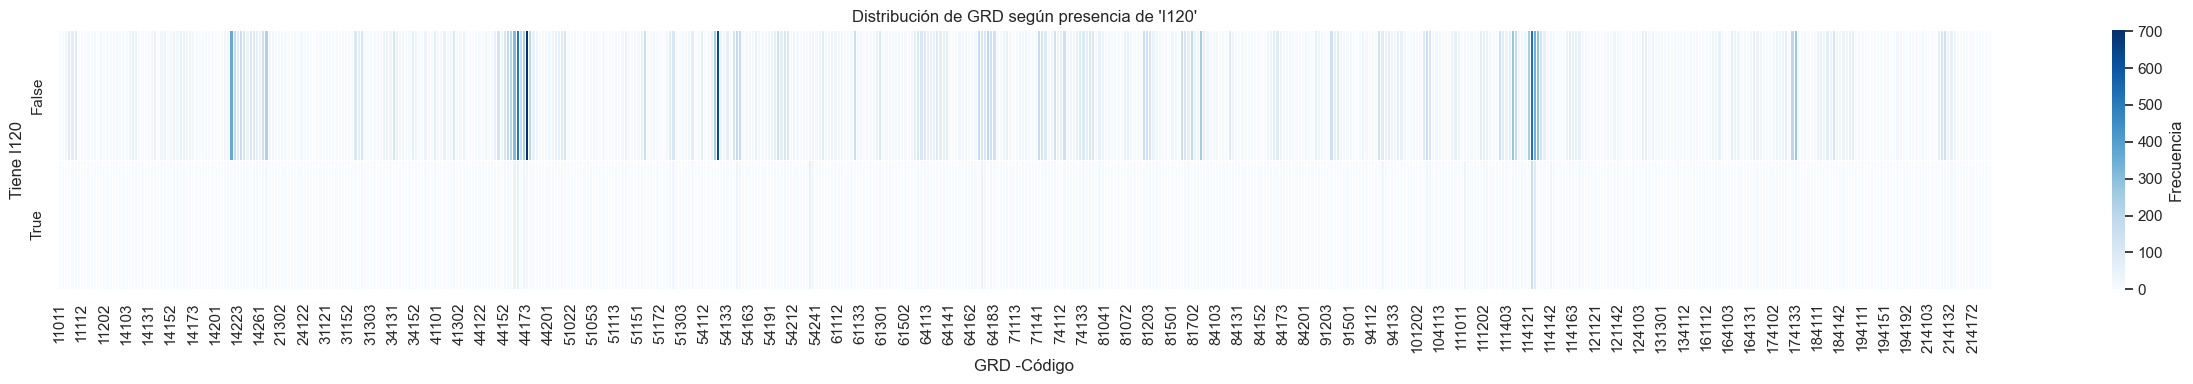

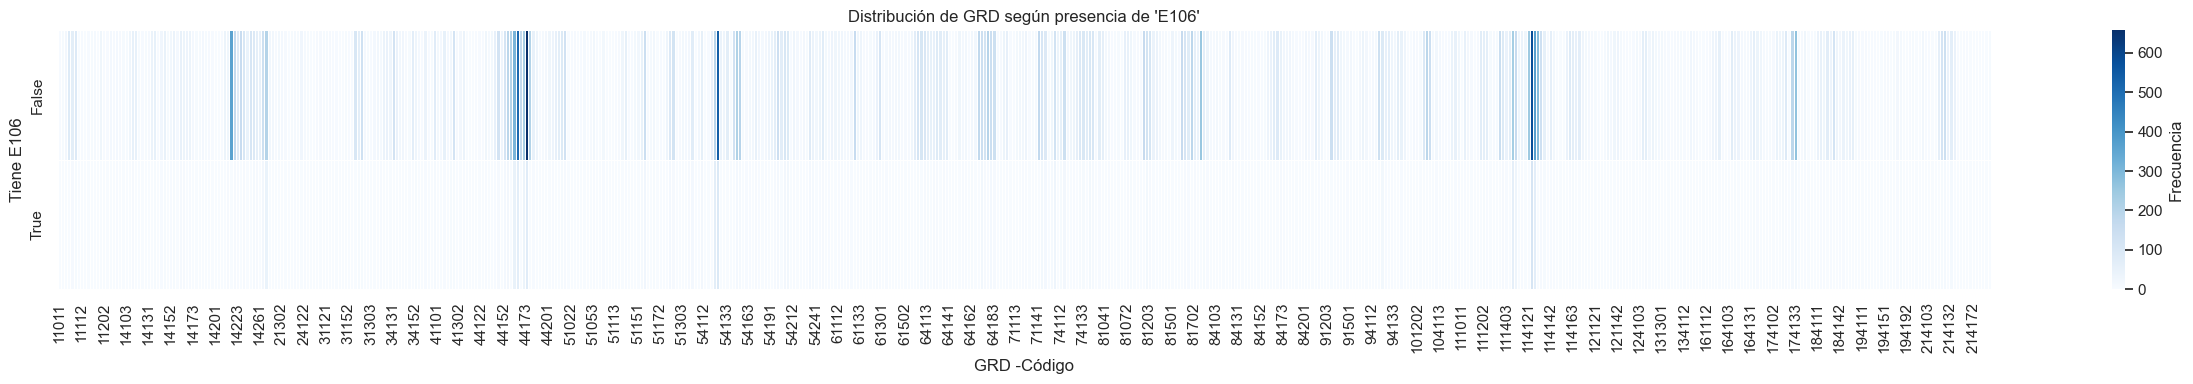

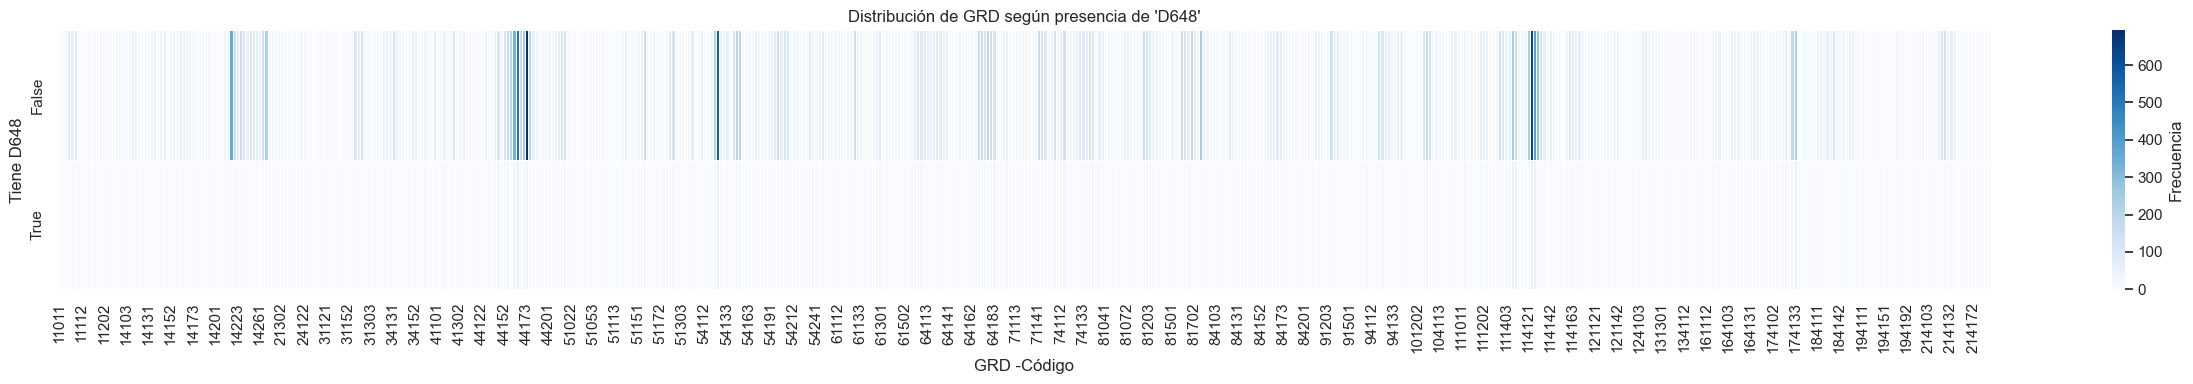

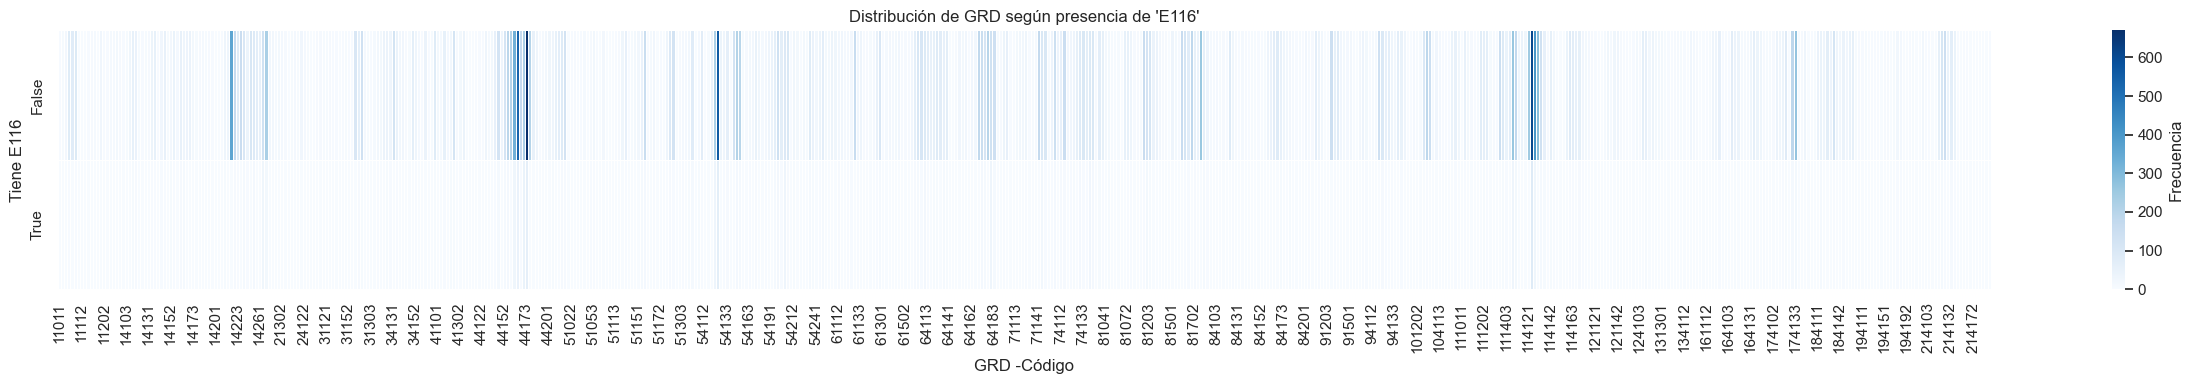

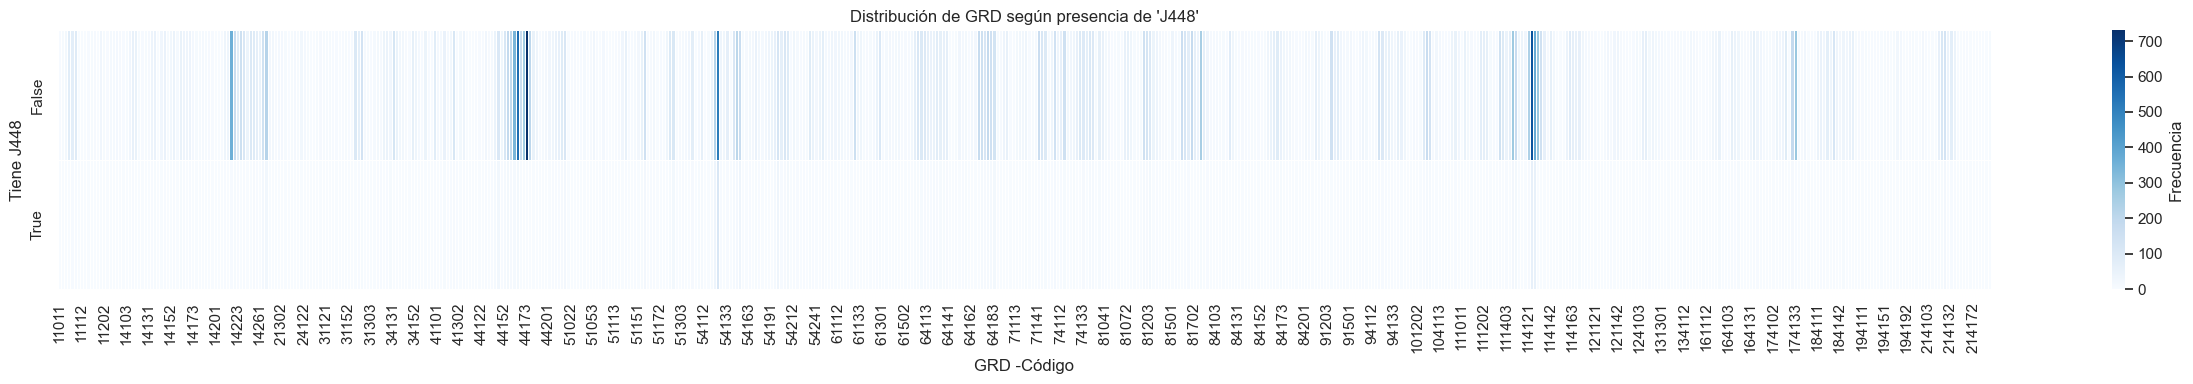

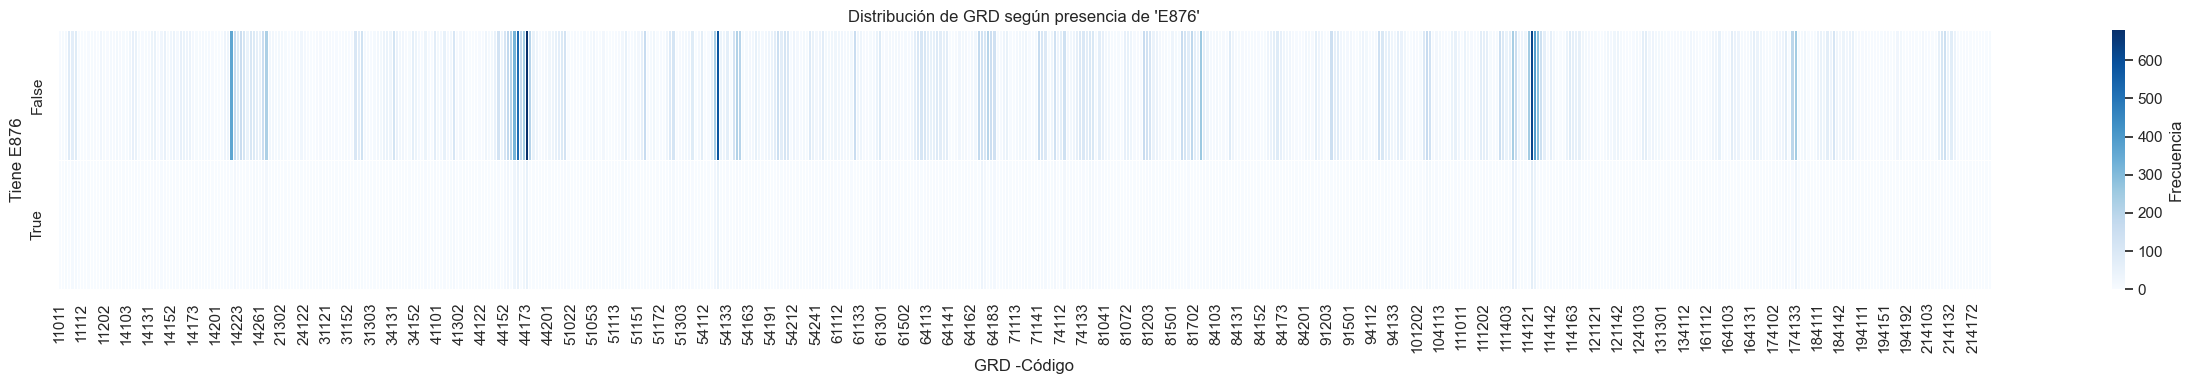

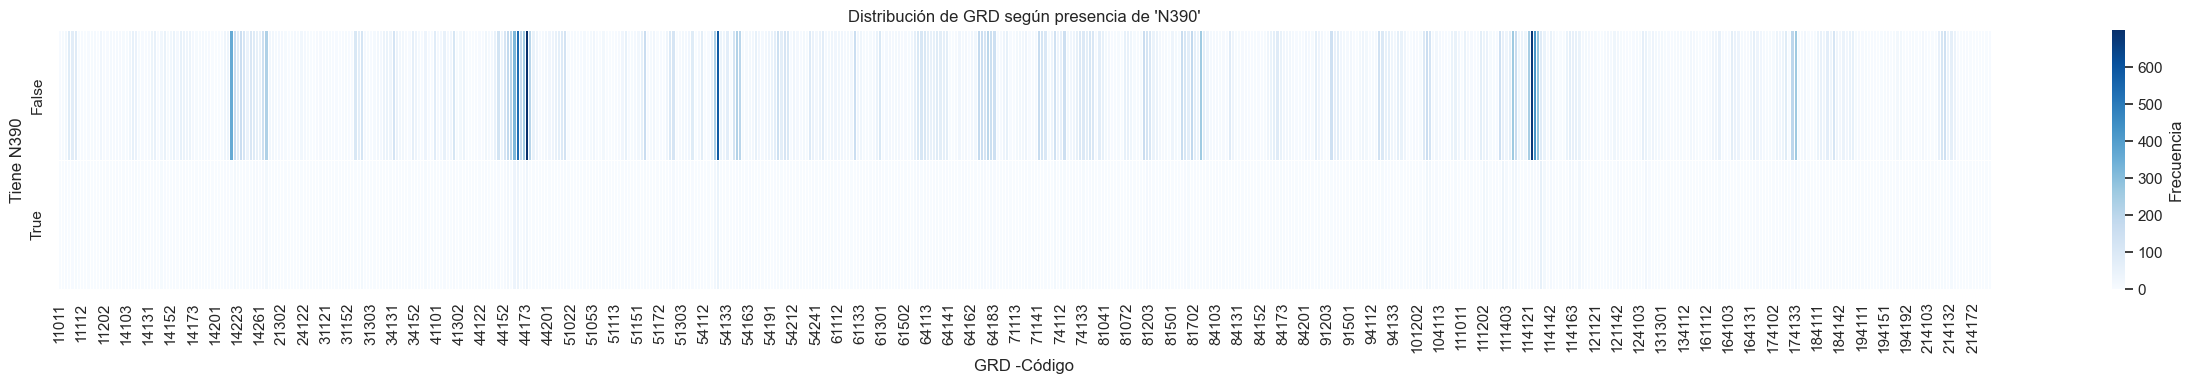

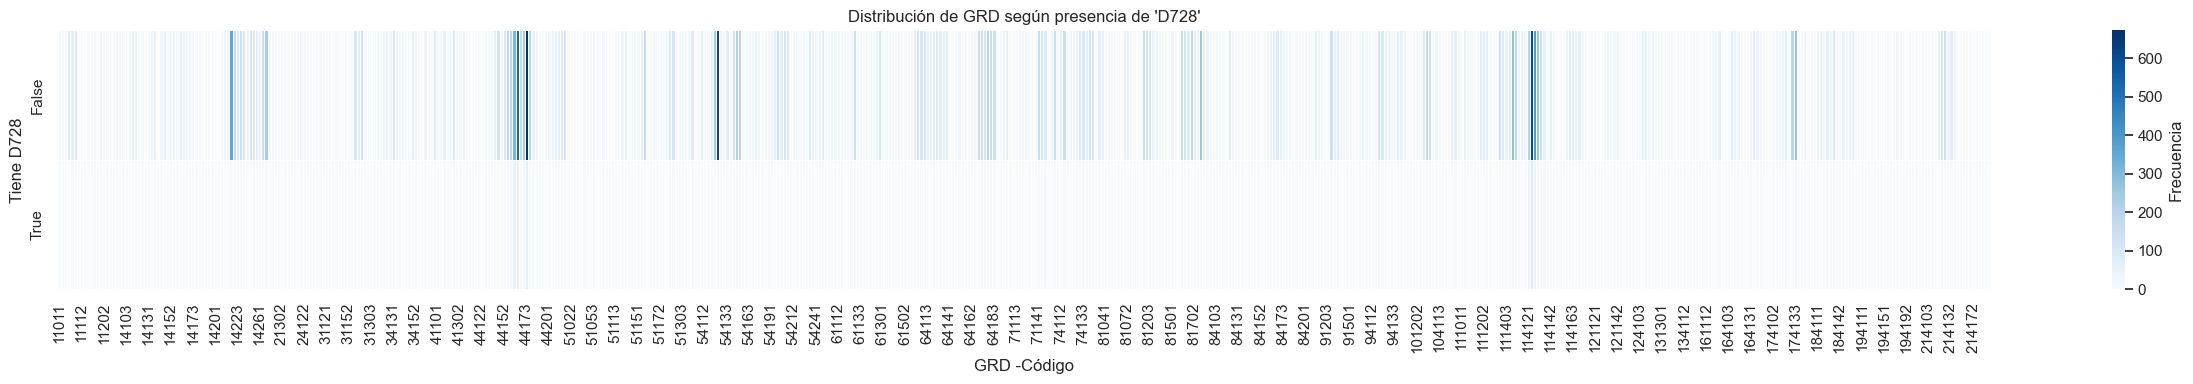

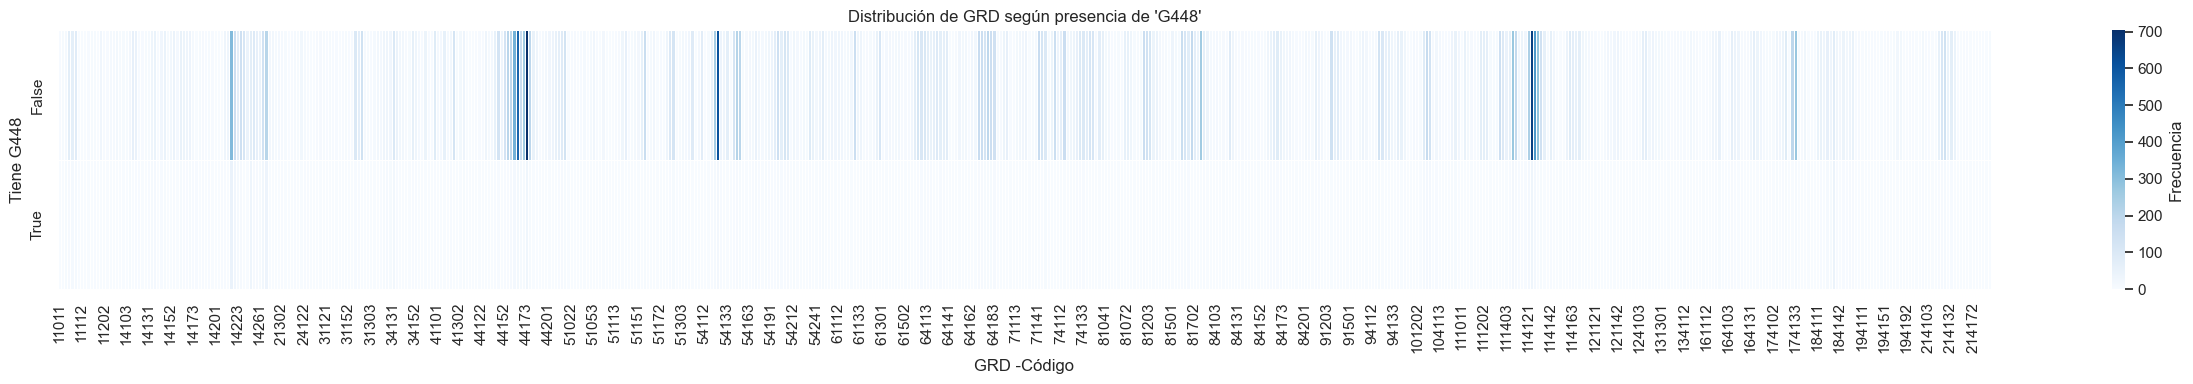

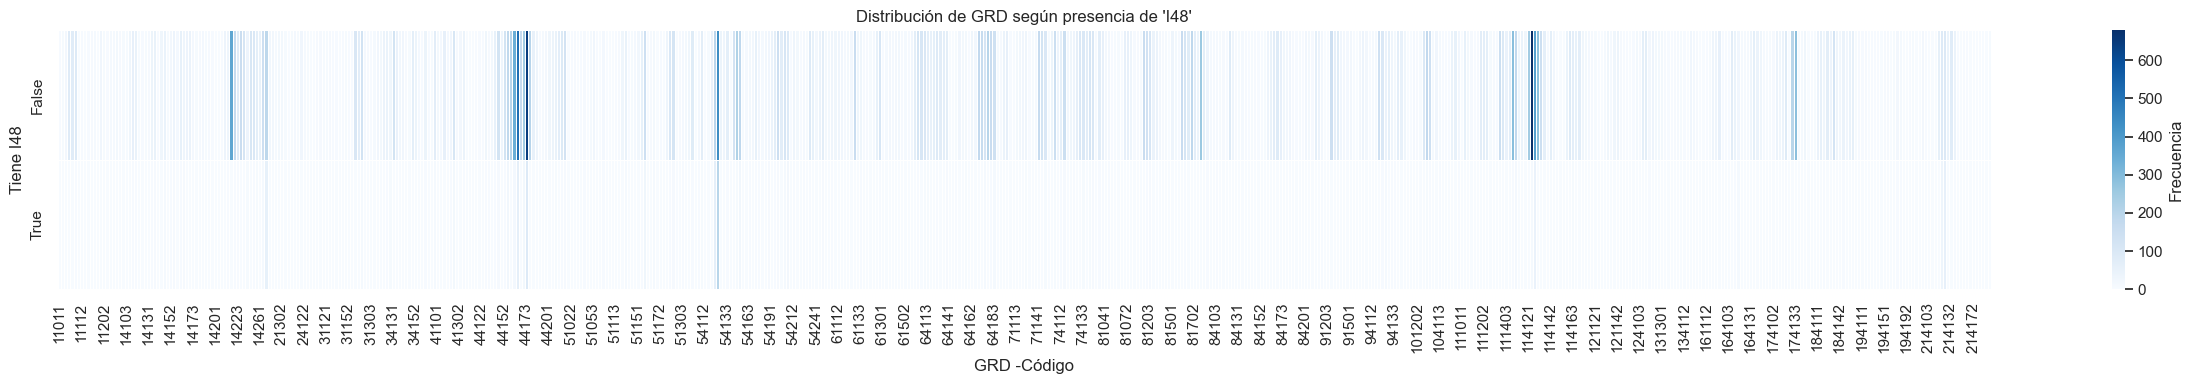

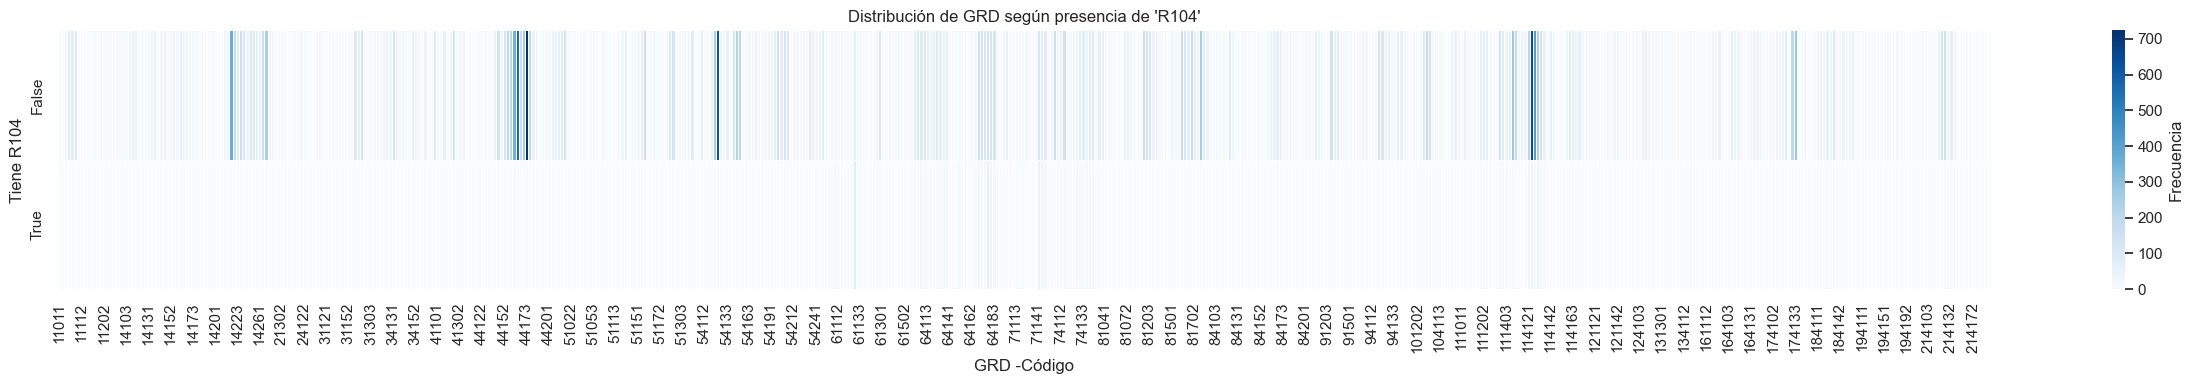

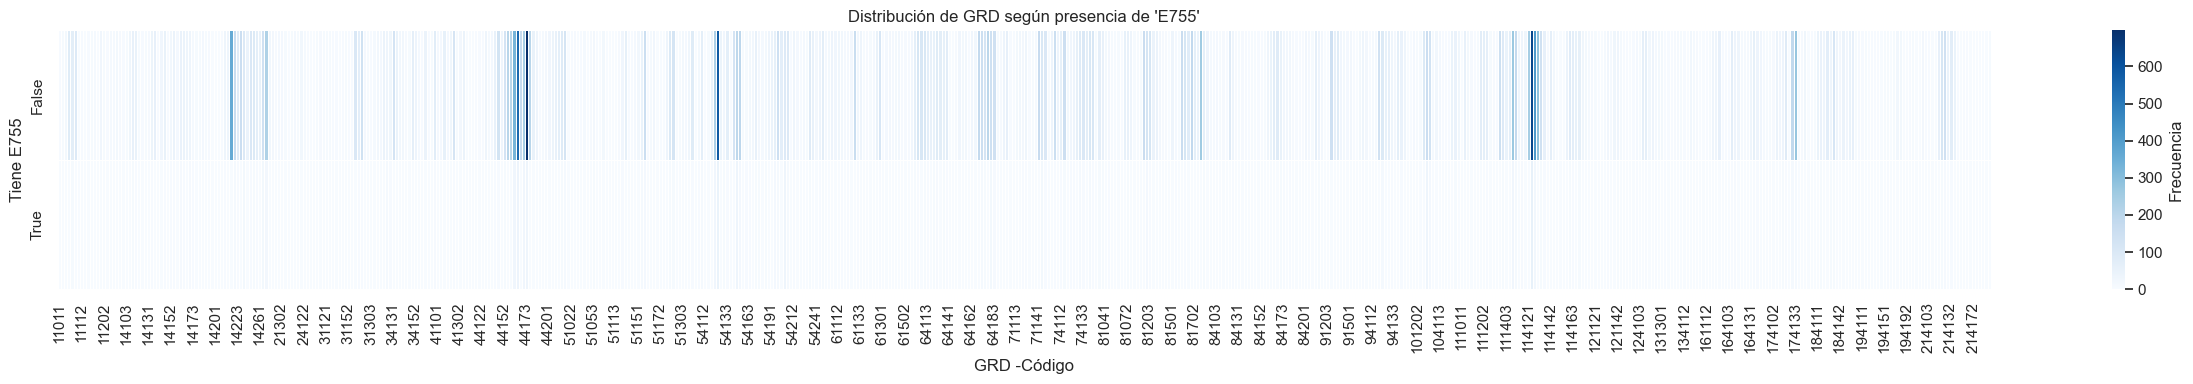

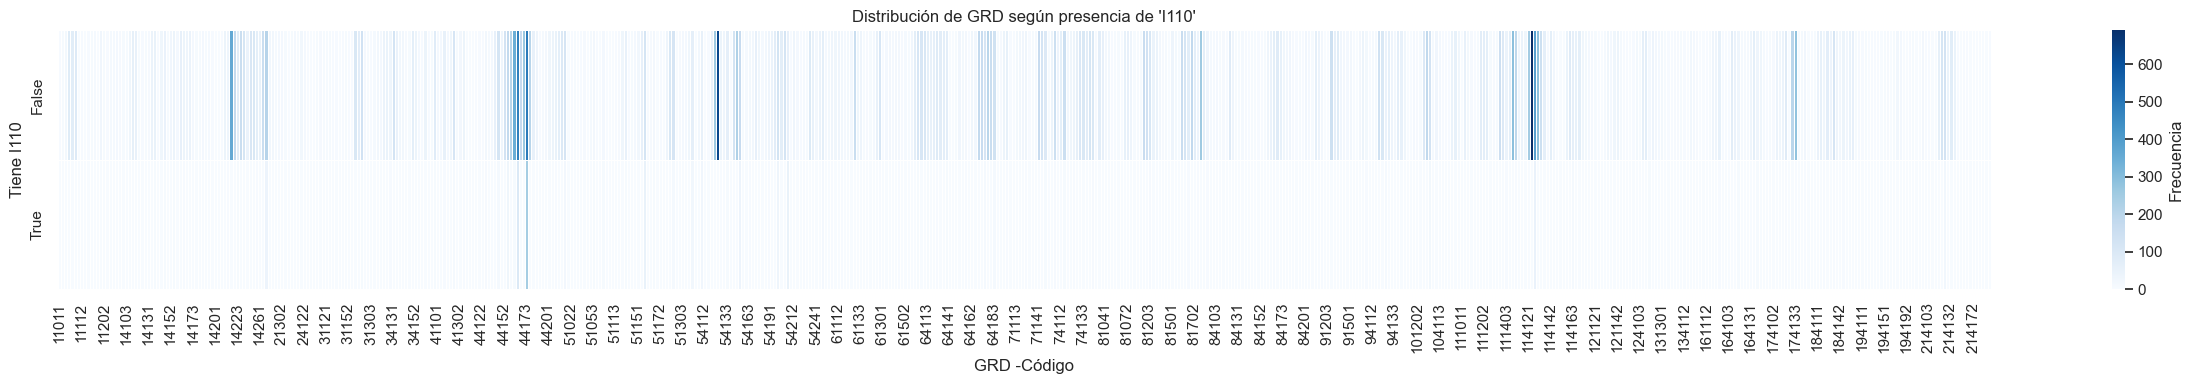

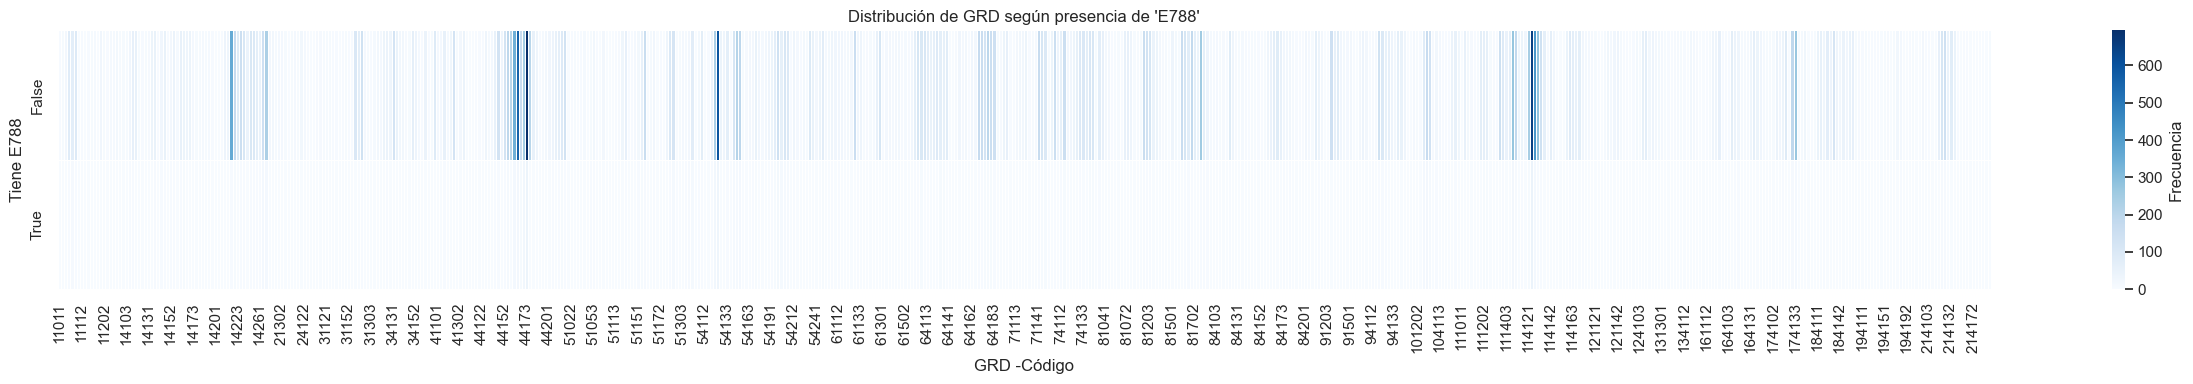

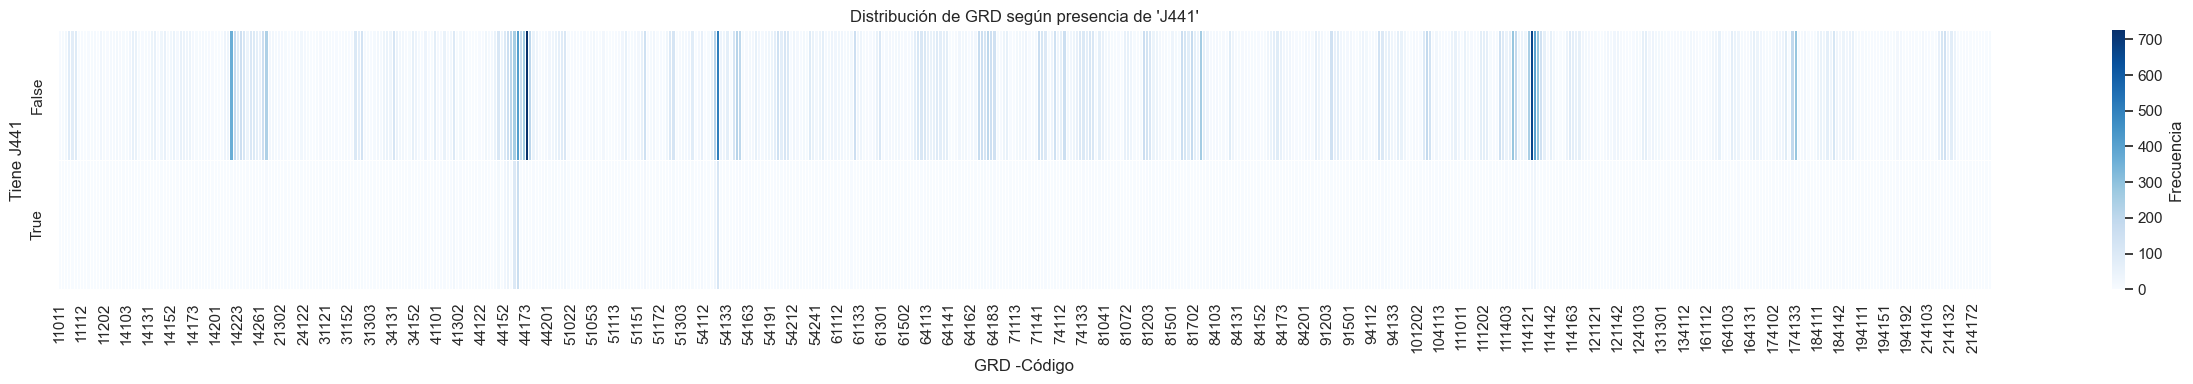

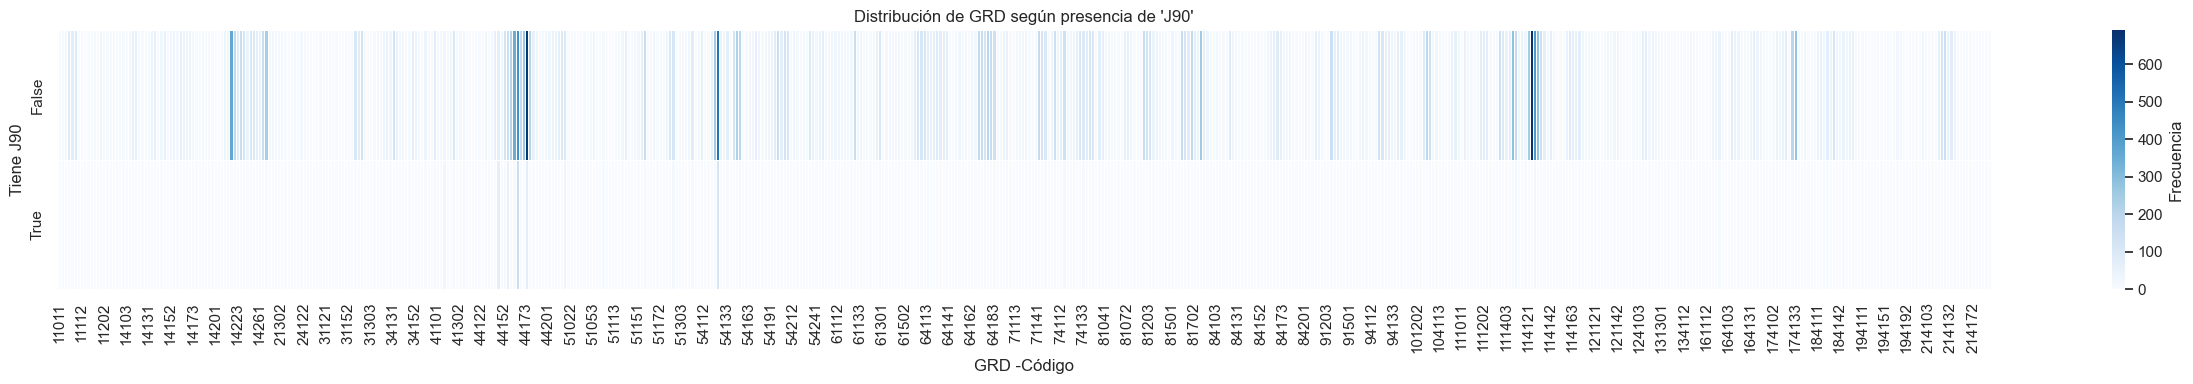

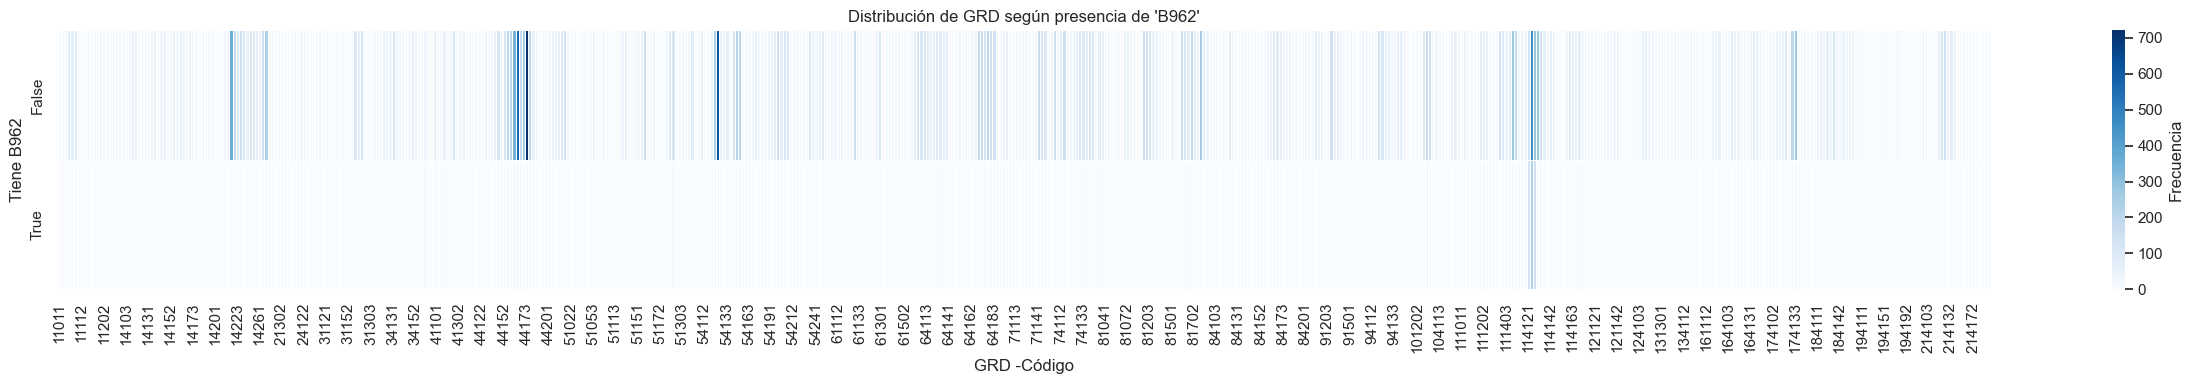

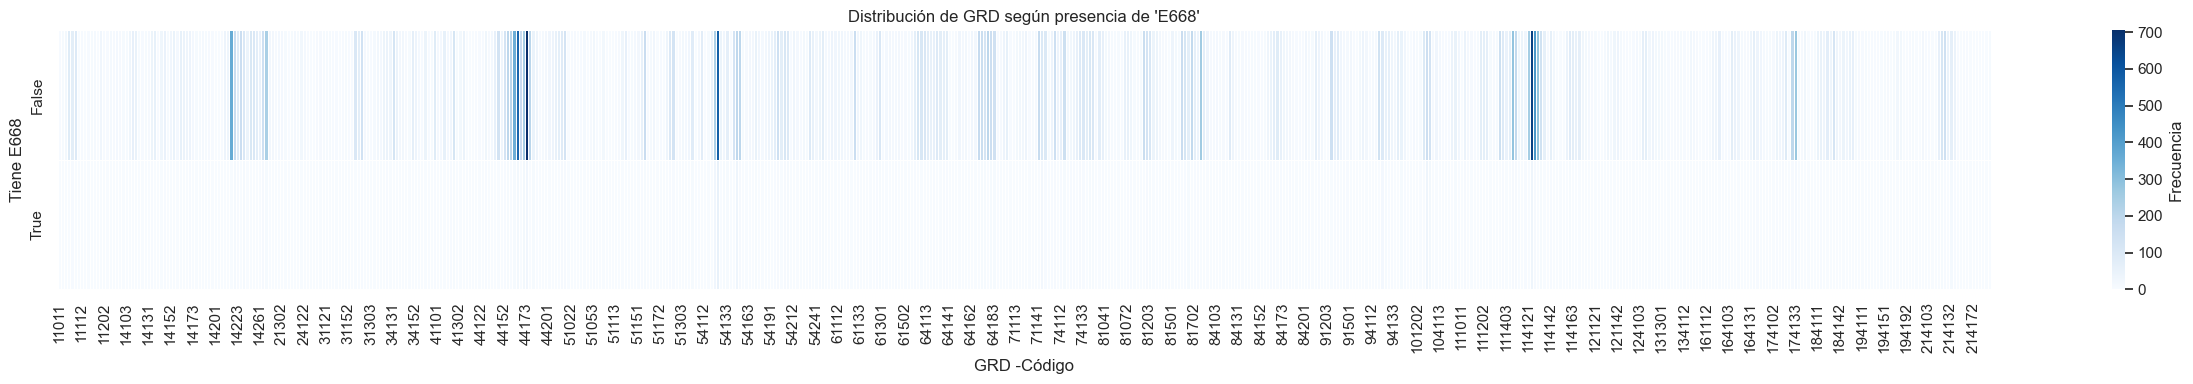

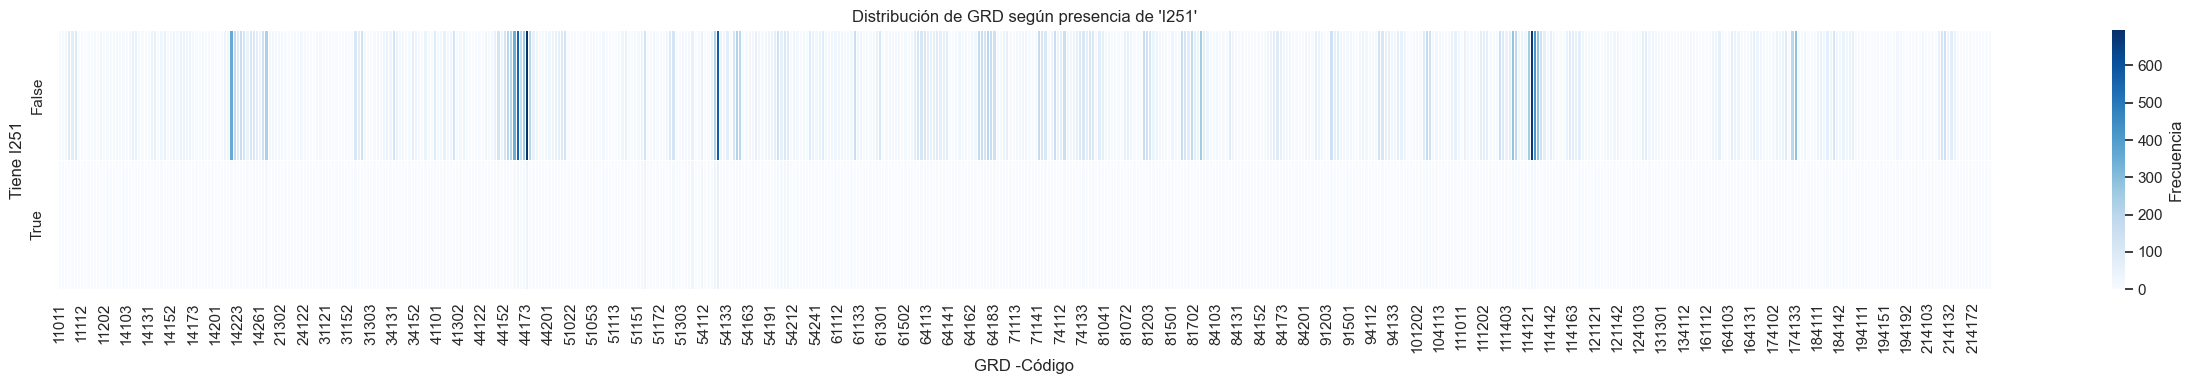

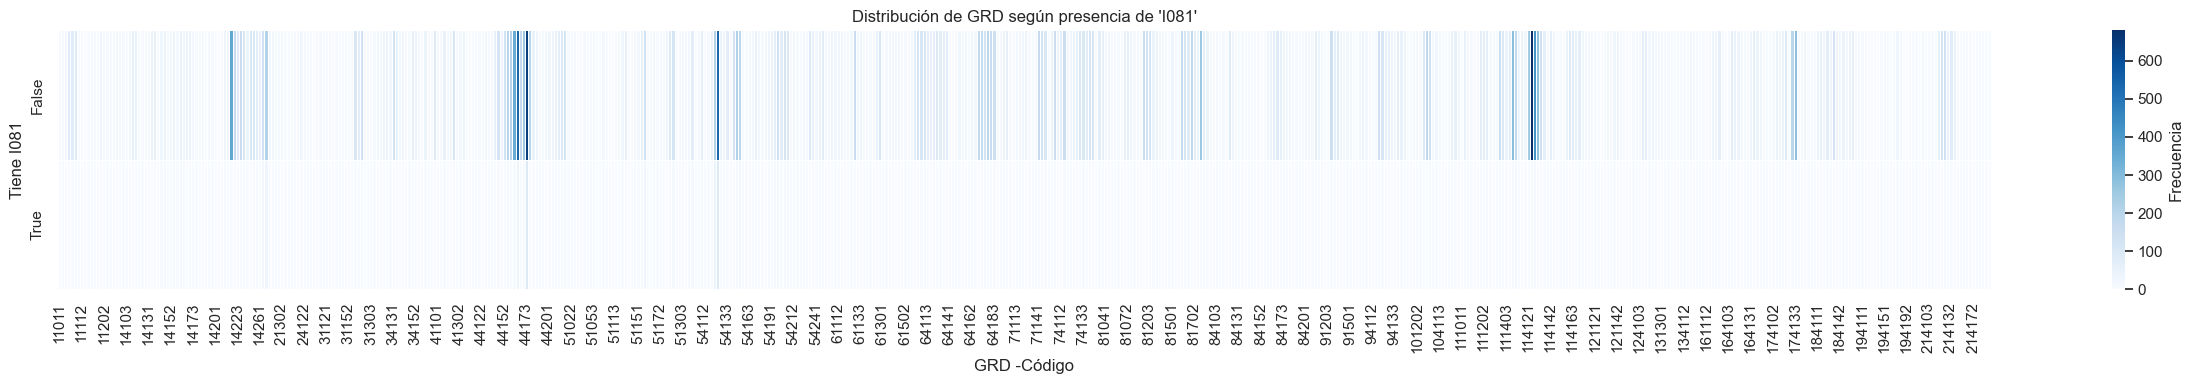

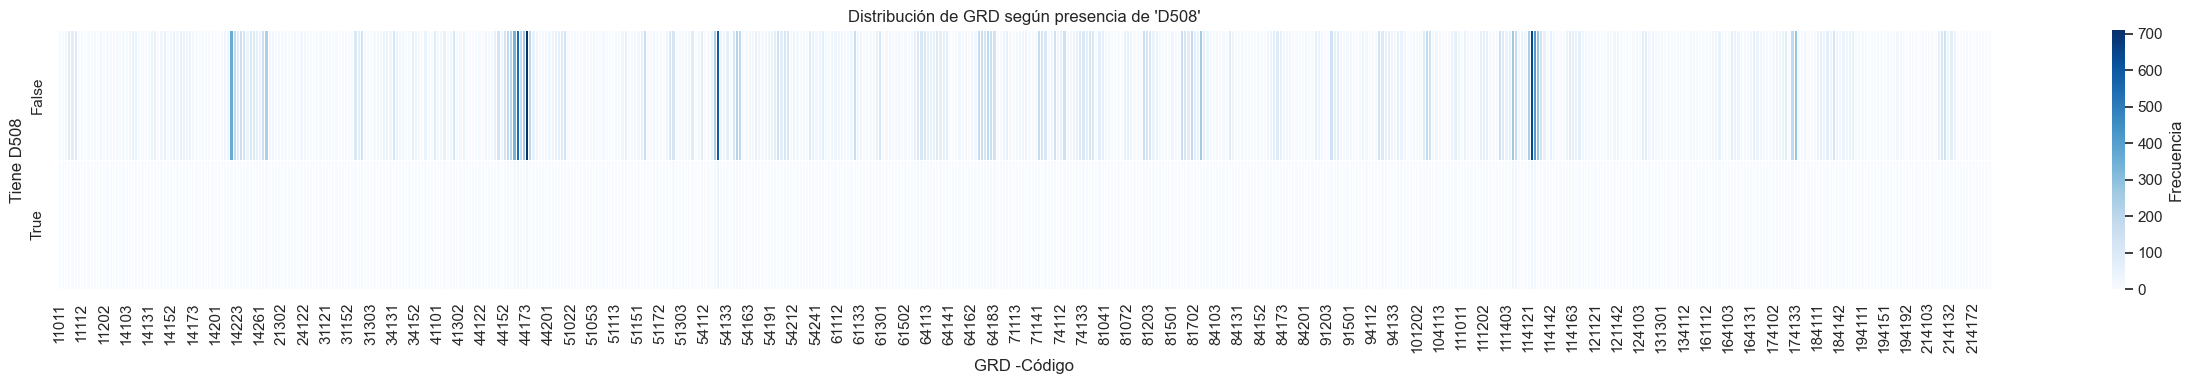

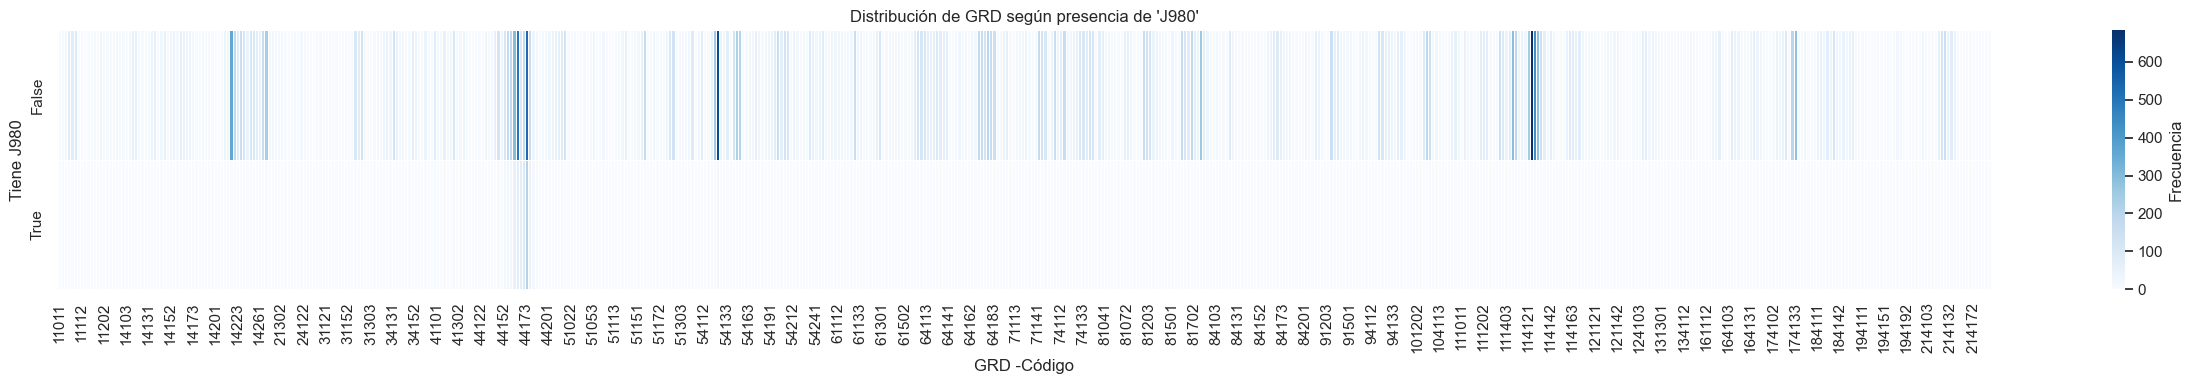

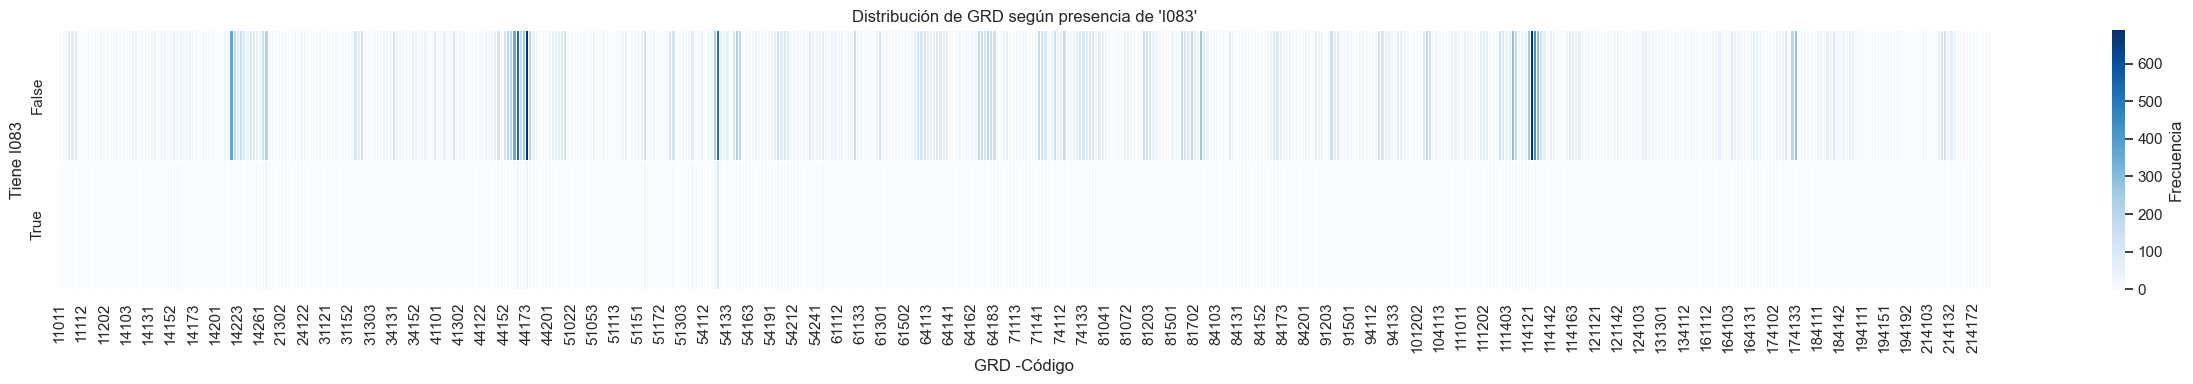

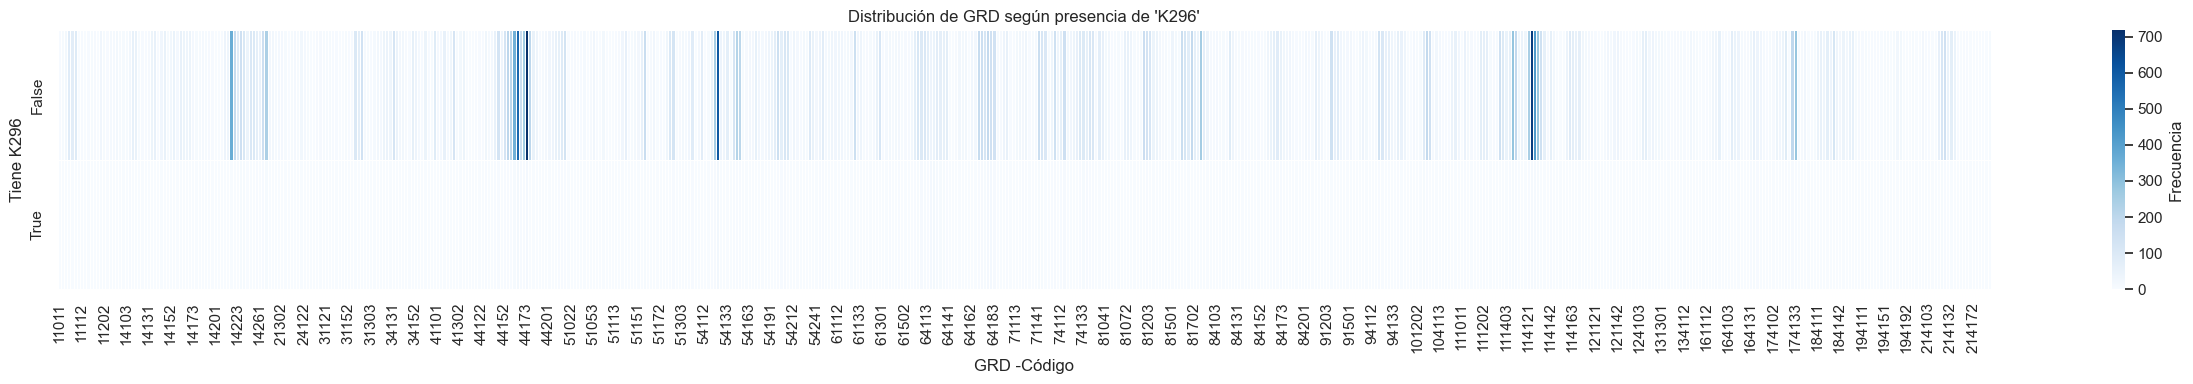

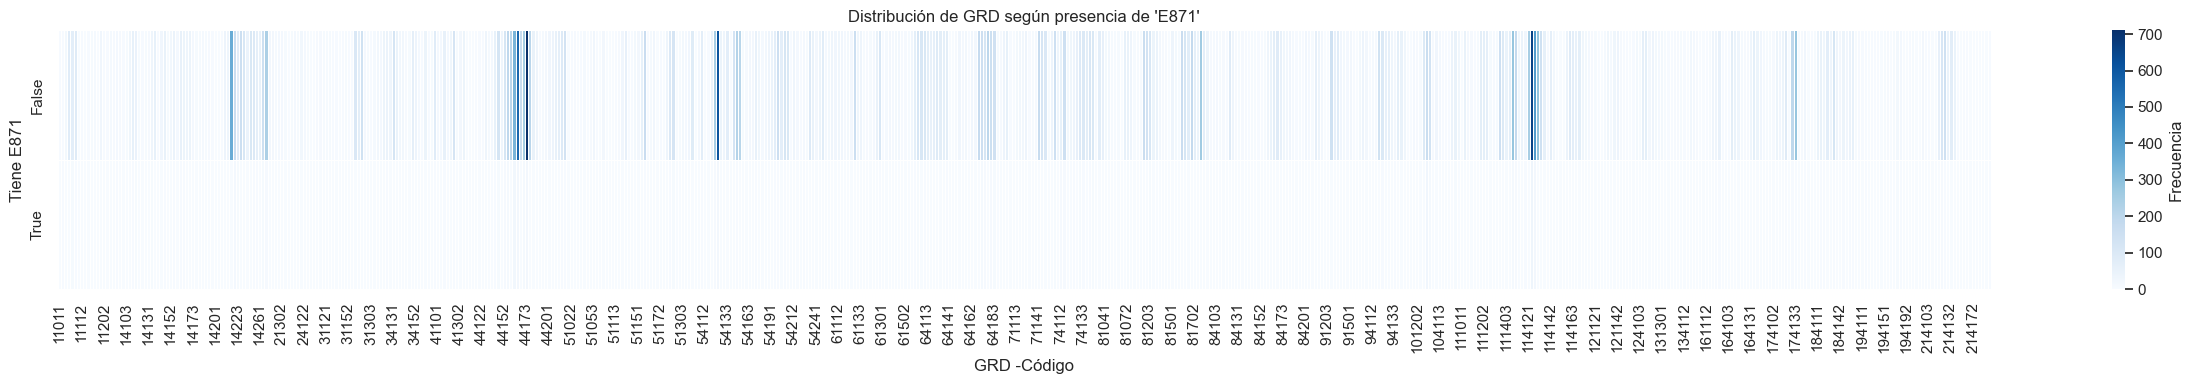

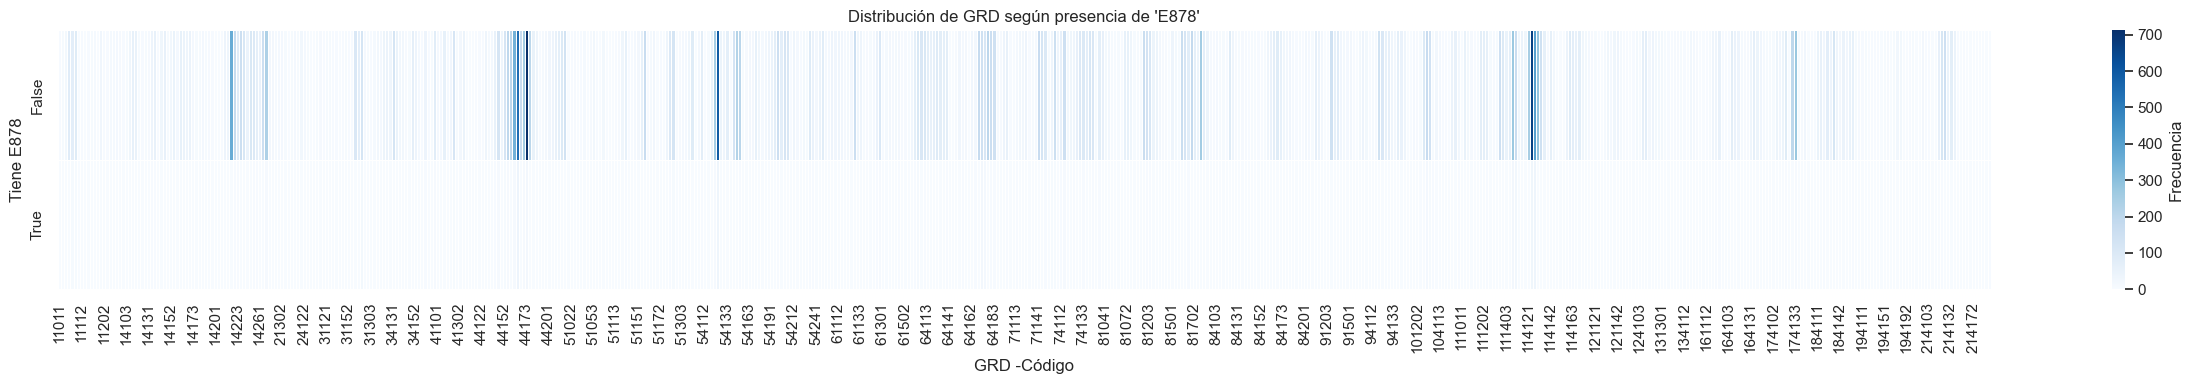

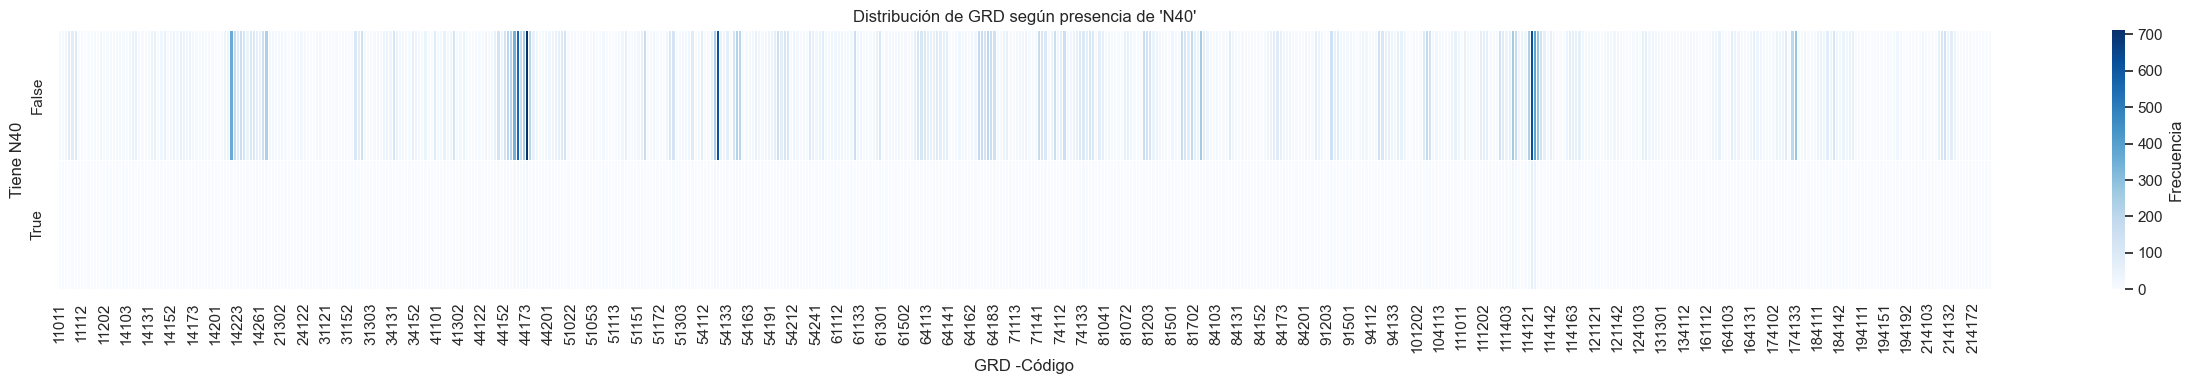

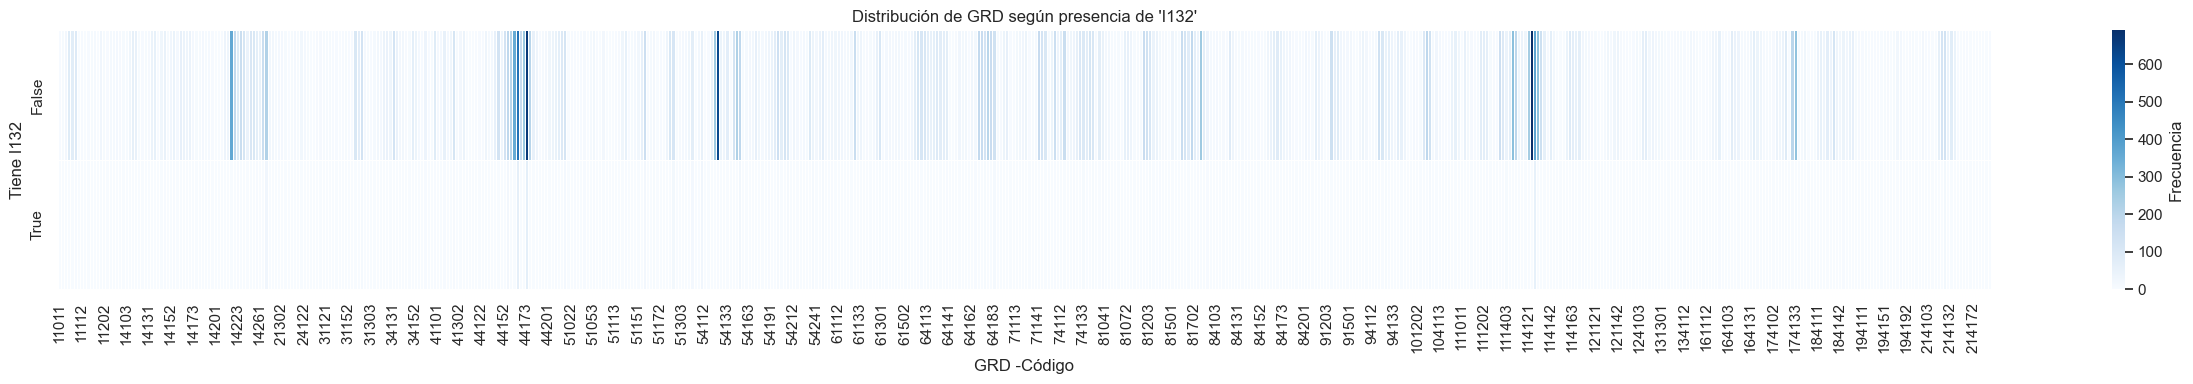

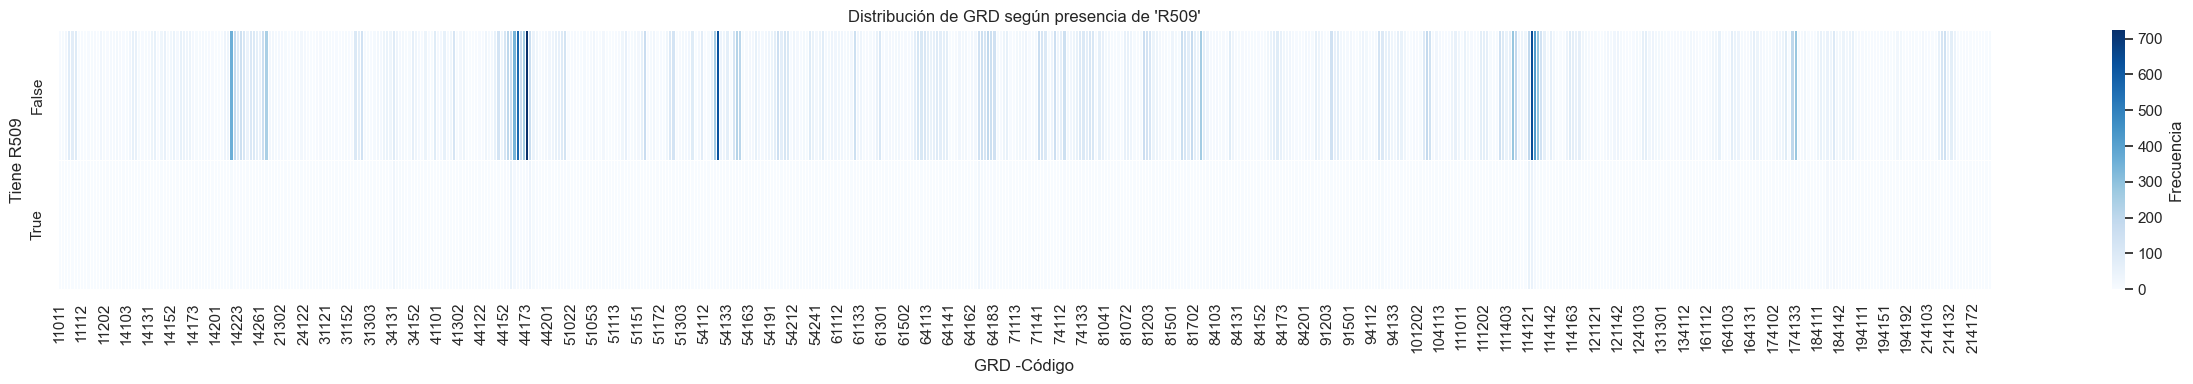

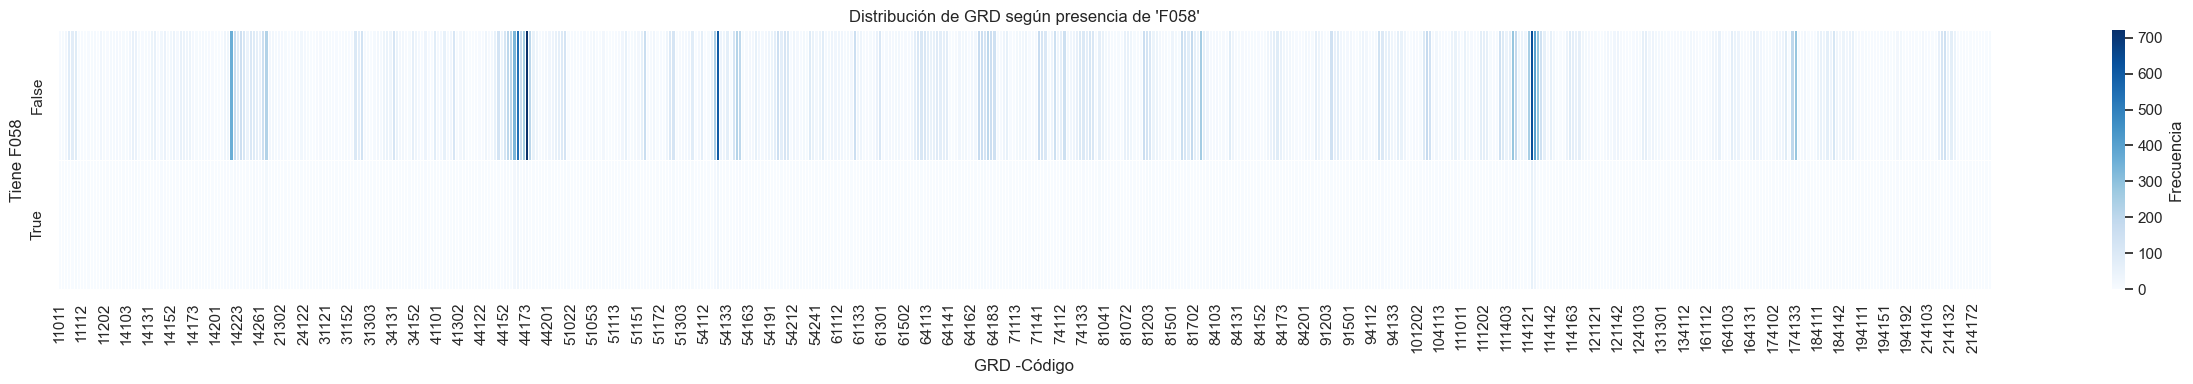

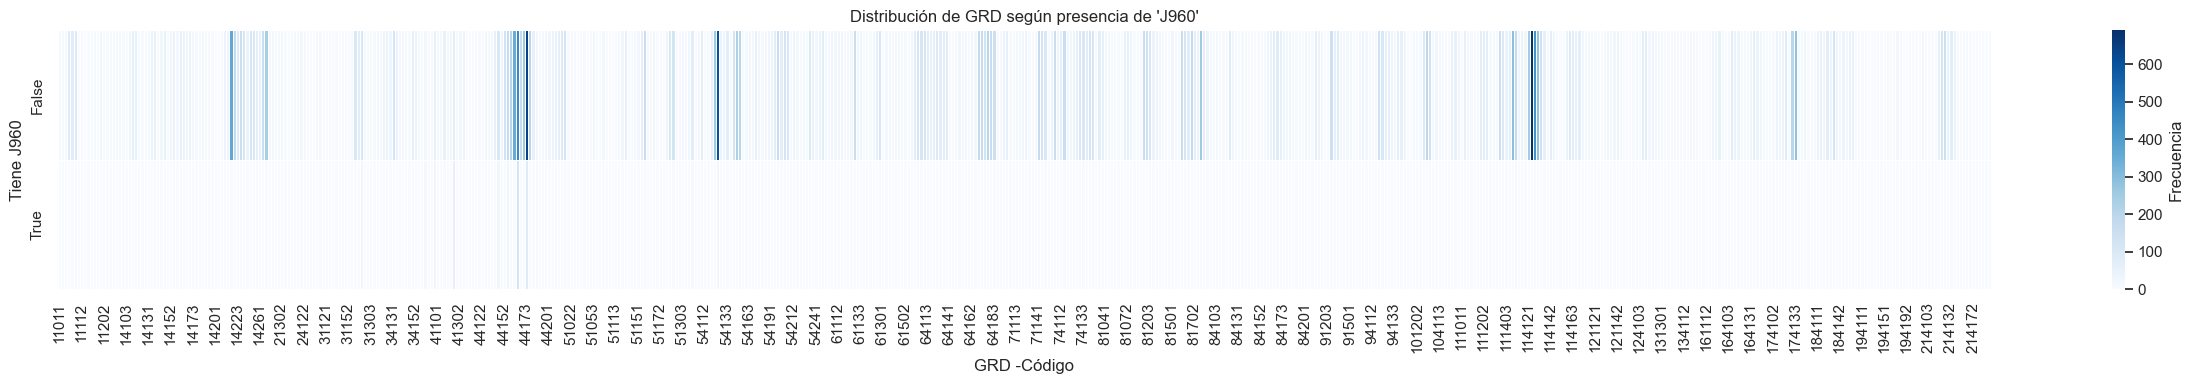

In [17]:
# Identificar columnas de comorbilidades (Dxr 1 a Dxr 9, excluyendo Dxr 10)
# Identificar todas las columnas DXR excepto la número 10, porque solo hay un valor en ella
comorbilidades = [col for col in df.columns if col.strip().upper().replace('-', ' ').startswith('DXR') and not col.strip().upper().endswith('10')]
print("Columnas de comorbilidades (sin DXR)")
# Conteo de no nulos por columna
print("\nCantidad de diagnósticos registrados en cada columna:")
conteo_por_columna = df[comorbilidades].notnull().sum()
print(conteo_por_columna)

# Combinar todas las columnas en una sola serie y contar frecuencia total
comorb_series = pd.concat([df[col] for col in comorbilidades]).dropna()
conteo_total = comorb_series.value_counts()
print("\nTop 35 comorbilidades más frecuentes (con al menos el 10% de la más frecuente):")
print(conteo_total.head(35))

# Crear variable binaria: ¿el paciente tiene al menos una comorbilidad?
df['Tiene_comorbilidad'] = df[comorbilidades].notna().any(axis=1)

# Tabla cruzada: Tiene comorbilidad vs GRD
tabla_binaria = pd.crosstab(df['Tiene_comorbilidad'], df['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 5))
sns.heatmap(tabla_binaria, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Relación entre tener comorbilidades y GRD")
plt.xlabel("GRD -Código")
plt.ylabel("¿Tiene comorbilidad?")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Prueba de Chi²
chi2, p, dof, _ = chi2_contingency(tabla_binaria)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación significativa entre tener comorbilidades y el GRD.")
else:
    print("→ No se encontró una asociación significativa.")

# Análisis individual: crear variables binarias para las 35 comorbilidades más frecuentes
top_comorbs = conteo_total.head(35).index

for dx in top_comorbs:
    col_binaria = f"Tiene_{dx}"
    df[col_binaria] = df[comorbilidades].apply(lambda row: dx in row.values, axis=1)

    tabla_dx = pd.crosstab(df[col_binaria], df['GRD -Código'])

    plt.figure(figsize=(25, 4))
    sns.heatmap(tabla_dx, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
    plt.title(f"Distribución de GRD según presencia de '{dx}'")
    plt.xlabel("GRD -Código")
    plt.ylabel(f"Tiene {dx}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [18]:
print(df['Tiene_comorbilidad'].value_counts())

Tiene_comorbilidad
True     27172
False      697
Name: count, dtype: int64


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <h4 style="font-size: 12pt;"><strong>Variable Código causa externa y Causa externa: </strong></h4>
    <p style="font-size: 12pt;">La variable "Código causa externa" indica si el diagnóstico del paciente se asocia a un evento externo, y "Causa externa" proporciona su descripción. Más del 65% de los registros no tienen valores en esta variable, lo cual limita su utilidad como predictor generalizable. Sin embargo, en los casos donde sí se registra, se observan patrones repetitivos: códigos como Y838 (procedimientos quirúrgicos) o W180 (caídas) son los más frecuentes. El análisis gráfico y estadístico muestra una asociación significativa con el GRD, aunque su relevancia está sesgada hacia un subconjunto de casos donde el evento externo fue explícitamente documentado. Además, la relación entre código y descripción presenta inconsistencias (un mismo código puede tener varias descripciones, lo que sugiere mala normalización). Por lo tanto, aunque estadísticamente significativa, esta variable podría introducir ruido por su alta proporción de ausencias e inconsistencias en la codificación.</p>
    </div>

Valores únicos (Código): 572
Valores únicos (Descripción): 635
Valores nulos (Código): 22397
Valores nulos (Descripción): 22397

Códigos de causa externa más comunes:
Código causa externa
Y838    502
W180    455
W188    286
Y95X    252
Y841    245
Name: count, dtype: int64

Descripciones de causa externa más comunes:
Causa externa
OTROS PROCEDIMIENTOS QUIRURGICOS                          480
OTRAS CAIDAS EN EL MISMO NIVEL VIVIENDA                   439
OTRAS CAIDAS EN EL MISMO NIVEL OTRO LUGAR ESPECIFICADO    283
DIALISIS RENAL                                            239
AFECCION NOSOCOMIAL                                       221
Name: count, dtype: int64


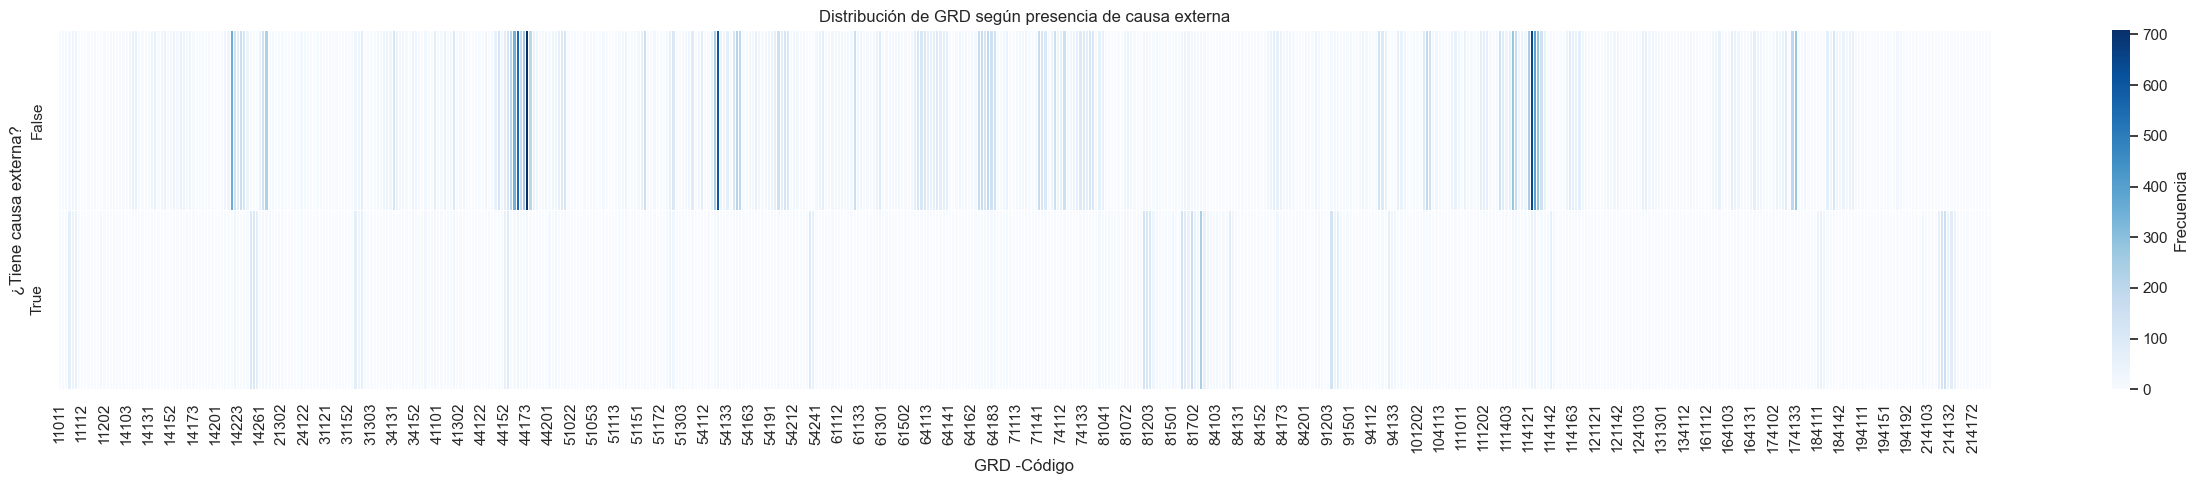


Chi² = 15589.76, p-value = 0.0000
→ Hay una asociación significativa entre tener causa externa y el GRD.


In [19]:
# Normalizar texto: convertir todo a mayúsculas para evitar inconsistencias
df['Causa externa'] = df['Causa externa'].str.upper()

# Verificar cantidad de valores únicos
print("Valores únicos (Código):", df['Código causa externa'].nunique())
print("Valores únicos (Descripción):", df['Causa externa'].nunique())

# Verificar valores nulos
print("Valores nulos (Código):", df['Código causa externa'].isnull().sum())
print("Valores nulos (Descripción):", df['Causa externa'].isnull().sum())

# Frecuencia de los más comunes
print("\nCódigos de causa externa más comunes:")
print(df['Código causa externa'].value_counts().head())

print("\nDescripciones de causa externa más comunes:")
print(df['Causa externa'].value_counts().head())

# Crear variable binaria: ¿tiene causa externa?
df['Tiene_causa_externa'] = df['Código causa externa'].notnull()

# Crosstab: presencia de causa externa vs GRD
tabla_causa = pd.crosstab(df['Tiene_causa_externa'], df['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 5))
sns.heatmap(tabla_causa, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD según presencia de causa externa")
plt.xlabel("GRD -Código")
plt.ylabel("¿Tiene causa externa?")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Prueba Chi²
chi2, p, dof, _ = chi2_contingency(tabla_causa)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación significativa entre tener causa externa y el GRD.")
else:
    print("→ No se encontró asociación significativa.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <h4 style="font-size: 12pt;"><strong>Variable Situación al alta: </strong></h4>
    <p style="font-size: 12pt;">
        La variable "Situación al alta" distingue entre pacientes que egresaron por mejoría clínica ("ALTA MÉDICA") y aquellos que fallecieron durante la estancia hospitalaria. No presenta valores nulos y muestra una distribución claramente desbalanceada (94.7% alta médica vs. 5.3% fallecidos). El análisis de chi-cuadrado revela una asociación estadísticamente significativa con el GRD (χ² = 3688.44, p &lt; 0.0001), lo que sugiere que el tipo de desenlace hospitalario varía según el grupo de diagnóstico relacionado. Dada su relevancia clínica y su fuerte asociación con el desenlace, esta variable debe ser conservada en el modelo, como categórica binaria.
    </p>
</div>


Valores únicos: ['FALLECIDO' 'ALTA MÉDICA']
Nulos: 0

Frecuencia:
Situacion al alta
ALTA MÉDICA    26373
FALLECIDO       1495
Name: count, dtype: int64


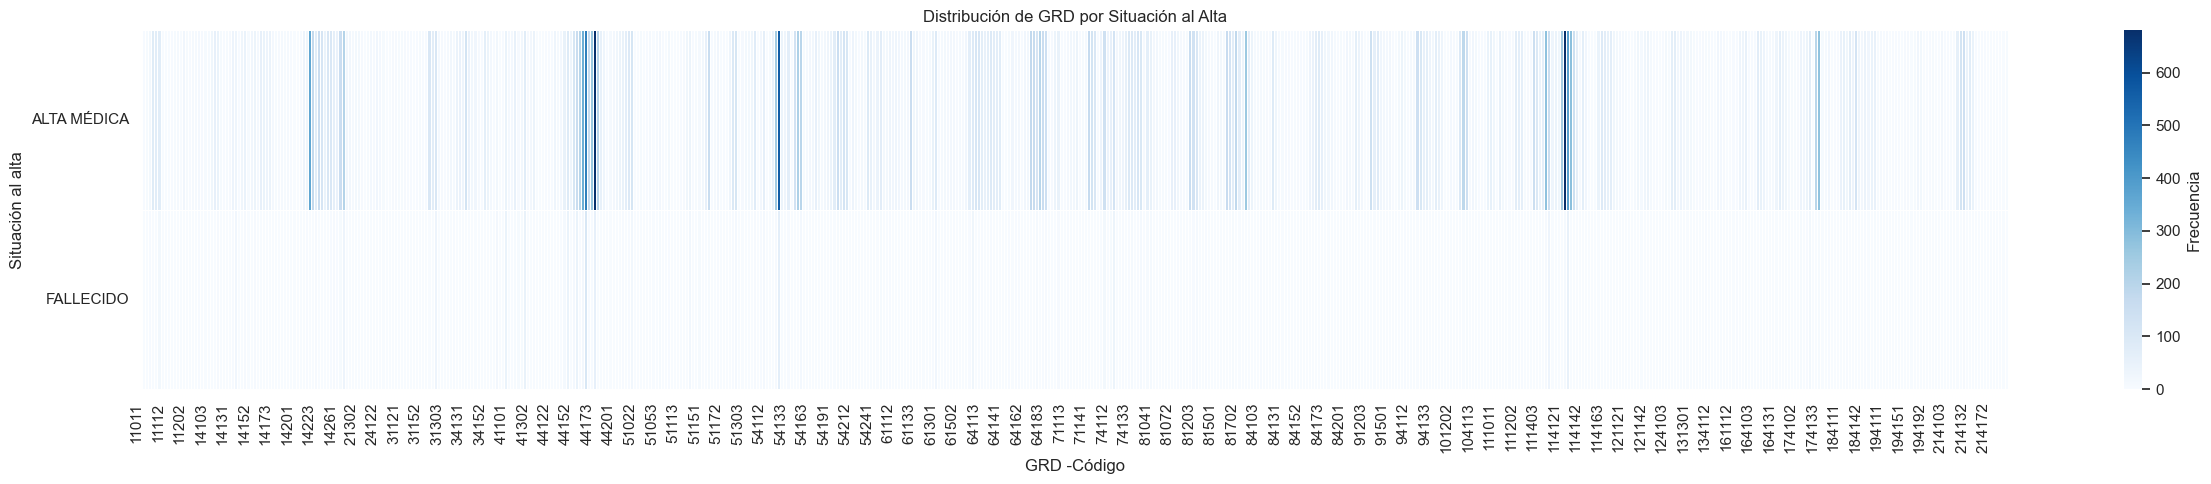


Chi² = 3688.44, p-value = 0.0000
→ Hay asociación estadísticamente significativa entre Situación al alta y GRD.


In [20]:
# Normalizar texto: quitar espacios, convertir a mayúsculas
df['Situacion al alta'] = df['Situacion al alta'].dropna()
df['Situacion al alta'] = df['Situacion al alta'].astype(str).str.strip().str.upper()

df = df[df['Situacion al alta'] != 'NAN']

# Unificar variantes comunes si aplica
df['Situacion al alta'] = df['Situacion al alta'].replace({
    'MUERTO': 'FALLECIDO',
    'ALTA MEDICA': 'ALTA MÉDICA'
})

# Verificar valores únicos y nulos
print(f"Valores únicos: {df['Situacion al alta'].unique()}")
print(f"Nulos: {df['Situacion al alta'].isnull().sum()}")

# Frecuencia por categoría
print(f"\nFrecuencia:\n{df['Situacion al alta'].value_counts()}")

# Crosstab
alta_grd = pd.crosstab(df['Situacion al alta'], df['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 5))
sns.heatmap(alta_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Situación al Alta")
plt.xlabel("GRD -Código")
plt.ylabel("Situación al alta")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Prueba de Chi-cuadrado
from scipy.stats import chi2_contingency
chi2, p, dof, _ = chi2_contingency(alta_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay asociación estadísticamente significativa entre Situación al alta y GRD.")
else:
    print("→ No se encontró asociación significativa.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <h4 style="font-size: 12pt;"><strong>Variables Procedimientos realizados durante la estancia: </strong></h4>
    <p style="font-size: 12pt;">
        Las variables "Proc1" a "Proc30" representan procedimientos clínicos realizados durante la estancia hospitalaria, codificados según el sistema CUPS/CIE. El número de registros decrece progresivamente desde "Proc1" (n=19,161) hasta "Proc30" (n=5), lo que indica una fuerte concentración de procedimientos en los primeros campos. Los códigos más frecuentes incluyen intervenciones comunes como imágenes diagnósticas (ej. 87.44, 89.51) y procedimientos cardiovasculares (ej. 88.72, 45.16), todos con sentido clínico en el contexto hospitalario. 
        <br><br>
        Se construyó una variable binaria "Tiene_procedimiento" que indica si el paciente tuvo al menos un procedimiento, y se buscó la creación de variables indicadoras para los procedimientos más prevalentes. Dada su potencial capacidad explicativa, su uso consolidado como variables binarias puede mejorar el rendimiento del modelo sin incurrir en una carga dimensional innecesaria.
    </p>
</div>


Columnas de procedimientos: ['Proc1', 'Proc2', 'Proc3', 'Proc4', 'Proc5', 'Proc6', 'Proc7', 'Proc8', 'Proc9', 'Proc10', 'Proc11', 'Proc12', 'Proc13', 'Proc14', 'Proc15', 'Proc16', 'Proc17', 'Proc18', 'Proc19', 'Proc20', 'Proc21', 'Proc22', 'Proc23', 'Proc24', 'Proc25', 'Proc26', 'Proc27', 'Proc28', 'Proc29', 'Proc30']

Cantidad de procedimientos registrados en cada columna:
Proc1     19161
Proc2     13726
Proc3     10076
Proc4      7458
Proc5      5366
Proc6      3829
Proc7      2689
Proc8      1966
Proc9      1428
Proc10     1042
Proc11      767
Proc12      583
Proc13      439
Proc14      308
Proc15      234
Proc16      180
Proc17      142
Proc18      118
Proc19       94
Proc20       75
Proc21       55
Proc22       49
Proc23       39
Proc24       31
Proc25       26
Proc26       23
Proc27       20
Proc28       15
Proc29        9
Proc30        5
dtype: int64

Top 35 procedimientos más frecuentes:
87.44    7385
89.51    6430
88.72    4023
87.03    2881
45.16    2587
88.76    2560
87.41  

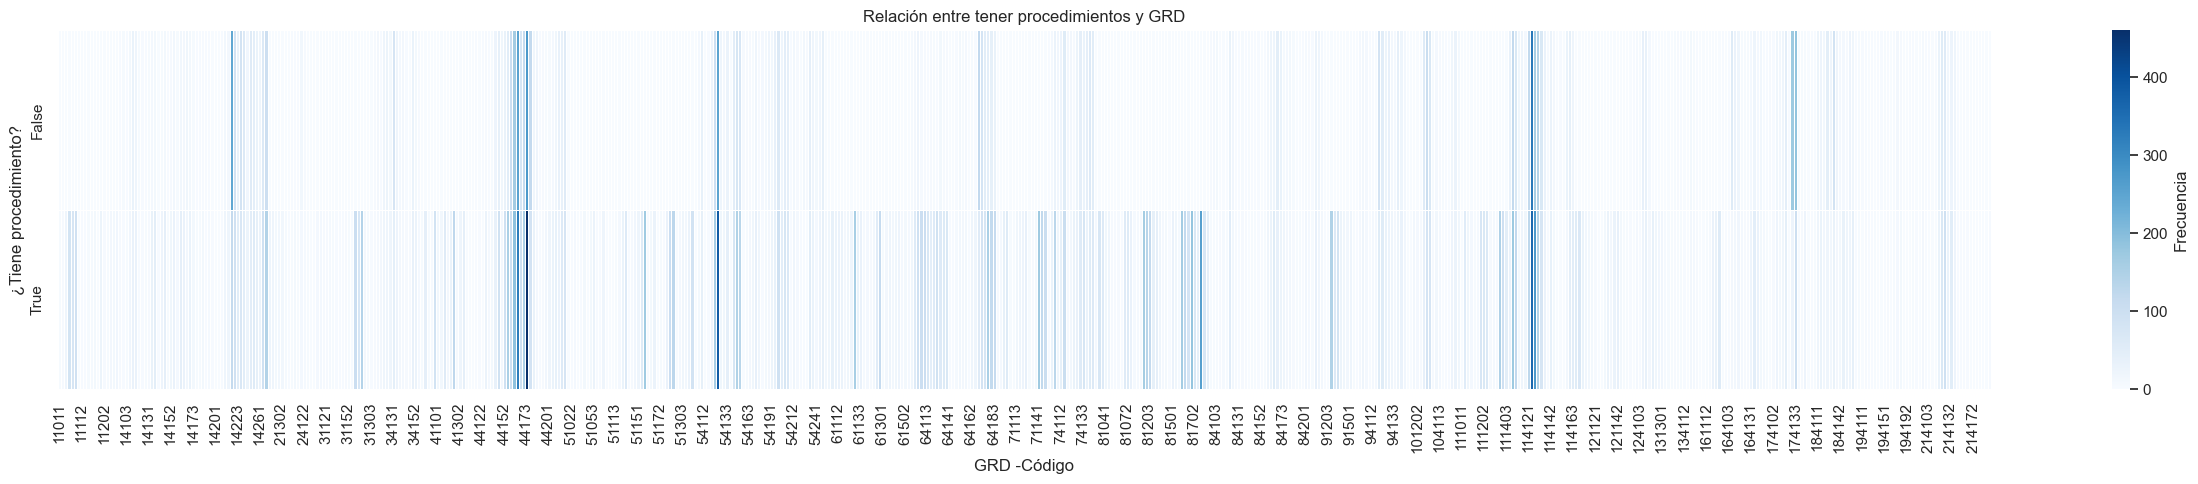


Chi² = 6602.34, p-value = 0.0000
→ Hay una asociación significativa entre tener procedimientos y el GRD.


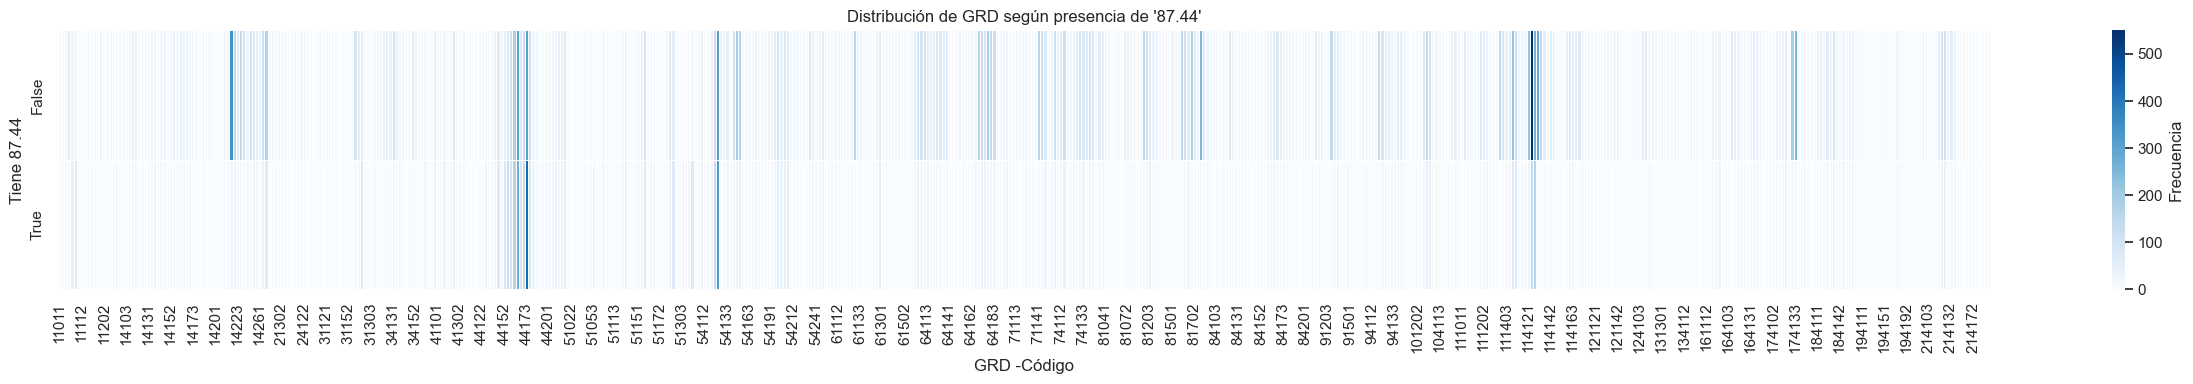

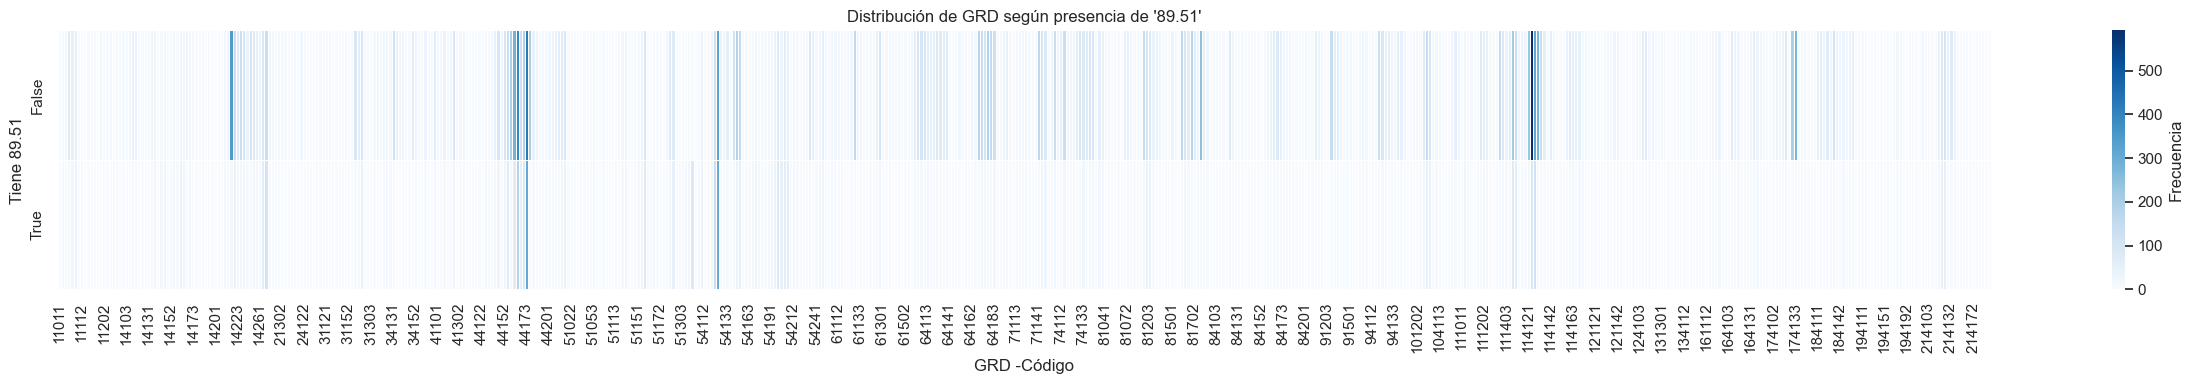

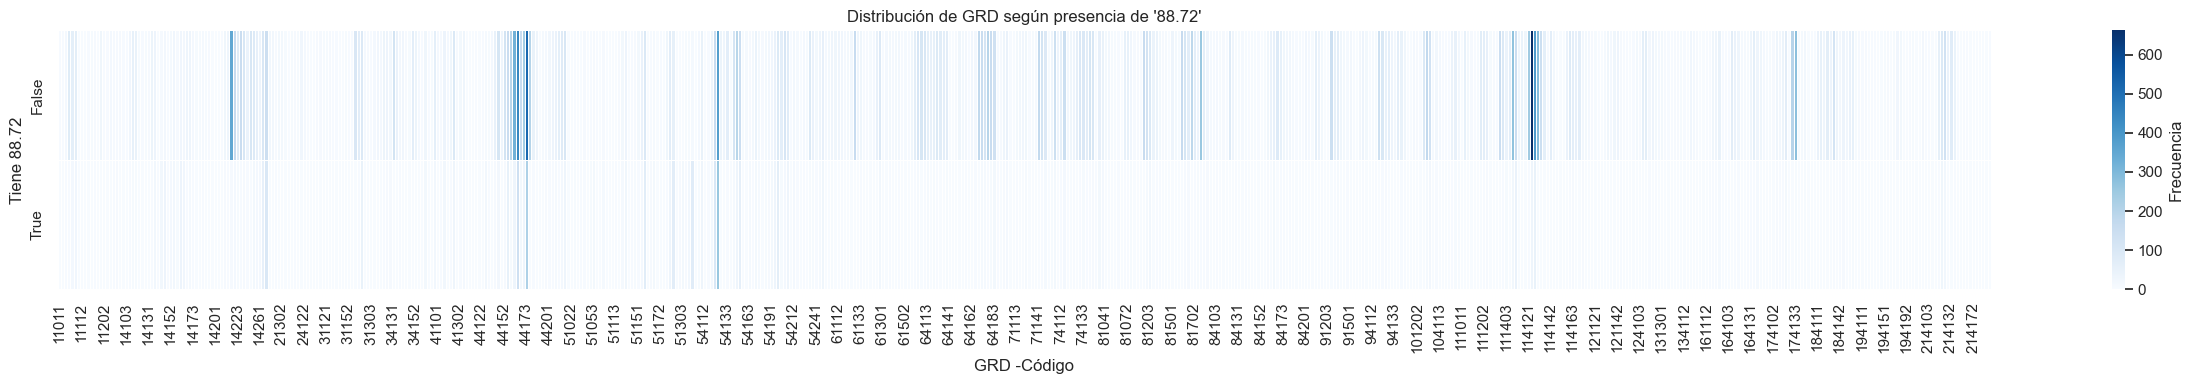

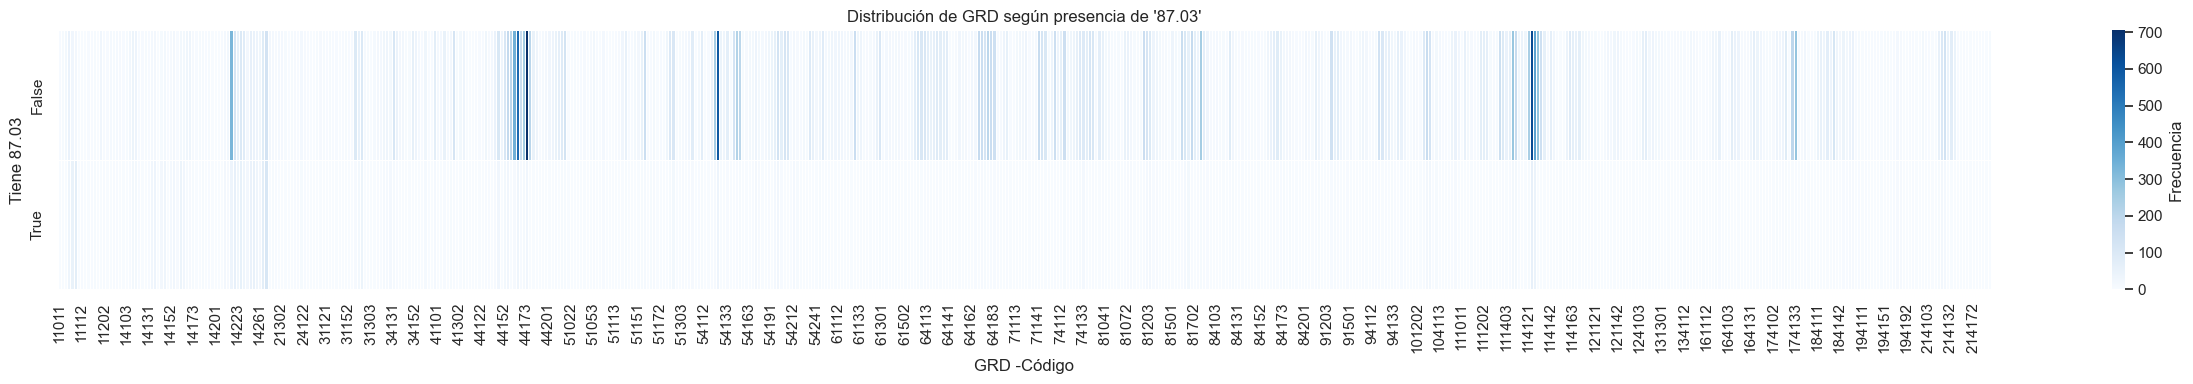

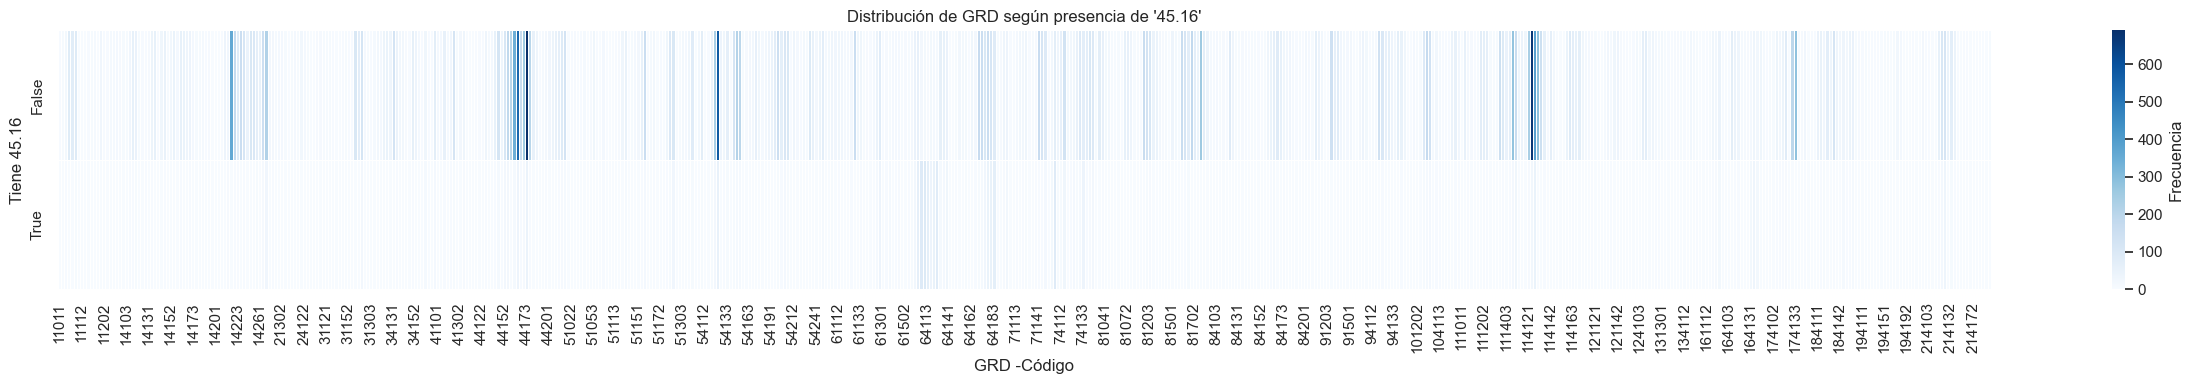

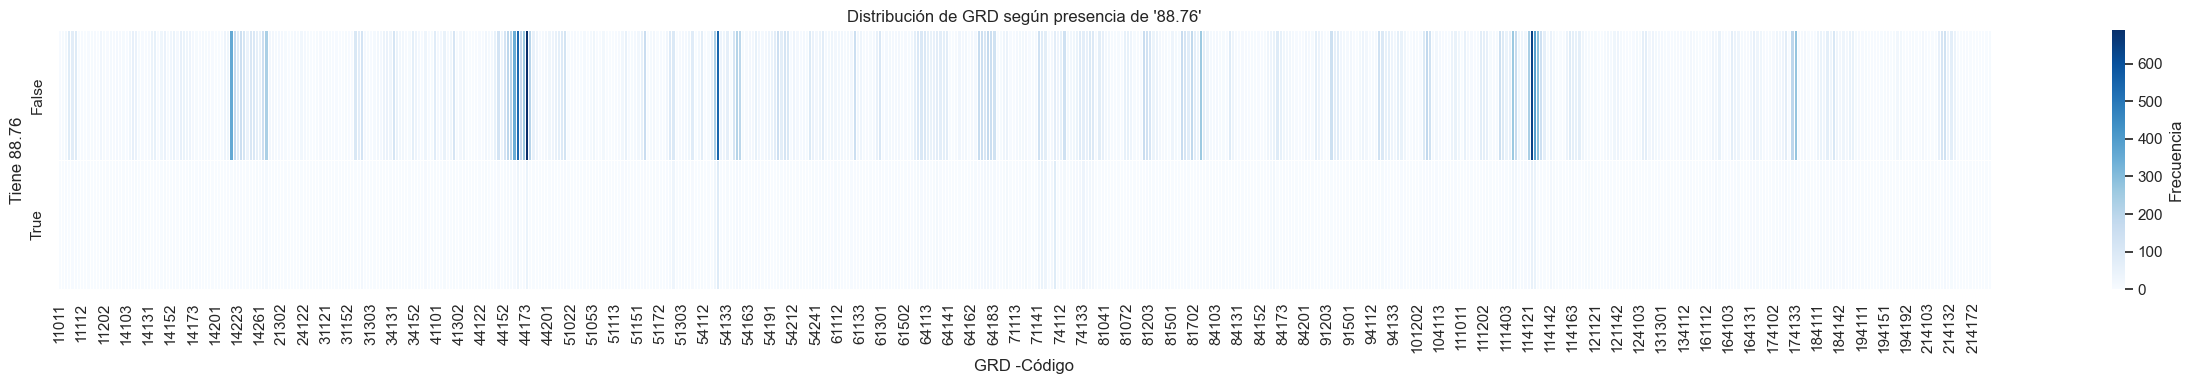

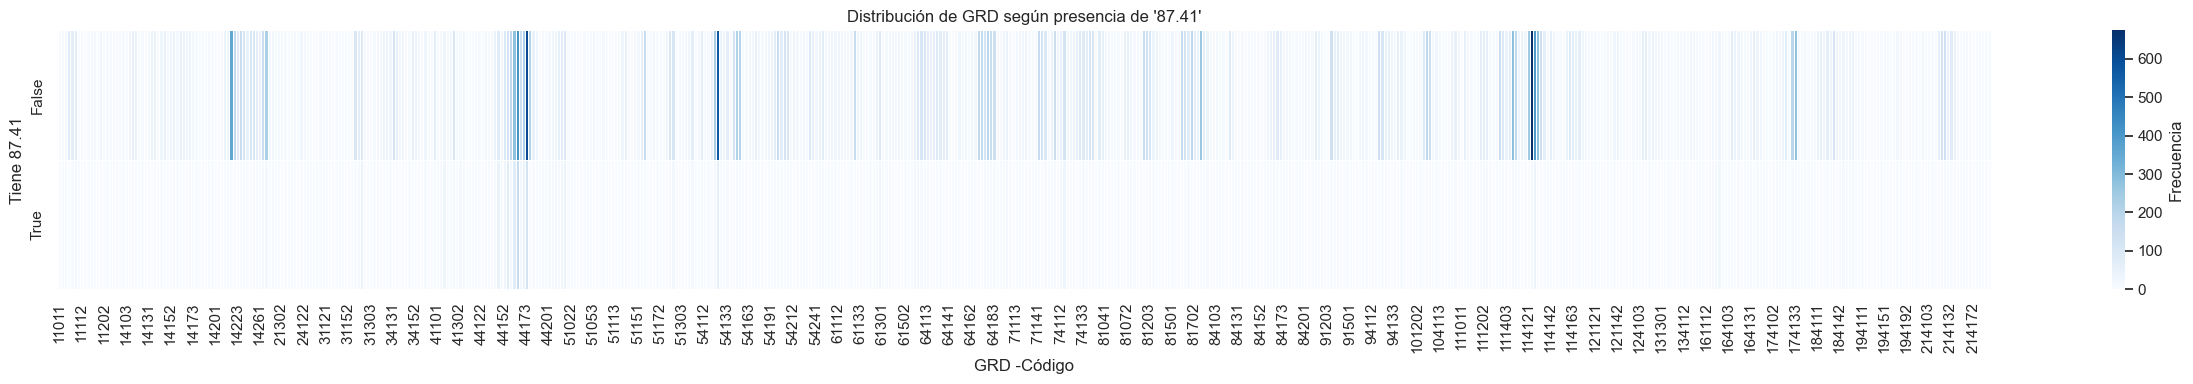

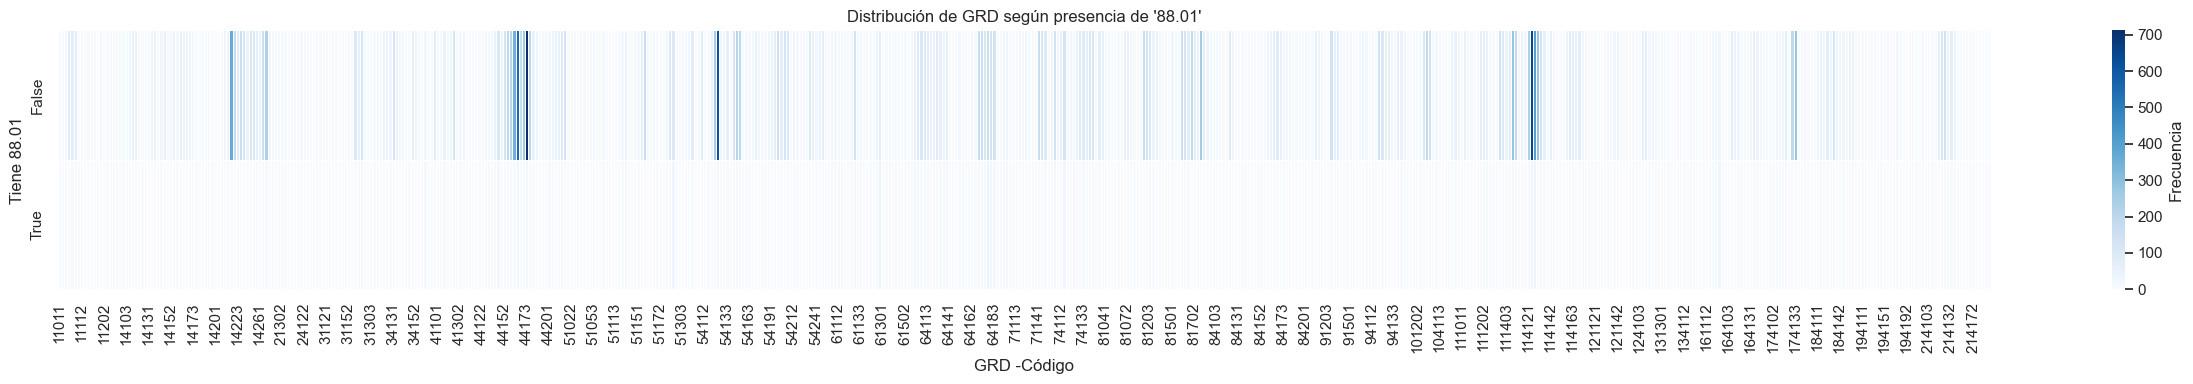

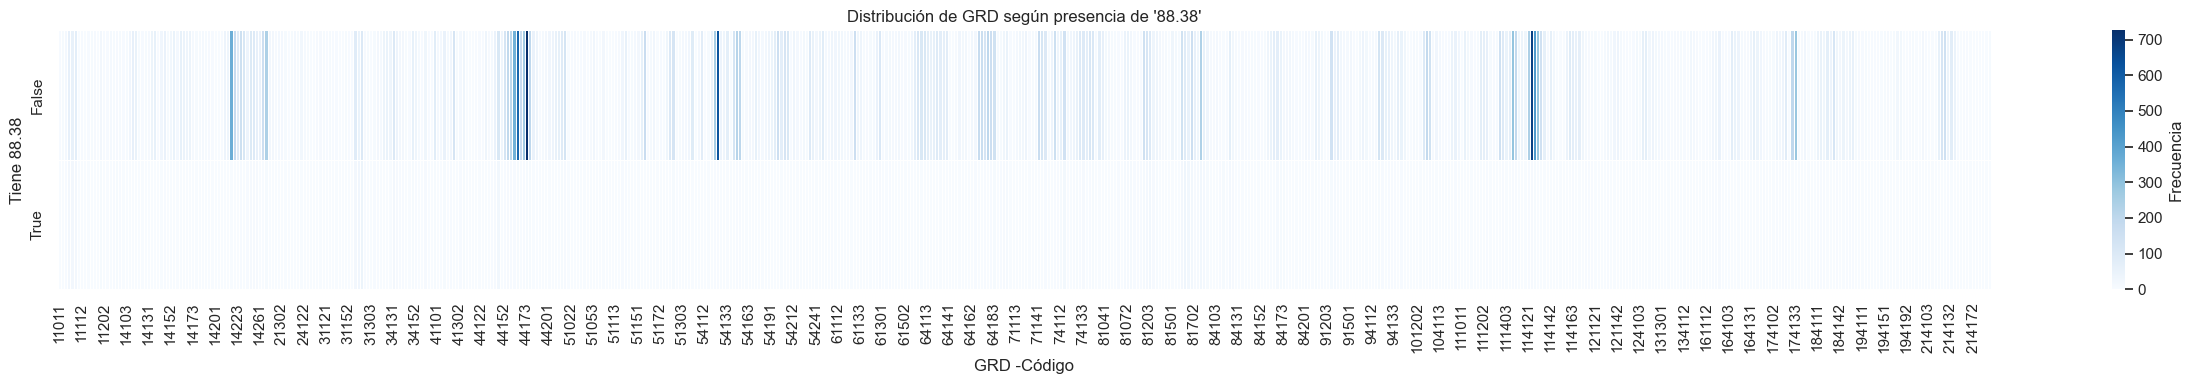

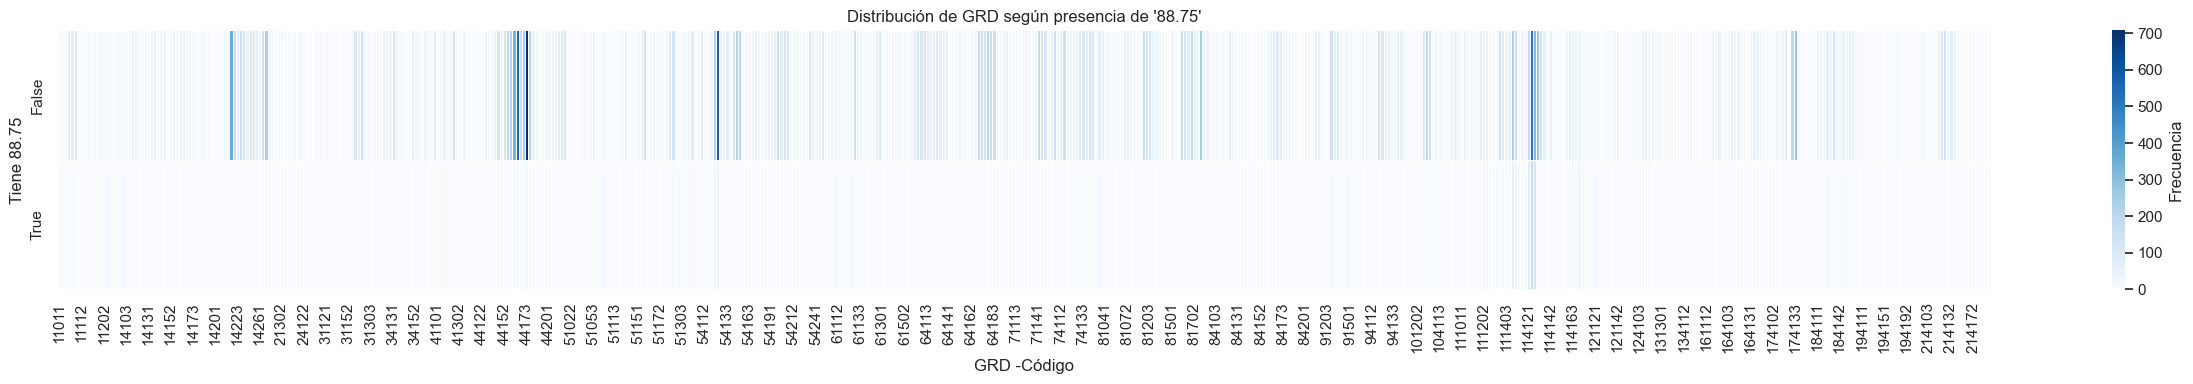

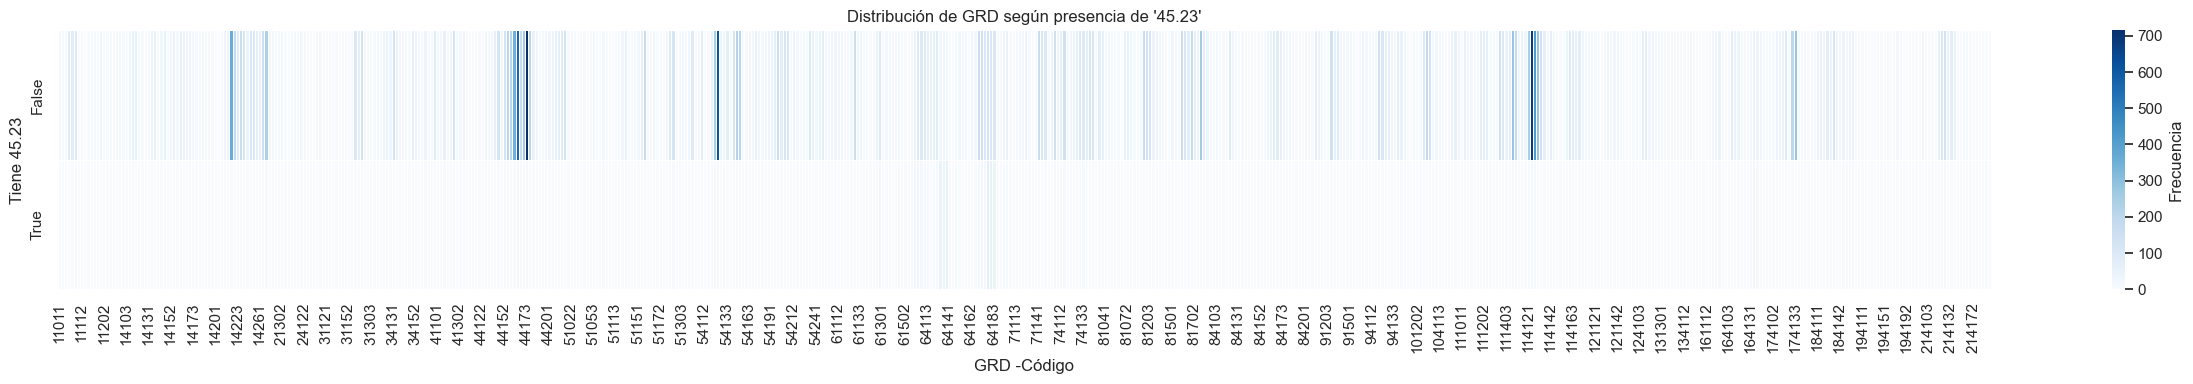

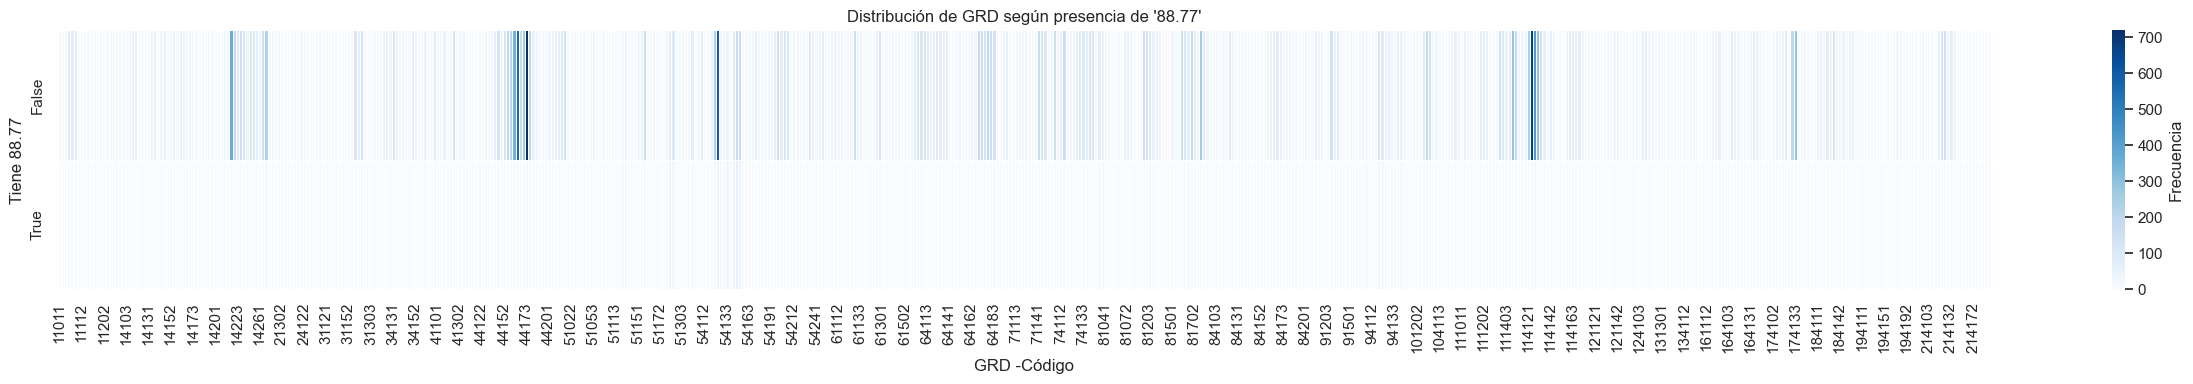

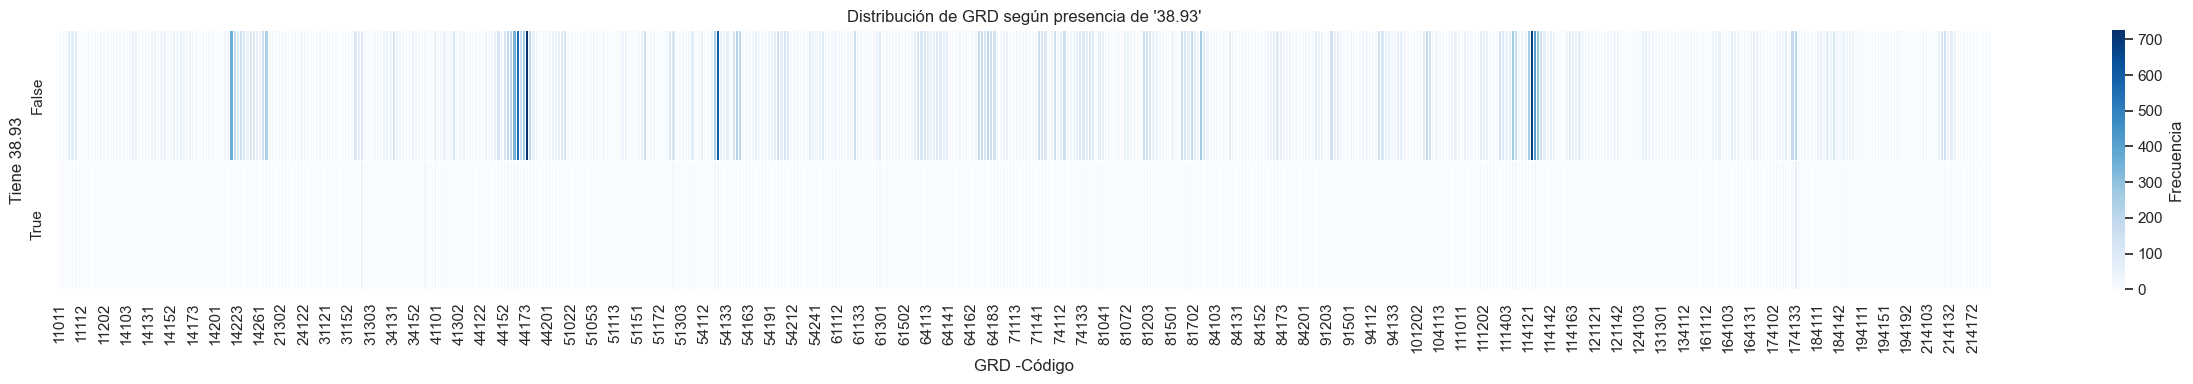

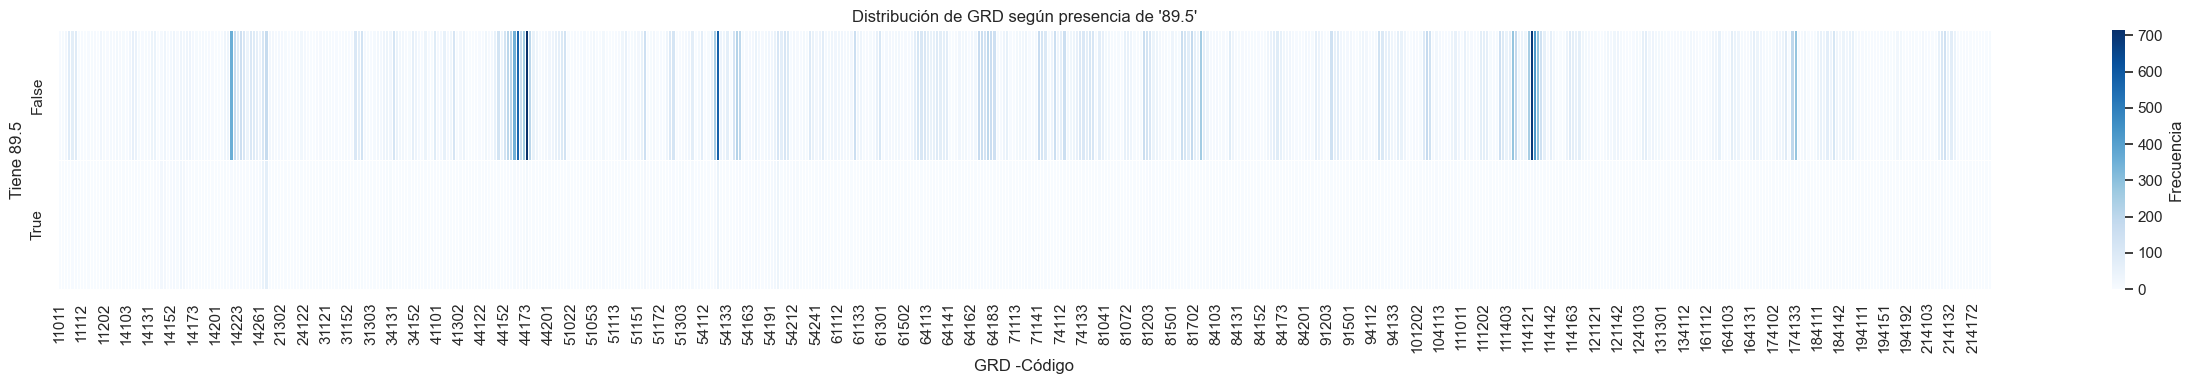

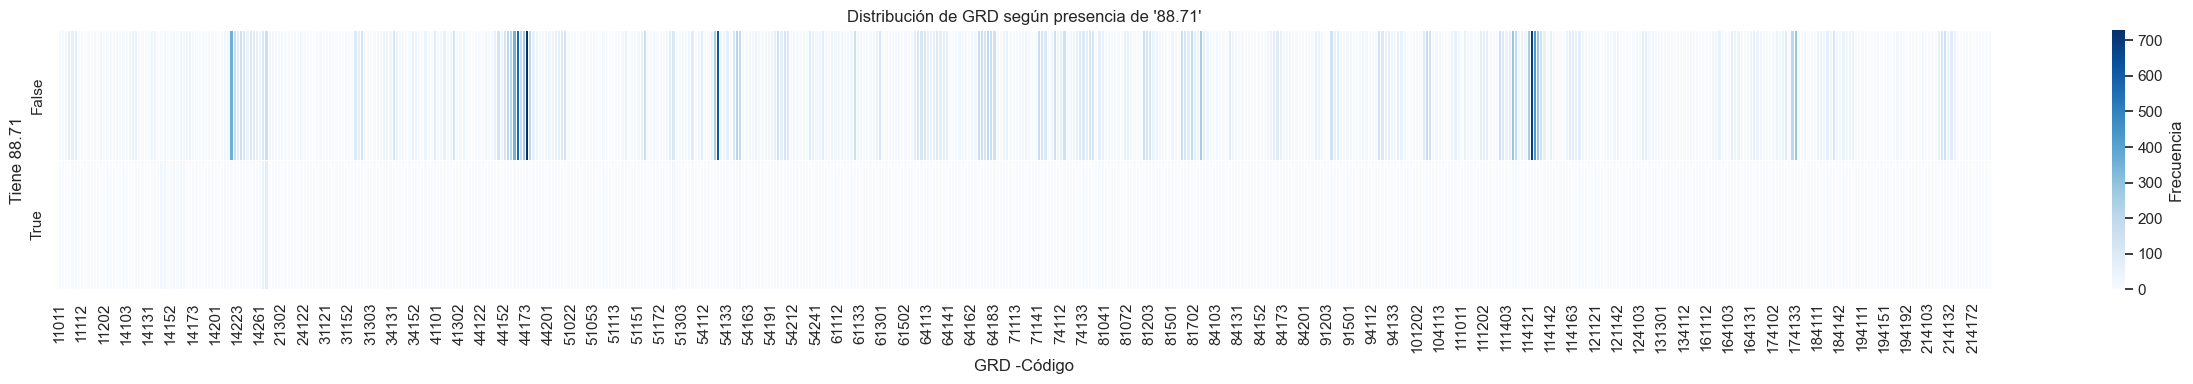

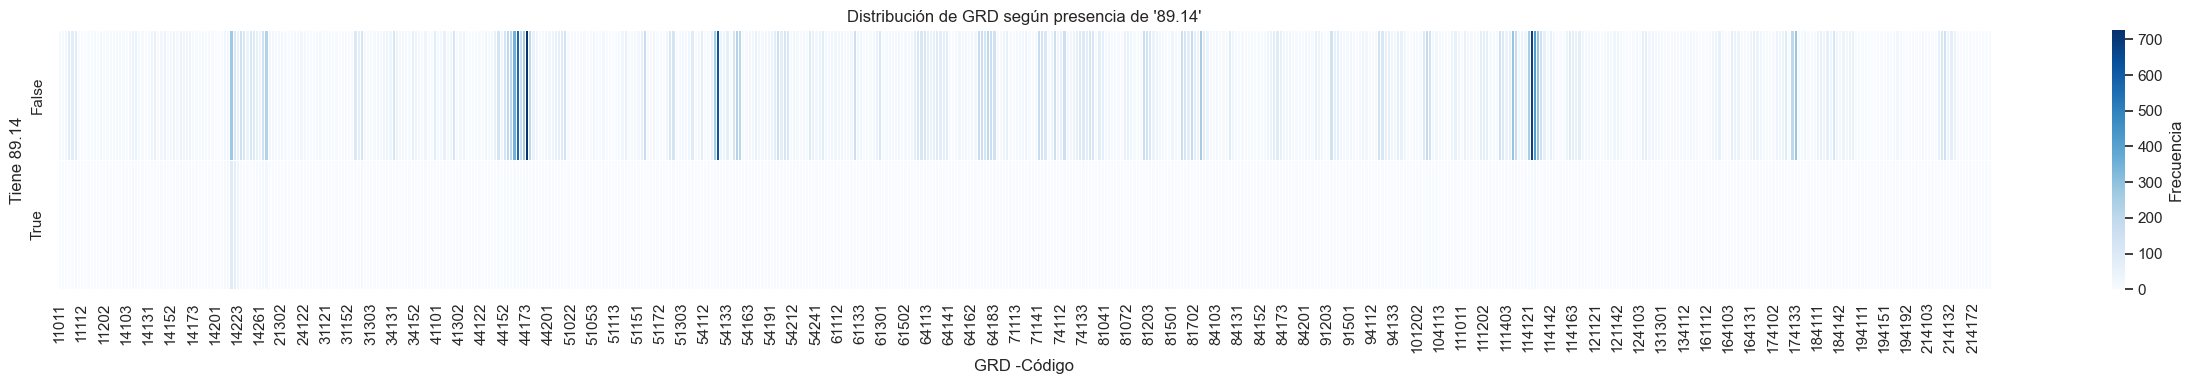

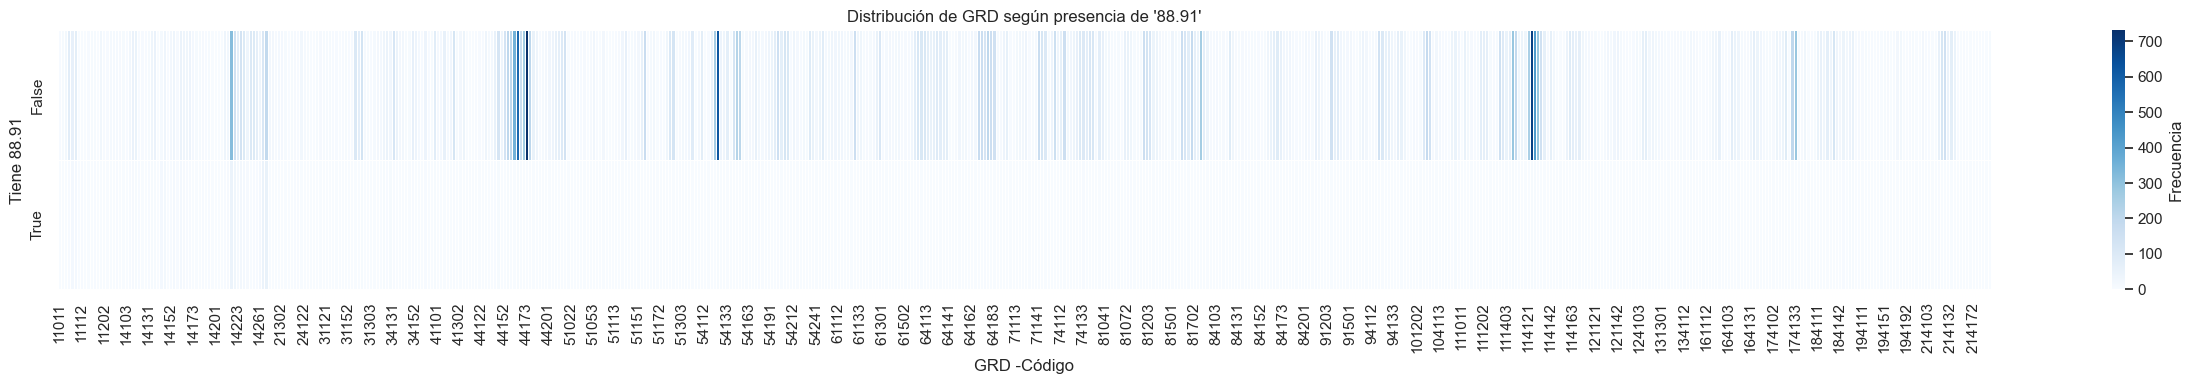

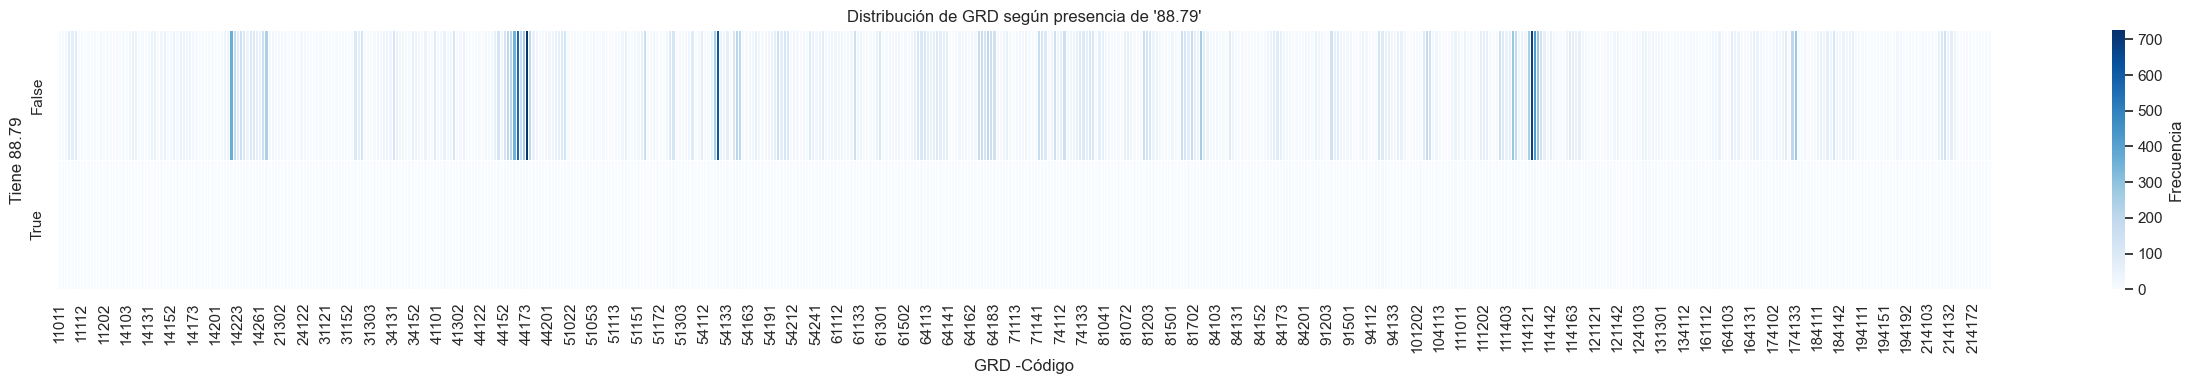

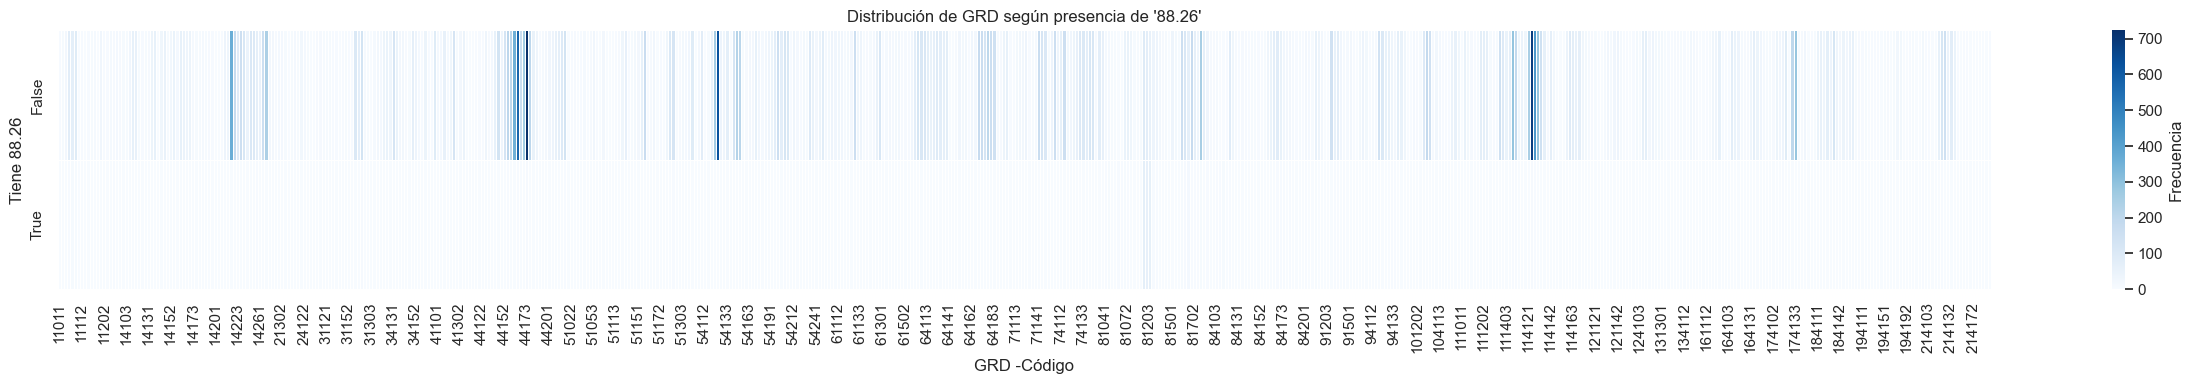

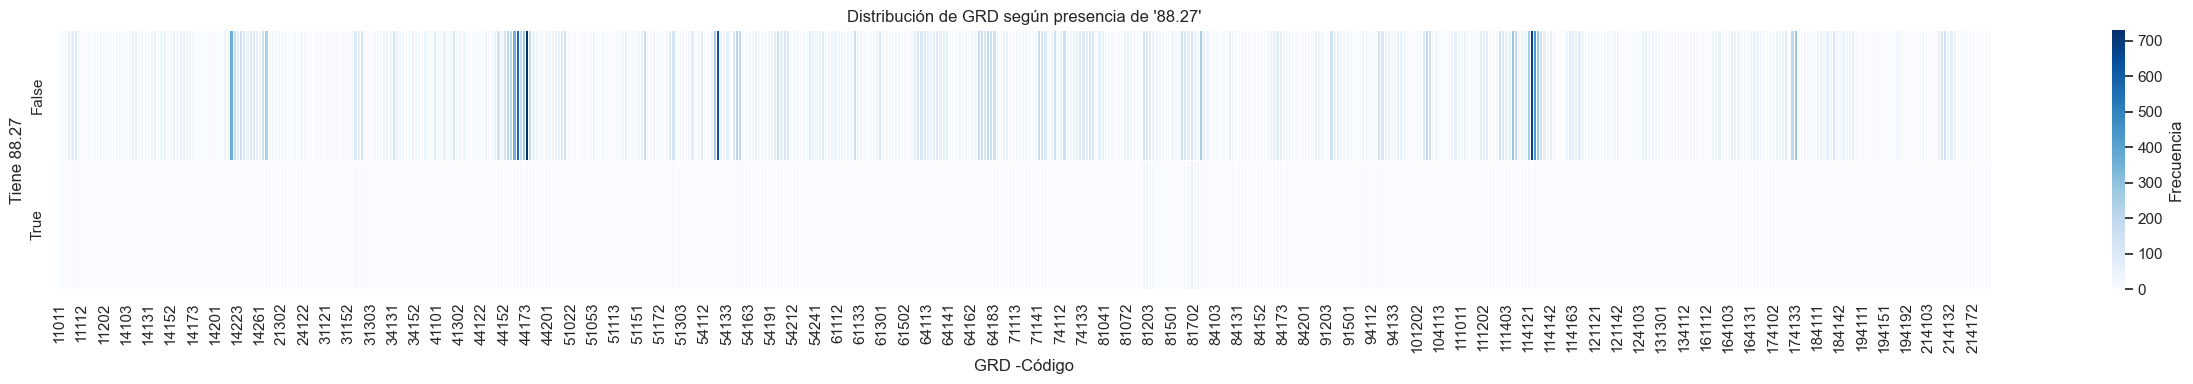

In [21]:
# Identificar columnas de procedimientos
procedimientos = [col for col in df.columns if col.strip().upper().replace('-', ' ').startswith('PROC')]
print("Columnas de procedimientos:", procedimientos)

# Conteo de no nulos por columna
print("\nCantidad de procedimientos registrados en cada columna:")
conteo_proc_col = df[procedimientos].notnull().sum()
print(conteo_proc_col)

# Unificar todos los códigos en una sola serie
proc_series = pd.concat([df[col] for col in procedimientos]).dropna()
conteo_total_proc = proc_series.value_counts()
print("\nTop 35 procedimientos más frecuentes:")
print(conteo_total_proc.head(20))

# Crear variable binaria: ¿el paciente tiene al menos un procedimiento?
df['Tiene_procedimiento'] = df[procedimientos].notna().any(axis=1)

# Tabla cruzada: Tiene procedimiento vs GRD
tabla_proc_binaria = pd.crosstab(df['Tiene_procedimiento'], df['GRD -Código'])

# Heatmap general
plt.figure(figsize=(25, 5))
sns.heatmap(tabla_proc_binaria, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Relación entre tener procedimientos y GRD")
plt.xlabel("GRD -Código")
plt.ylabel("¿Tiene procedimiento?")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Prueba de Chi²
chi2, p, dof, _ = chi2_contingency(tabla_proc_binaria)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación significativa entre tener procedimientos y el GRD.")
else:
    print("→ No se encontró asociación significativa.")

# Análisis individual por top 20 procedimientos
top_procs = conteo_total_proc.head(20).index

for proc in top_procs:
    col_bin = f"Tiene_{proc}"
    df[col_bin] = df[procedimientos].apply(lambda row: proc in row.values, axis=1)

    tabla_indiv = pd.crosstab(df[col_bin], df['GRD -Código'])

    plt.figure(figsize=(25, 4))
    sns.heatmap(tabla_indiv, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
    plt.title(f"Distribución de GRD según presencia de '{proc}'")
    plt.xlabel("GRD -Código")
    plt.ylabel(f"Tiene {proc}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <h4 style="font-size: 12pt;"><strong>Variable Tipo servicio: </strong></h4>
    <p style="font-size: 12pt;">La variable "Tipo servicio" presenta inicialmente múltiples variantes textuales para una misma categoría, las cuales fueron normalizadas para reducir ruido. Después de esta limpieza, se identifican cinco categorías principales: "URGENCIA ADULTOS", "URGENCIA PEDÍATRICAS", "CIRUGÍA", "NO APLICA" y un caso aislado de "ATENCIÓN PRIORITARIA". La distribución está altamente desbalanceada, con más del 85% de los casos concentrados en "URGENCIA ADULTOS". El análisis cruzado con GRD muestra diferencias leves entre categorías, pero no se observan patrones predictivos fuertes o específicos. La prueba de chi-cuadrado indica una asociación estadísticamente significativa, aunque esto probablemente se deba al tamaño de muestra. Dada la desproporción extrema y la baja capacidad discriminativa observada en el heatmap, esta variable puede introducir más ruido que señal. Se descarta del modelo predictivo.</p>
    </div>

Valores únicos de Tipo servicio: ['URGENCIA ADULTOS' 'NO APLICA' 'CIRUGÍA' 'URGENCIA PEDÍATRICAS'
 'ATENCIÓN PRIORITARIA']
Valores nulos de Tipo servicio: 0

Frecuencia por categoría: Tipo servicio
URGENCIA ADULTOS        24839
NO APLICA                2351
URGENCIA PEDÍATRICAS      368
CIRUGÍA                   309
ATENCIÓN PRIORITARIA        1
Name: count, dtype: int64


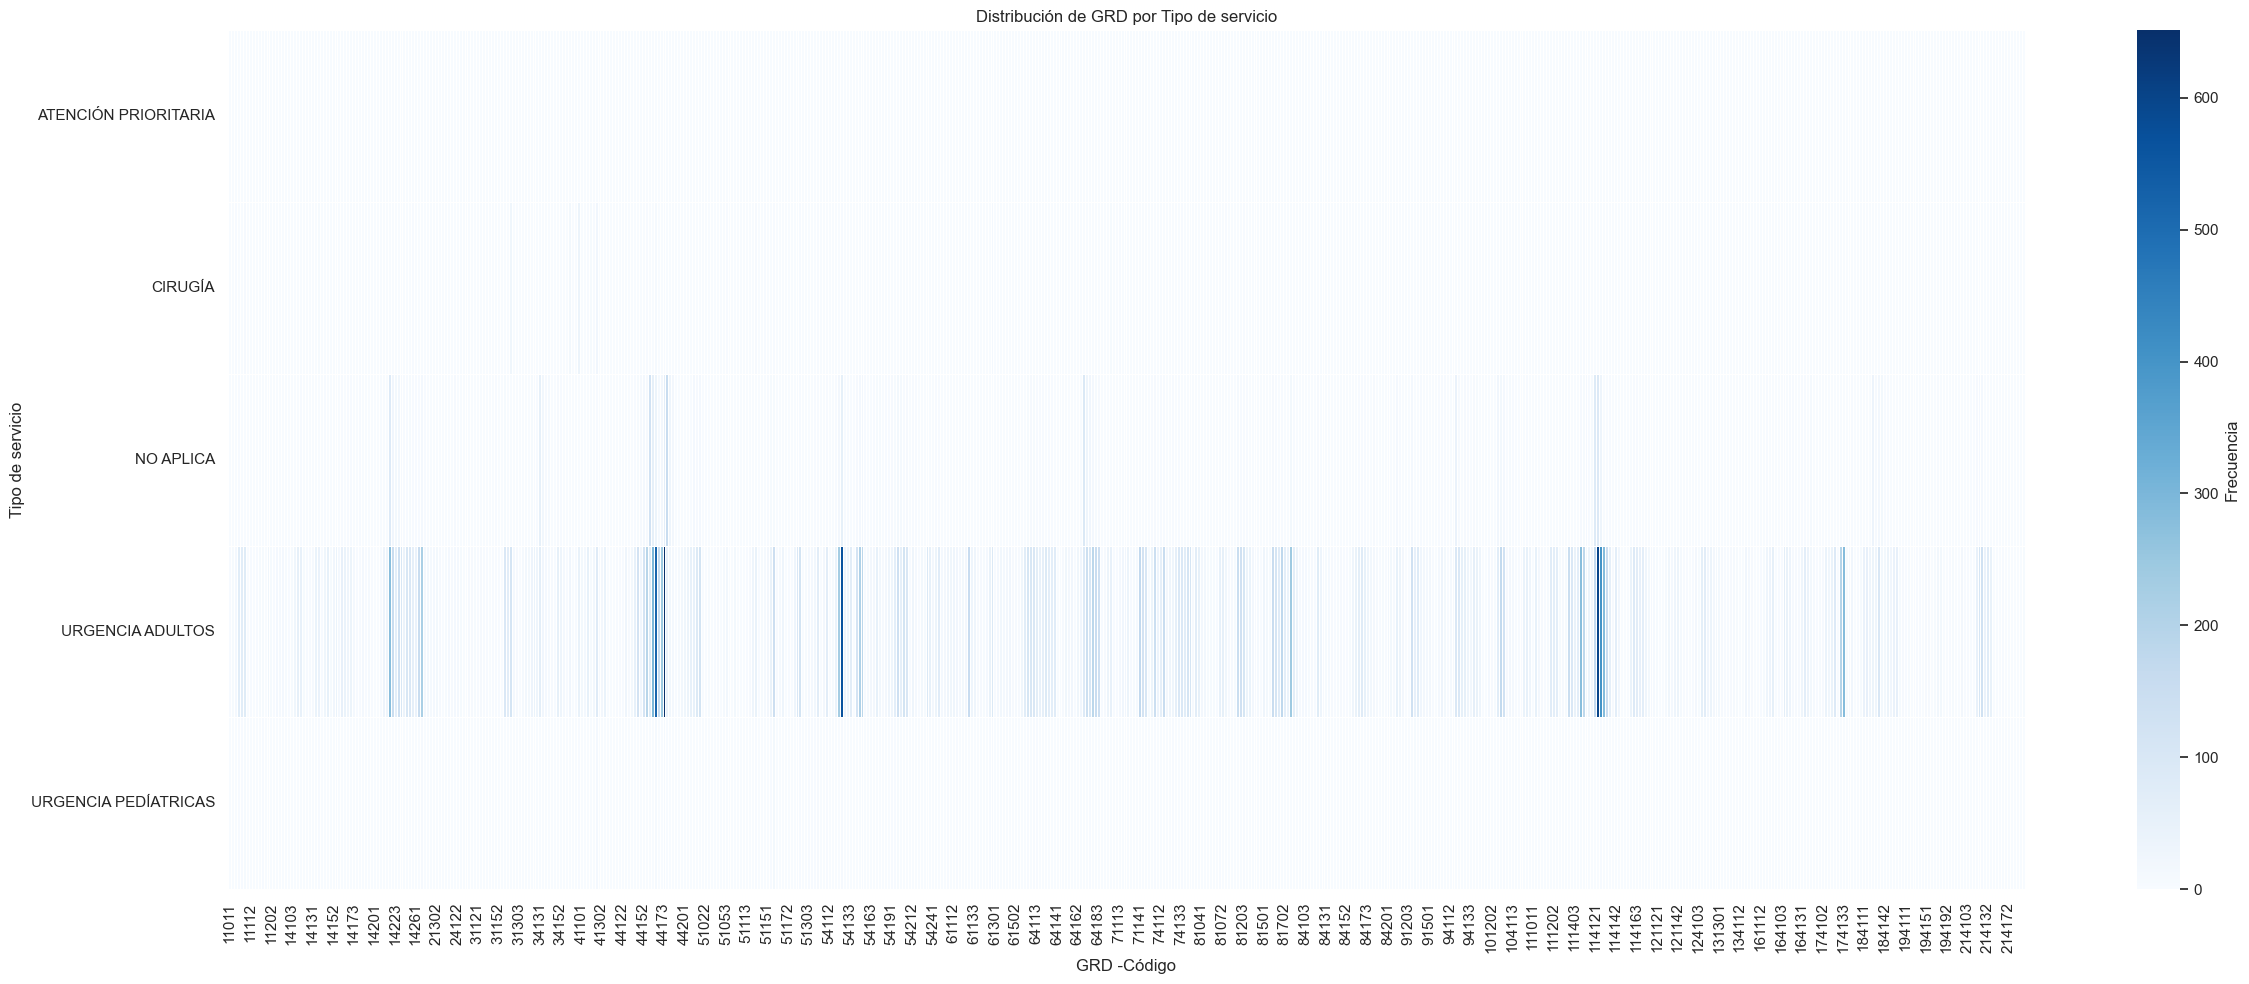


Chi² = 10973.44, p-value = 0.0000
→ Hay una asociación significativa entre Tipo de servicio y GRD.


In [22]:
# Asegurar que la variable sea texto y normalizar: quitar espacios, convertir a mayúsculas
df['Tipo servicio'] = df['Tipo servicio'].astype(str).str.strip().str.upper()

# Agrupar variantes comunes para evitar dispersión de categorías
df['Tipo servicio'] = df['Tipo servicio'].replace({
    'URGENCIA ADULTO': 'URGENCIA ADULTOS',
    'URGENCIA ADULTOS.': 'URGENCIA ADULTOS',
    'URGENCIA - ADULTOS': 'URGENCIA ADULTOS',
    'U. ADULTOS': 'URGENCIA ADULTOS',
    'URGENCIA PEDIATRICAS': 'URGENCIA PEDÍATRICAS',
    'CIRUGIA': 'CIRUGÍA',
    'N0 APLICA': 'NO APLICA',
    'NAN': 'NO APLICA'
})

# Verificar valores únicos y nulos
print(f"Valores únicos de Tipo servicio: {df['Tipo servicio'].unique()}")
print(f"Valores nulos de Tipo servicio: {df['Tipo servicio'].isnull().sum()}")

# Ver distribución de frecuencias
print(f"\nFrecuencia por categoría: {df['Tipo servicio'].value_counts()}")

# Tabla cruzada: Tipo servicio vs GRD
servicio_grd = pd.crosstab(df['Tipo servicio'], df['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(servicio_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Tipo de servicio")
plt.xlabel("GRD -Código")
plt.ylabel("Tipo de servicio")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Prueba Chi²
chi2, p, dof, _ = chi2_contingency(servicio_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación significativa entre Tipo de servicio y GRD.")
else:
    print("→ No se encontró asociación significativa.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <h4 style="font-size: 12pt;"><strong>Variable Causa básica de muerte:</strong></h4>
    <p style="font-size: 12pt;">
        La variable "Causa básica de muerte" contiene 258 códigos únicos que representan causas específicas de defunción registradas para cada paciente. Presenta un total de 26,770 valores nulos, lo cual es relevante dado que muchas estancias hospitalarias no culminan en muerte. Las causas más frecuentes son I120 (101 casos), 3441 (96 casos), C349 (65 casos), e I132 (61 casos), evidenciando una distribución larga con una fuerte concentración en pocos códigos. El mapa de calor muestra la distribución de GRD por las 15 causas más comunes, revelando patrones claros de asociación entre ciertas causas y algunos GRD específicos. Pero dada su alta presencia de valures nulos, se evitará su inclusión en el modelo.
    </p>
</div>


Valores únicos: 258
Nulos: 26770
Causa Basica de muerte
I120    101
J441     96
C349     65
I132     61
J440     60
I110     42
I678     35
I219     21
I771     19
E105     19
Name: count, dtype: int64


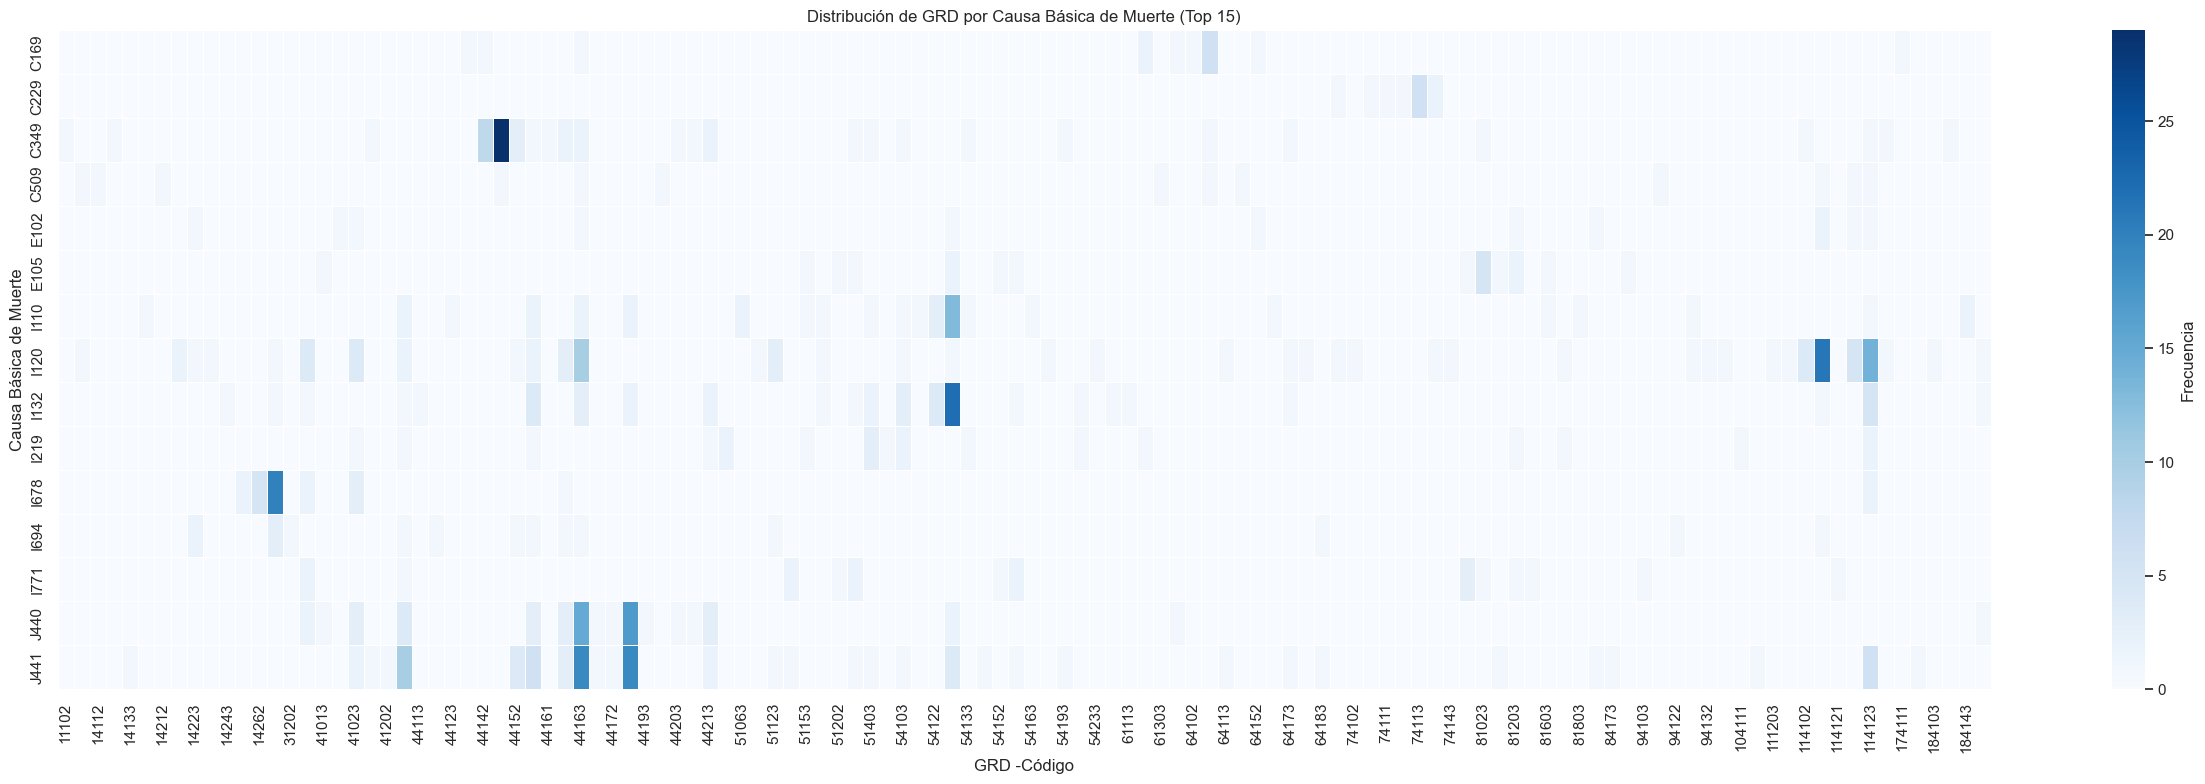


Chi² = 3816.81, p-value = 0.0000
→ Asociación estadísticamente significativa entre Causa Básica de Muerte y GRD.


In [23]:
# Normalizar texto
df['Causa Basica de muerte'] = df['Causa Basica de muerte'].astype(str).str.strip().str.upper()

# Reemplazar valores vacíos por NaN reales si corresponde
df['Causa Basica de muerte'] = df['Causa Basica de muerte'].replace({
    'NAN': np.nan, 
    '': np.nan
})

# Contar únicos y nulos
print(f"Valores únicos: {df['Causa Basica de muerte'].nunique()}")
print(f"Nulos: {df['Causa Basica de muerte'].isnull().sum()}")

# Frecuencia de causas (sin nulos)
print(df['Causa Basica de muerte'].value_counts().head(10))

# Filtrar registros con causa conocida
df_causa = df[df['Causa Basica de muerte'].notnull()]

# Crosstab (Top 15 causas)
top_causas = df_causa['Causa Basica de muerte'].value_counts().head(15).index
causa_grd = pd.crosstab(df_causa[df_causa['Causa Basica de muerte'].isin(top_causas)]['Causa Basica de muerte'],
                        df_causa['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 8))
sns.heatmap(causa_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Causa Básica de Muerte (Top 15)")
plt.xlabel("GRD -Código")
plt.ylabel("Causa Básica de Muerte")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Chi²
from scipy.stats import chi2_contingency
chi2, p, dof, _ = chi2_contingency(causa_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Asociación estadísticamente significativa entre Causa Básica de Muerte y GRD.")
else:
    print("→ No se encontró asociación significativa.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <h4 style="font-size: 12pt;"><strong>Variable Infecciones:</strong></h4>
    <p style="font-size: 12pt;">
        La variable "Infecciones" es una variable binaria que indica si el paciente presentó infecciones durante la estancia hospitalaria, con las categorías 'SI' y 'NO'. No presenta valores nulos, y la distribución está fuertemente desbalanceada: 27,355 casos sin infecciones frente a solo 513 con presencia de infección. Este alto desbalance desmuestra un bajo poder predictivo por lo que se omitirá su uso en el modelo.
    </p>
</div>


Valores únicos: ['NO' 'SI']
Nulos: 0

Frecuencia:
Infecciones
NO    27355
SI      513
Name: count, dtype: int64


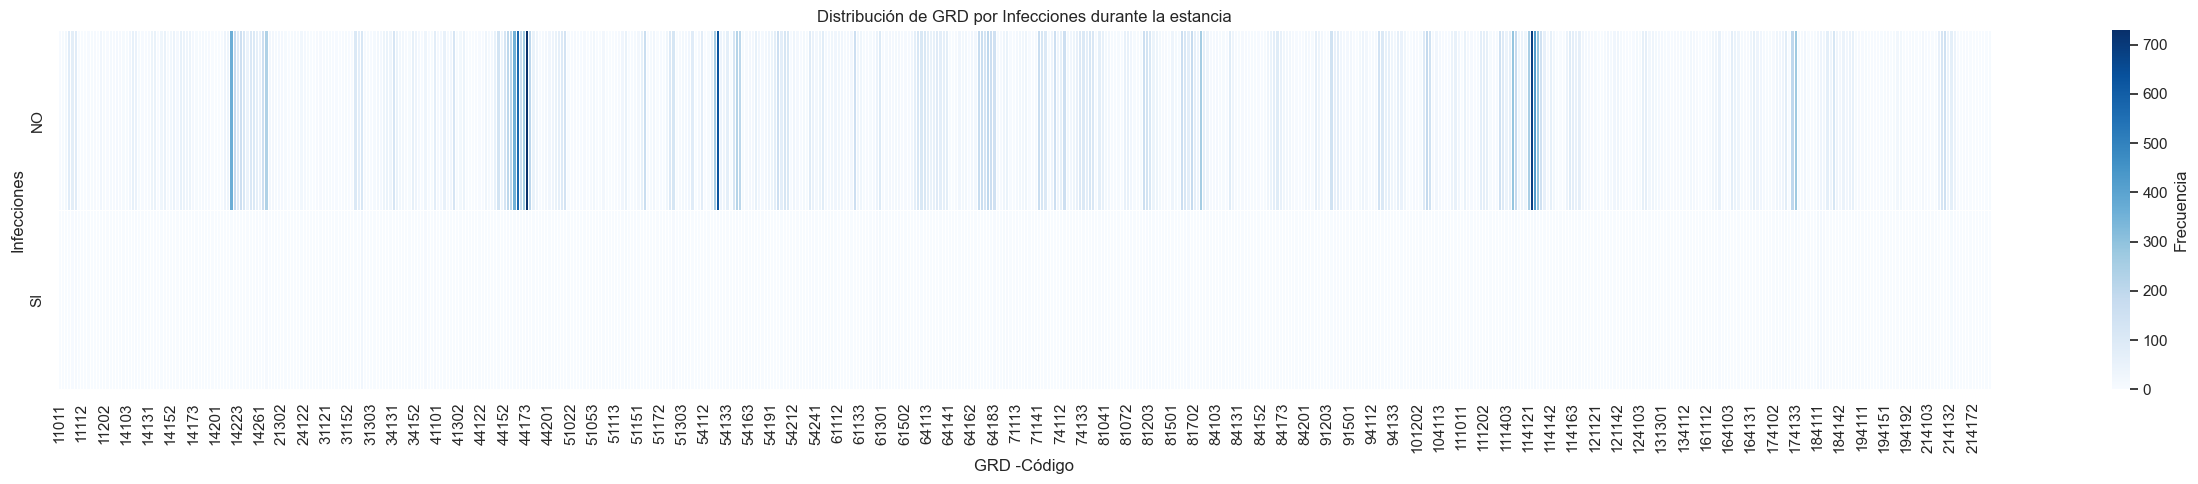


Chi² = 2718.77, p-value = 0.0000
→ Asociación estadísticamente significativa entre Infecciones y GRD.


In [24]:
# Normalizar texto
df['Infecciones'] = df['Infecciones'].astype(str).str.strip().str.upper()

# Valores únicos y nulos
print(f"Valores únicos: {df['Infecciones'].unique()}")
print(f"Nulos: {df['Infecciones'].isnull().sum()}")

# Frecuencia
print(f"\nFrecuencia:\n{df['Infecciones'].value_counts()}")

# Crosstab
infec_grd = pd.crosstab(df['Infecciones'], df['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 5))
sns.heatmap(infec_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Infecciones durante la estancia")
plt.xlabel("GRD -Código")
plt.ylabel("Infecciones")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Chi²
from scipy.stats import chi2_contingency
chi2, p, dof, _ = chi2_contingency(infec_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Asociación estadísticamente significativa entre Infecciones y GRD.")
else:
    print("→ No se encontró asociación significativa.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <h4 style="font-size: 12pt;"><strong>Variable Infección quirúrgica:</strong></h4>
    <p style="font-size: 12pt;">
        La variable "Infección quirúrgica" es una variable binaria que indica si el paciente presentó una infección asociada a un procedimiento quirúrgico durante su estancia hospitalaria. No presenta valores nulos y sus categorías son 'SI' y 'NO', con una distribución altamente desbalanceada: 27662 pacientes no presentaron infección quirúrgica y solo 206 sí la presentaron. Este alto desbalance desmuestra un bajo poder predictivo por lo que se omitirá su uso en el modelo.
    </p>
</div>


Valores únicos: ['NO' 'SI']
Nulos: 0

Frecuencia:
Infección Quirurgica
NO    27662
SI      206
Name: count, dtype: int64


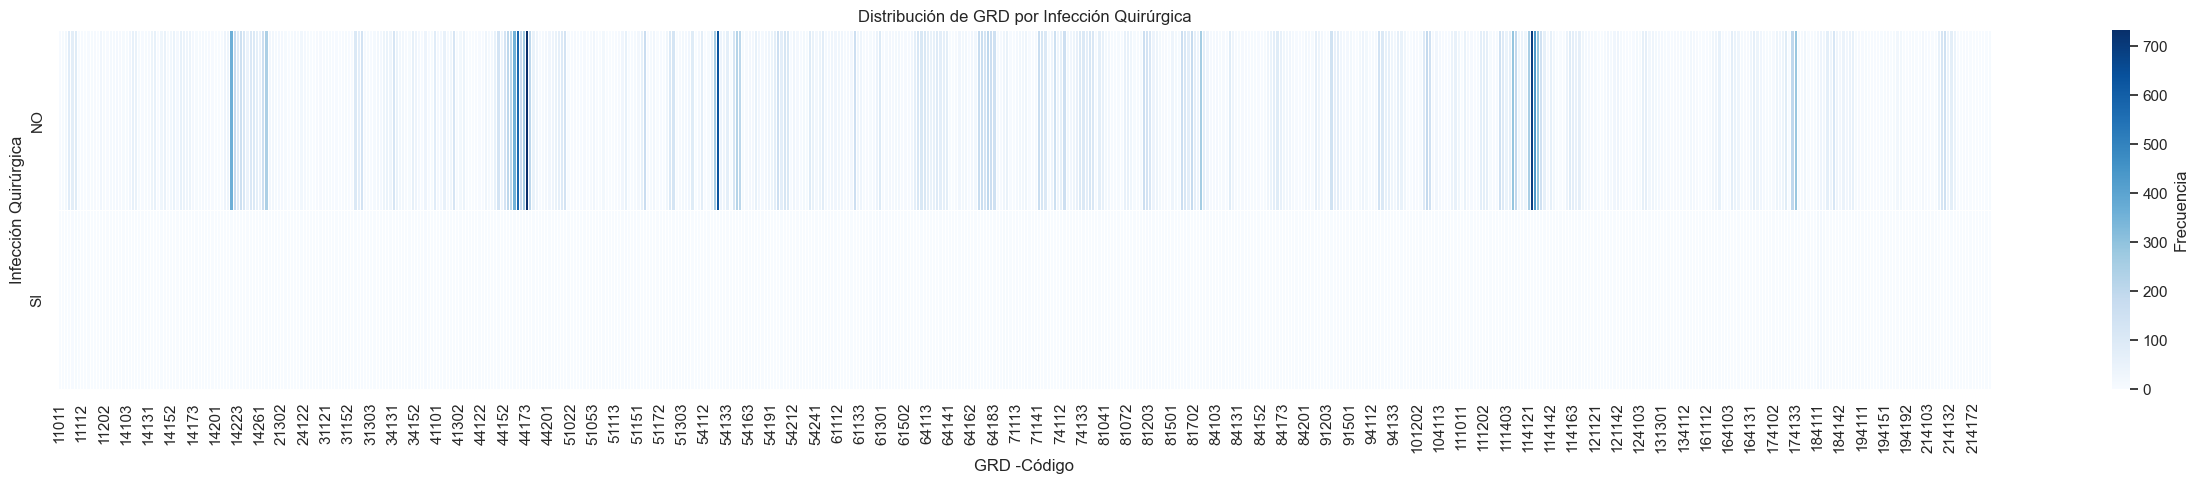


Chi² = 3755.94, p-value = 0.0000
→ Asociación estadísticamente significativa entre Infección Quirúrgica y GRD.


In [25]:
# Normalizar texto
df['Infección Quirurgica'] = df['Infección Quirurgica'].astype(str).str.strip().str.upper()

# Valores únicos y nulos
print(f"Valores únicos: {df['Infección Quirurgica'].unique()}")
print(f"Nulos: {df['Infección Quirurgica'].isnull().sum()}")

# Frecuencia
print(f"\nFrecuencia:\n{df['Infección Quirurgica'].value_counts()}")

# Crosstab
iq_grd = pd.crosstab(df['Infección Quirurgica'], df['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 5))
sns.heatmap(iq_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Infección Quirúrgica")
plt.xlabel("GRD -Código")
plt.ylabel("Infección Quirúrgica")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Chi²
chi2, p, dof, _ = chi2_contingency(iq_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Asociación estadísticamente significativa entre Infección Quirúrgica y GRD.")
else:
    print("→ No se encontró asociación significativa.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
  <h4 style="font-size: 12pt;"><strong>Resumen de inclusión y exclusión de variables para el modelo predictivo:</strong></h4>
  <p style="font-size: 12pt;">
    Se analizaron un total de 26 variables candidatas para el modelo. Las siguientes variables fueron <strong>incluidas</strong> por su relevancia clínica, integridad de los datos y asociación estadísticamente significativa con el GRD: <strong>Edad</strong> (en su versión agrupada "Grupo Edad"), <strong>Sexo</strong>, <strong>Tipo de ingreso</strong>, <strong>Días de estancia</strong>, <strong>Servicio de alta</strong>, <strong>Cuidados intensivos</strong>, <strong>Días en unidad de cuidados intensivos</strong>, <strong>Diagnóstico principal de egreso</strong>, <strong>Situación al alta</strong>, <strong>Diagnósticos relacionados y comorbilidades</strong> (como variables binarias), y <strong>Procedimientos realizados</strong> (resumidos en indicadores binarios). Estas variables aportan información directamente relacionada con la complejidad clínica, la estancia y los desenlaces hospitalarios, y mostraron relaciones sólidas tanto estadísticas como interpretables.
  </p>
  <p style="font-size: 12pt;">
    Por otro lado, se <strong>excluyeron</strong> las siguientes variables por presentar limitaciones significativas: <strong>Num caso</strong> (identificador sin valor predictivo), <strong>Aseguradora - Código y descripción</strong> (inconsistencias y baja relación con el GRD), <strong>Código de ciudad</strong> (alta cardinalidad sin aporte clínico), <strong>Fecha de ingreso</strong> (sin estacionalidad relevante), <strong>Diagnóstico de ingreso</strong> (desconectado de la atención actual), <strong>Código causa externa y Causa externa</strong> (alta proporción de nulos e inconsistencia en codificación), <strong>Tipo servicio</strong> (extremadamente desbalanceado y poco discriminativo), <strong>Causa básica de muerte</strong> (alta proporción de valores nulos), <strong>Infecciones</strong> e <strong>Infección quirúrgica</strong> (variables binarias con presencia muy baja, altamente desbalanceadas, lo cual limita su poder predictivo). Estas variables, aunque algunas muestran significancia estadística, presentan problemas estructurales o de distribución que justifican su exclusión del modelo para evitar ruido o sobreajuste.
  </p>
</div>


<table border="1" style="border-collapse: collapse; font-family: 'Times New Roman', Times, serif; font-size: 12pt; text-align: left; width: 100%;">
  <thead>
    <tr>
      <th style="padding: 6px;">Variable</th>
      <th style="padding: 6px;">¿Incluir en el modelo?</th>
      <th style="padding: 6px;">Justificación</th>
    </tr>
  </thead>
  <tbody>
    <tr>
        <td style="padding: 6px;">Num caso</td>
        <td style="padding: 6px;">No</td>
        <td style="padding: 6px;">Identificador único sin valor predictivo</td></tr>
    <tr>
        <td style="padding: 6px;">Aseguradora -Código- / Descripción</td>
        <td style="padding: 6px;">No</td>
        <td style="padding: 6px;">Asociación débil con GRD y riesgo de inconsistencias</td></tr>
    <tr>
        <td style="padding: 6px;">Edad / Grupo Edad</td>
        <td style="padding: 6px;">Sí</td>
        <td style="padding: 6px;">Información demográfica relevante y disponible al ingreso</td></tr>
    <tr>
        <td style="padding: 6px;">Sexo</td>
        <td style="padding: 6px;">Sí</td>
        <td style="padding: 6px;">Variable demográfica básica, útil para clasificación</td></tr>
    <tr>
        <td style="padding: 6px;">Codigo de ciudad</td>
        <td style="padding: 6px;">No</td>
        <td style="padding: 6px;">Alta cardinalidad, sin valor clínico directo</td></tr>
    <tr>
        <td style="padding: 6px;">Fecha de ingreso</td>
        <td style="padding: 6px;">No</td>
        <td style="padding: 6px;">Distribución homogénea sin valor predictivo relevante</td></tr>
    <tr>
        <td style="padding: 6px;">Tipo de ingreso</td>
        <td style="padding: 6px;">Sí</td>
        <td style="padding: 6px;">Asociación significativa con GRD, variable disponible al ingreso</td></tr>
    <tr>
        <td style="padding: 6px;">Fecha de egreso</td>
        <td style="padding: 6px;">No</td>
        <td style="padding: 6px;">Derivada de eventos posteriores al ingreso; no disponible en tiempo real</td></tr>
    <tr>
        <td style="padding: 6px;">Días estancia</td>
        <td style="padding: 6px;">Sí</td>
        <td style="padding: 6px;">Indicador cuantitativo del curso hospitalario, asociado al nivel de complejidad GRD</td></tr>
    <tr>
        <td style="padding: 6px;">ServicioAlta</td>
        <td style="padding: 6px;">Sí</td>
        <td style="padding: 6px;">Variable categórica relacionada con la especialidad tratante</td></tr>
    <tr>
        <td style="padding: 6px;">Cuidados intensivos / Días de UCI</td>
        <td style="padding: 6px;">Sí</td>
        <td style="padding: 6px;">Indicador clave de severidad clínica, fuertemente relacionado con GRD</td></tr>
    <tr>
        <td style="padding: 6px;">Dx de ingreso</td>
        <td style="padding: 6px;">No</td>
        <td style="padding: 6px;">Variable relacionada con visitas anteriores del paciente, no siempre disponible</td></tr>
    <tr>
        <td style="padding: 6px;">Dx principal de egreso / .1 / 3 Caracteres</td>
        <td style="padding: 6px;">Sí</td>
        <td style="padding: 6px;">Diagnósticos consolidados al egreso, representativos del proceso clínico principal</td></tr>
    <tr>
        <td style="padding: 6px;">Dxr 1 a Dxr 10</td>
        <td style="padding: 6px;">Sí</td>
        <td style="padding: 6px;">Diagnósticos adicionales que describen comorbilidades o complicaciones</td></tr>
    <tr>
        <td style="padding: 6px;">Código causa externa / Causa externa</td>
        <td style="padding: 6px;">No</td>
        <td style="padding: 6px;">Muy alta tasa de nulos; poca relevancia predictiva</td></tr>
    <tr>
        <td style="padding: 6px;">Situacion al alta</td>
        <td style="padding: 6px;">Sí</td>
        <td style="padding: 6px;">Indica desenlace hospitalario; útil para evaluar complejidad del caso</td></tr>
    <tr>
        <td style="padding: 6px;">Proc1 a Proc30</td>
        <td style="padding: 6px;">Sí</td>
        <td style="padding: 6px;">Conjunto de procedimientos que definen complejidad y carga terapéutica</td></tr>
    <tr>
        <td style="padding: 6px;">Tipo servicio</td>
        <td style="padding: 6px;">No</td>
        <td style="padding: 6px;">Desbalance extremo y bajo poder predictivo</td></tr>
    <tr>
        <td style="padding: 6px;">Causa básica de muerte</td>
        <td style="padding: 6px;">No</td>
        <td style="padding: 6px;">Variable de egreso relevante en casos de fallecimiento, pero muy alta tasa de nulos</td></tr>
    <tr>
        <td style="padding: 6px;">Infecciones / Infección quirúrgica</td>
        <td style="padding: 6px;">No</td>
        <td style="padding: 6px;">Muy alta tasa de nulos; poco confiables para análisis predictivo</td></tr>
    <tr>
        <td style="padding: 6px;">GRD -Código</td>
        <td style="padding: 6px;">Objetivo</td>
        <td style="padding: 6px;">Variable dependiente a predecir</td></tr>
    <tr>
        <td style="padding: 6px;">GRD -Descripción / Tipo GRD</td>
        <td style="padding: 6px;">No</td>
        <td style="padding: 6px;">Redundante con la variable objetivo</td></tr>
  </tbody>
</table>


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
  <h4 style="font-size: 12pt;"><strong>Resumen de preparación del dataset para modelado:</strong></h4>
  <p style="font-size: 12pt;">
    Se construyó un dataset depurado a partir del conjunto de datos original, seleccionando inicialmente un subconjunto de variables categóricas y clínicas relevantes, incluyendo <strong>Grupo Edad</strong>, <strong>Sexo</strong>, <strong>Tipo de ingreso</strong>, <strong>Servicio de alta</strong>, <strong>Cuidados intensivos</strong>, <strong>Situación al alta</strong>, <strong>Diagnóstico principal de egreso</strong>, <strong>Estancia agrupada</strong> y <strong>Días en UCI agrupados</strong>. A esto se sumaron todas las variables binarias generadas previamente que comienzan con el prefijo <code>Tiene_</code>, correspondientes a comorbilidades y procedimientos frecuentes. La variable objetivo seleccionada fue <strong>GRD -Código</strong>.
    <br><br>
    Posteriormente, se normalizó el tipo de dato del diagnóstico principal para evitar inconsistencias (conversión a cadena y limpieza de espacios), y se eliminaron columnas irrelevantes como <code>Tiene_causa_externa</code>. Tras esta limpieza, se aplicó un filtro para reducir la cantidad de clases del GRD y mejorar la estabilidad del modelo: solo se conservaron los códigos GRD cuya frecuencia representara al menos el 25% de la frecuencia del código más común. Esta estrategia garantiza un número mínimo de casos por clase para evitar desbalance extremo en la variable objetivo.
    <br><br>
    El resultado final fue un DataFrame limpio y balanceado en su variable de salida, listo para ser exportado y utilizado en etapas posteriores del modelado.
  </p>
</div>


In [26]:
# Seleccionar columnas bases
cols_base = [
    'Grupo Edad', 'Sexo', 'Tipo de ingreso', 'ServicioAlta',
    'Cuidados intensivos', 'Situacion al alta',
    'Dx principal de egreso .1', 'Estancia Grupo', 'UCI Grupo'
]

# Columnas binarias generadas (Tiene_)
cols_tiene = [col for col in df.columns if col.startswith('Tiene_')]

# Variable objetivo
target = ['GRD -Código']

# Crear dataset base para modelado
df_limpio = df[cols_base + cols_tiene + target].copy()

# Corregir tipos mixtos
df_limpio['Dx principal de egreso .1'] = df_limpio['Dx principal de egreso .1'].astype(str).str.strip()

# Eliminar columnas no deseadas
columnas_a_quitar = [
    'Tiene_causa_externa'
]

df_limpio.drop(columns=columnas_a_quitar, inplace=True, errors='ignore')

# Resultado final
print(f"Dimensiones finales del DataFrame limpio: {df_limpio.shape}")
print("Columnas finales disponibles para modelado:\n")
print(df_limpio.columns.tolist())

# --- FILTRAR CÓDIGOS POCO FRECUENTES ---
df_modelo_final = df_limpio.copy()

# Contar frecuencia de cada código
frecuencia_grd = df_modelo_final['GRD -Código'].value_counts()

# Obtener umbral mínimo (25% del más frecuente)
umbral_min = 0.25 * frecuencia_grd.max()

# Filtrar los códigos con frecuencia mayor o igual al umbral
codigos_validos = frecuencia_grd[frecuencia_grd >= umbral_min].index

# Filtrar el DataFrame
df_modelo_final = df_modelo_final[df_modelo_final['GRD -Código'].isin(codigos_validos)]

# Confirmar forma
print(f"Dimensiones del DataFrame final: {df_modelo_final.shape}")
df_modelo_final.to_csv('df_modelo_final.csv', index=False)
df_modelo_final.head()

Dimensiones finales del DataFrame limpio: (27868, 67)
Columnas finales disponibles para modelado:

['Grupo Edad', 'Sexo', 'Tipo de ingreso', 'ServicioAlta', 'Cuidados intensivos', 'Situacion al alta', 'Dx principal de egreso .1', 'Estancia Grupo', 'UCI Grupo', 'Tiene_comorbilidad', 'Tiene_I10', 'Tiene_Z720', 'Tiene_E038', 'Tiene_I270', 'Tiene_I120', 'Tiene_E106', 'Tiene_D648', 'Tiene_E116', 'Tiene_J448', 'Tiene_E876', 'Tiene_N390', 'Tiene_D728', 'Tiene_G448', 'Tiene_I48', 'Tiene_R104', 'Tiene_E755', 'Tiene_I110', 'Tiene_E788', 'Tiene_J441', 'Tiene_J90', 'Tiene_B962', 'Tiene_E668', 'Tiene_I251', 'Tiene_I081', 'Tiene_D508', 'Tiene_J980', 'Tiene_I083', 'Tiene_K296', 'Tiene_E871', 'Tiene_E878', 'Tiene_N40', 'Tiene_I132', 'Tiene_R509', 'Tiene_F058', 'Tiene_J960', 'Tiene_procedimiento', 'Tiene_87.44', 'Tiene_89.51', 'Tiene_88.72', 'Tiene_87.03', 'Tiene_45.16', 'Tiene_88.76', 'Tiene_87.41', 'Tiene_88.01', 'Tiene_88.38', 'Tiene_88.75', 'Tiene_45.23', 'Tiene_88.77', 'Tiene_38.93', 'Tiene_89.5',

Grupo Edad Sexo Tipo de ingreso  ServicioAlta Cuidados intensivos  \
2       75-79    M        URGENCIA           162                  NO   
3       60-64    M        URGENCIA            59                  NO   
5       80-84    M        URGENCIA            29                  NO   
9       65-69    M        URGENCIA            42                  SI   
11      40-44    F        URGENCIA           156                  NO   

   Situacion al alta Dx principal de egreso .1 Estancia Grupo UCI Grupo  \
2          FALLECIDO                       J44            0-2         0   
3          FALLECIDO                       J18            0-2         0   
5          FALLECIDO                       I13            0-2         0   
9          FALLECIDO                       I71            0-2       2-3   
11       ALTA MÉDICA                       I11            0-2         0   

    Tiene_comorbilidad  Tiene_I10  Tiene_Z720  Tiene_E038  Tiene_I270  \
2                 True      False        True       False       False   
3                 True      False        True       False       False   
5                 True      False       False       False       False   
9                 True       True       False       False       False   
11                True      False       False       False       False   

    Tiene_I120  Tiene_E106  Tiene_D648  Tiene_E116  Tiene_J448  Tiene_E876  \
2        False       False       False       False       False       False   
3        False       False       False       False       False       False   
5        False       False       False       False       False       False   
9        False       False       False       False       False       False   
11       False       False       False        True       False       False   

    Tiene_N390  Tiene_D728  Tiene_G448  Tiene_I48  Tiene_R104  Tiene_E755  \
2        False        True       False      False       False       False   
3        False       False       False      False       False       False   
5        False       False       False      False       False       False   
9        False       False       False      False       False       False   
11       False       False       False      False       False       False   

    Tiene_I110  Tiene_E788  Tiene_J441  Tiene_J90  Tiene_B962  Tiene_E668  \
2        False       False       False      False       False       False   
3        False       False       False      False       False       False   
5        False       False        True       True       False       False   
9        False       False       False      False       False       False   
11       False       False       False      False       False        True   

    Tiene_I251  Tiene_I081  Tiene_D508  Tiene_J980  Tiene_I083  Tiene_K296  \
2        False       False       False       False       False       False   
3        False       False       False       False       False       False   
5         True       False       False       False       False       False   
9        False       False       False       False       False       False   
11       False        True       False       False       False       False   

    Tiene_E871  Tiene_E878  Tiene_N40  Tiene_I132  Tiene_R509  Tiene_F058  \
2        False       False      False       False       False       False   
3        False       False      False       False       False       False   
5        False       False      False       False       False       False   
9        False       False      False       False       False       False   
11       False       False      False       False       False       False   

    Tiene_J960  Tiene_procedimiento  Tiene_87.44  Tiene_89.51  Tiene_88.72  \
2         True                 True         True         True        False   
3        False                 True         True        False        False   
5        False                 True         True        False         True   
9        False                False      

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
  <h4 style="font-size: 12pt;"><strong>Resumen del entrenamiento y evaluación del modelo XGBoost:</strong></h4>
  <p style="font-size: 12pt;">
    Se entrenó un modelo de clasificación multiclase usando el algoritmo <strong>XGBoost</strong> sobre el dataset previamente filtrado y preparado (<code>df_modelo_final.csv</code>). Las variables categóricas seleccionadas fueron convertidas al tipo <code>category</code>, y la variable objetivo (<strong>GRD -Código</strong>) fue codificada con <code>LabelEncoder</code>. Para encontrar la mejor configuración de hiperparámetros, se utilizó la biblioteca <strong>Optuna</strong> con validación cruzada de 3 pliegues y la métrica <code>f1_macro</code> como criterio de optimización. Se realizaron 30 ensayos de búsqueda bayesiana, y los mejores hiperparámetros se emplearon para entrenar el modelo final. Posteriormente, se evaluó el desempeño del modelo sobre el conjunto de prueba mediante la generación de un reporte de clasificación que incluye precisión, recall y F1-score por clase.
  </p>
</div>


In [27]:
pip install xgboost optuna

Note: you may need to restart the kernel to use updated packages.


[I 2025-07-20 19:59:27,643] A new study created in memory with name: no-name-d7aed7a3-2387-4842-8ff3-4d3864d47eca
[I 2025-07-20 19:59:42,747] Trial 0 finished with value: 0.7154965991761668 and parameters: {'max_depth': 10, 'learning_rate': 0.03562417233529289, 'subsample': 0.699614853149325, 'colsample_bytree': 0.8420405514612979, 'gamma': 2.365498650485614, 'reg_alpha': 0.8613711524659802, 'reg_lambda': 0.5447058529416389, 'min_child_weight': 7}. Best is trial 0 with value: 0.7154965991761668.
[I 2025-07-20 19:59:49,908] Trial 1 finished with value: 0.6231090372525213 and parameters: {'max_depth': 9, 'learning_rate': 0.01687999012117603, 'subsample': 0.6351854702408116, 'colsample_bytree': 0.6988785943625855, 'gamma': 1.8833347392772992, 'reg_alpha': 1.7147911723321625, 'reg_lambda': 1.6216205347041526, 'min_child_weight': 9}. Best is trial 0 with value: 0.7154965991761668.
[I 2025-07-20 19:59:55,969] Trial 2 finished with value: 0.7478399625989849 and parameters: {'max_depth': 10, '

              precision    recall  f1-score   support

       14221       1.00      0.97      0.99        73
       14263       0.94      1.00      0.97        48
       44153       0.89      0.95      0.92        41
       44161       0.64      0.73      0.68        41
       44162       0.55      0.65      0.59        71
       44163       0.87      0.69      0.77       116
       44172       0.70      0.83      0.76        53
       44173       0.94      0.86      0.90       146
       44181       1.00      1.00      1.00        41
       54122       0.56      0.60      0.58        50
       54123       0.83      0.85      0.84       126
       54152       0.68      0.62      0.65        45
       54153       0.73      0.64      0.68        42
       64181       0.91      0.97      0.94        40
       81701       0.91      0.86      0.89        36
       81801       0.91      0.96      0.93        52
      104102       0.78      0.97      0.87        37
      114102       0.79    

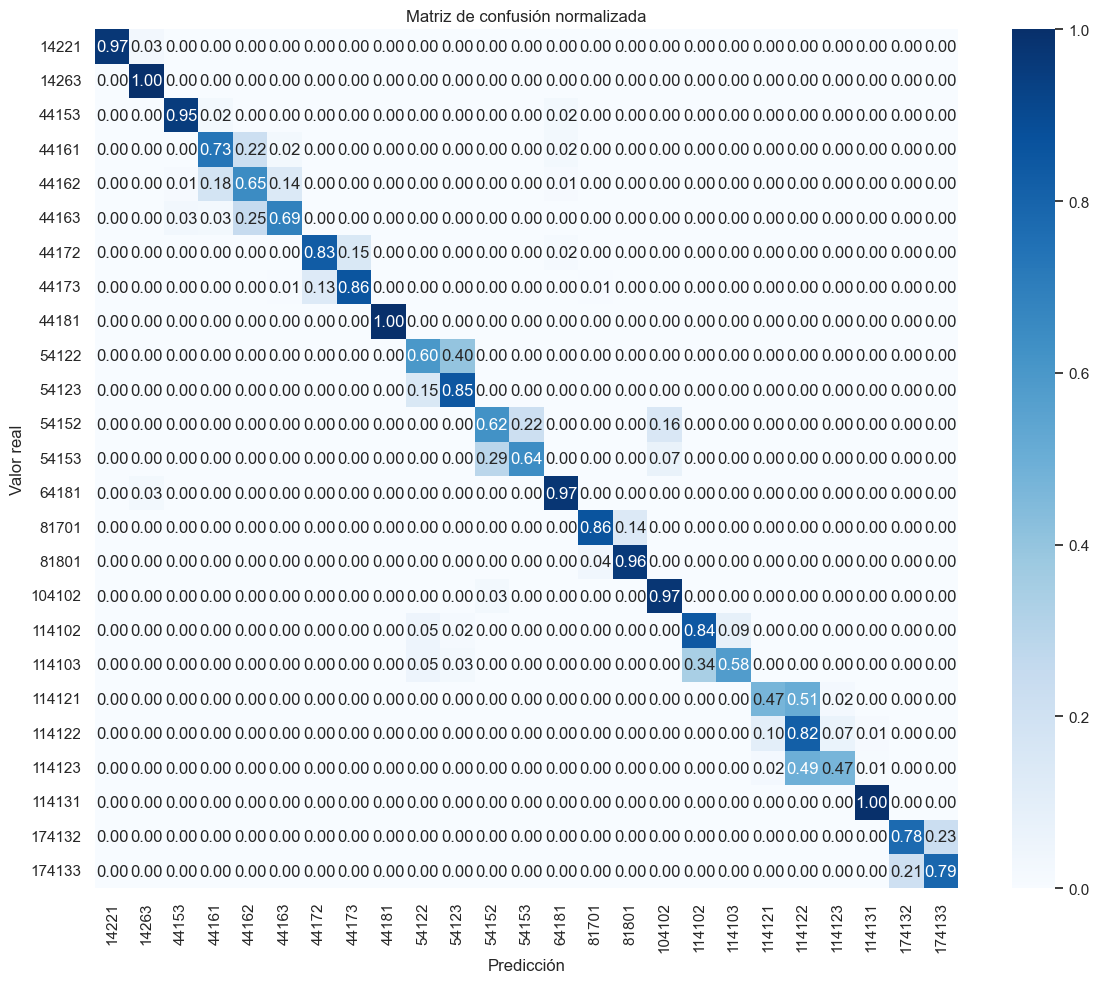

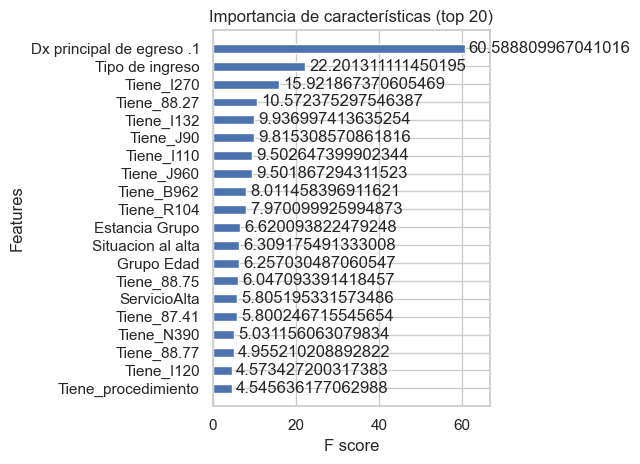

In [28]:
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Cargar datos
df = pd.read_csv('df_modelo_final.csv')

# Separar X y y
X = df.drop(columns=['GRD -Código'])
y = df['GRD -Código']

# Convertir columnas categóricas a tipo category
categorical_cols = [
    'Grupo Edad', 'Sexo', 'Tipo de ingreso', 'Cuidados intensivos',
    'Situacion al alta', 'Dx principal de egreso .1',
    'Estancia Grupo', 'UCI Grupo'
]

for col in categorical_cols:
    X[col] = X[col].astype('category')

# Codificar la variable objetivo
from sklearn.preprocessing import LabelEncoder
y_le = LabelEncoder()
y_encoded = y_le.fit_transform(y)
num_classes = len(y_le.classes_)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Optuna: función objetivo
def objective(trial):
    params = {
        'objective': 'multi:softprob',
        'num_class': num_classes,
        'eval_metric': 'mlogloss',
        'verbosity': 0,
        'tree_method': 'hist',
        'enable_categorical': True,
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 2),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 2),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }
    
    model = xgb.XGBClassifier(**params, use_label_encoder=False)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='f1_macro').mean()
    return score

# Optuna optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Entrenar modelo final
best_params = study.best_params
best_params.update({
    'objective': 'multi:softprob',
    'num_class': num_classes,
    'eval_metric': 'mlogloss',
    'tree_method': 'hist',
    'verbosity': 0,
    'enable_categorical': True,
    'use_label_encoder': False
})

model = xgb.XGBClassifier(**best_params)
model.fit(X_train, y_train)

# Evaluar
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=y_le.classes_.astype(str)))

# Matriz de confusión normalizada
cm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=y_le.classes_, yticklabels=y_le.classes_)
plt.title("Matriz de confusión normalizada")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Importancia de características
xgb.plot_importance(model, max_num_features=20, importance_type='gain', height=0.5)
plt.title("Importancia de características (top 20)")
plt.tight_layout()
plt.show()

In [29]:
# Guardar el modelo entrenado en un archivo
import os
import joblib
ruta_modelo = os.path.join("api", "prediccion_api", "prediccion_api", "modelo", "modelo_xgboost.pkl")

joblib.dump(model, ruta_modelo)

['api\\prediccion_api\\prediccion_api\\modelo\\modelo_xgboost.pkl']